In [1]:
import pandas as pd
from simulation_para import square_length, bandwidth
from _utils import plot_cdf_pdf, compare_models, compare_cdfs_ks, compare_cdfs_emd, compare_cdfs_moments, calculate_area_throughput, calculate_and_rank_percentiles, plot_sinr_heatmap, generate_colorbar_ticks, duration_benchmarking, plot_sinr_heatmaps

In [2]:
# Results location
algo_name = "SAC"
optim_name = "SGD"
results_dir = 'results'
results_folder = f'{algo_name}-{optim_name}'

## Spectral Efficiencies

In [3]:
# load data from csv files
MODEL_DELTA_SE_SEs                  = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_SEs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SE_SEs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SEv0_SEs.csv', index_col=0)
# MODEL_LOG_DELTA_SE_SEs              = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SE_SEs.csv', index_col=0)
MODEL_RELATIVE_SE_SEs               = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_SEs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SE_SEs      = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SE_SEs.csv', index_col=0)
MODEL_LOG_RELATIVE_SE_SEs           = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SE_SEs.csv', index_col=0)
MODEL_DELTA_SINR_SEs                = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SINR_SEs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SINR_SEs       = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SINR_SEs.csv', index_col=0)
# MODEL_LOG_DELTA_SINR_SEs            = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SINR_SEs.csv', index_col=0)
MODEL_RELATIVE_SINR_SEs             = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SINR_SEs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SINR_SEs    = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_RELATIVE_CLIP_SINR_SEs.csv', index_col=0)
MODEL_LOG_RELATIVE_SINR_SEs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SINR_SEs.csv', index_col=0)

MAXMIN_SEs  =  pd.read_csv(f'{results_dir}/{results_folder}/MAXMIN_SEs.csv', index_col=0)
MAXPROD_SEs = pd.read_csv(f'{results_dir}/{results_folder}/MAXPROD_SEs.csv', index_col=0)
SUMRATE_SEs = pd.read_csv(f'{results_dir}/{results_folder}/SUMRATE_SEs.csv', index_col=0)

In [4]:
SE_DATA_R_SE = {
    'MODEL_DELTA_SE_SEs':               {'label': 'DRL [DELTA SE]',             'data': MODEL_DELTA_SE_SEs,                 'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SE_SEs':      {'label': 'DRL [EXP DELTA SE]',         'data': MODEL_EXP_DELTA_CLIP_SE_SEs,        'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    # 'MODEL_LOG_DELTA_SE_SEs':           {'label': 'DRL [LOG DELTA SE]',         'data': MODEL_LOG_DELTA_SE_SEs,             'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SE_SEs':            {'label': 'DRL [RELATIVE SE]',          'data': MODEL_RELATIVE_SE_SEs,              'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SE_SEs':   {'label': 'DRL [EXP RELATIVE SE]',      'data': MODEL_EXP_RELATIVE_CLIP_SE_SEs,     'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SE_SEs':        {'label': 'DRL [LOG RELATIVE SE]',      'data': MODEL_LOG_RELATIVE_SE_SEs,          'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_SEs':                       {'label': 'MAX-MIN',                    'data': MAXMIN_SEs,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_SEs':                      {'label': 'MAX-PROD',                   'data': MAXPROD_SEs,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_SEs':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_SEs,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

SE_DATA_R_SINR = {
    'MODEL_DELTA_SINR_SEs':             {'label': 'DRL [DELTA SINR]',           'data': MODEL_DELTA_SINR_SEs,               'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SINR_SEs':    {'label': 'DRL [EXP DELTA SINR]',       'data': MODEL_EXP_DELTA_CLIP_SINR_SEs,      'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    # 'MODEL_LOG_DELTA_SINR_SEs':         {'label': 'DRL [LOG DELTA SINR]',       'data': MODEL_LOG_DELTA_SINR_SEs,           'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SINR_SEs':          {'label': 'DRL [RELATIVE SINR]',        'data': MODEL_RELATIVE_SINR_SEs,            'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SINR_SEs': {'label': 'DRL [EXP RELATIVE SINR]',    'data': MODEL_EXP_RELATIVE_CLIP_SINR_SEs,   'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SINR_SEs':      {'label': 'DRL [LOG RELATIVE SINR]',    'data': MODEL_LOG_RELATIVE_SINR_SEs,        'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_SEs':                       {'label': 'MAX-MIN',                    'data': MAXMIN_SEs,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_SEs':                      {'label': 'MAX-PROD',                   'data': MAXPROD_SEs,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_SEs':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_SEs,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

### Spectral Efficiencies

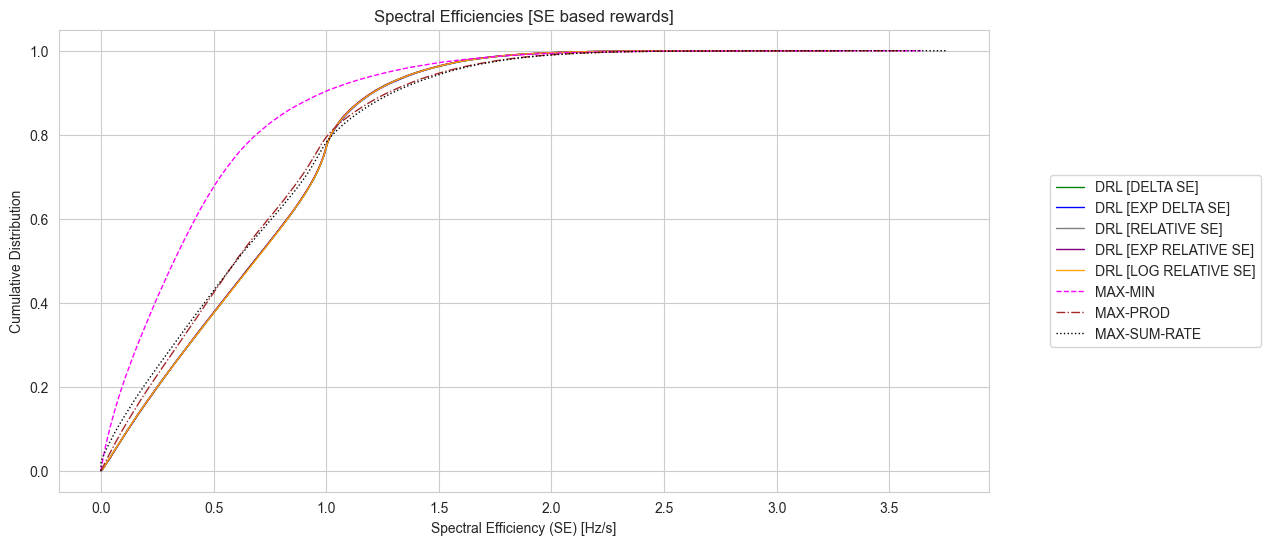

In [5]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation=None, cumulative=True)

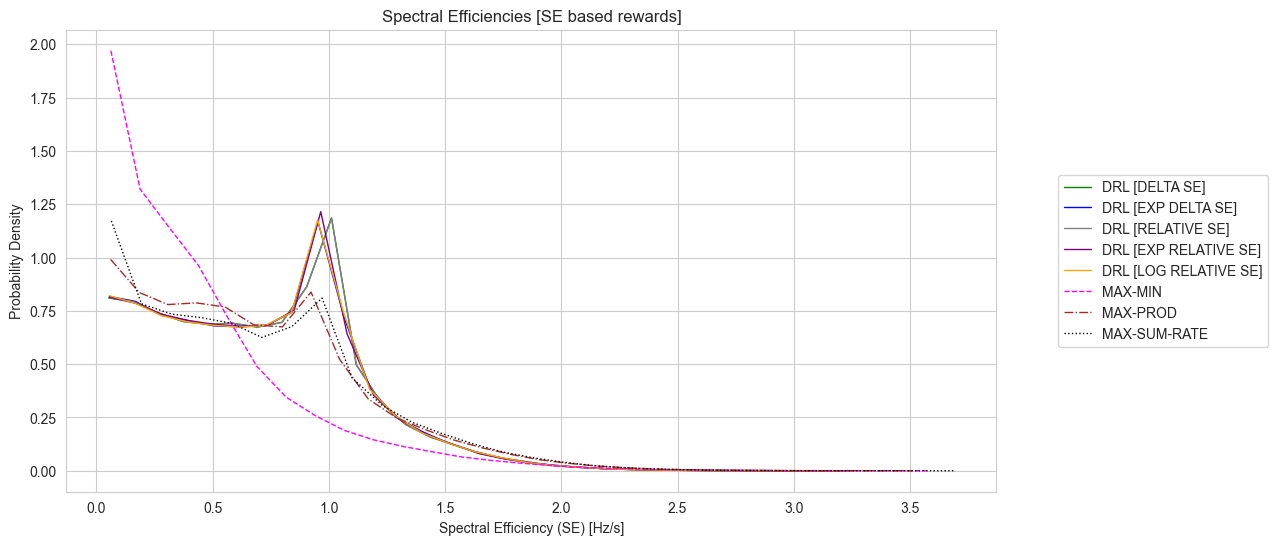

In [6]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation=None, cumulative=False)

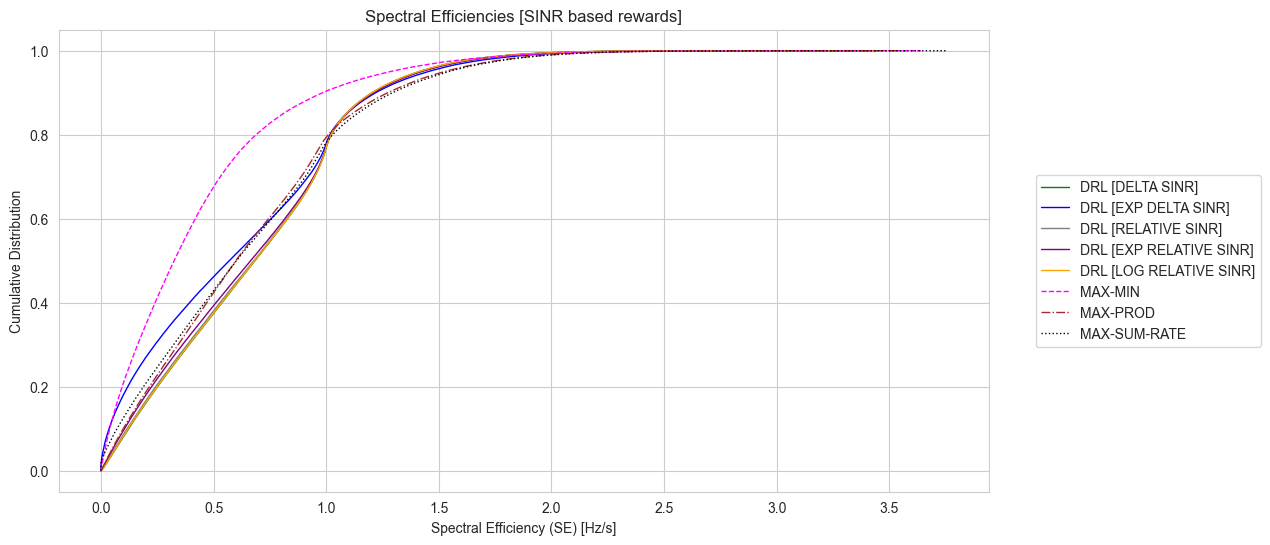

In [7]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation=None, cumulative=True)

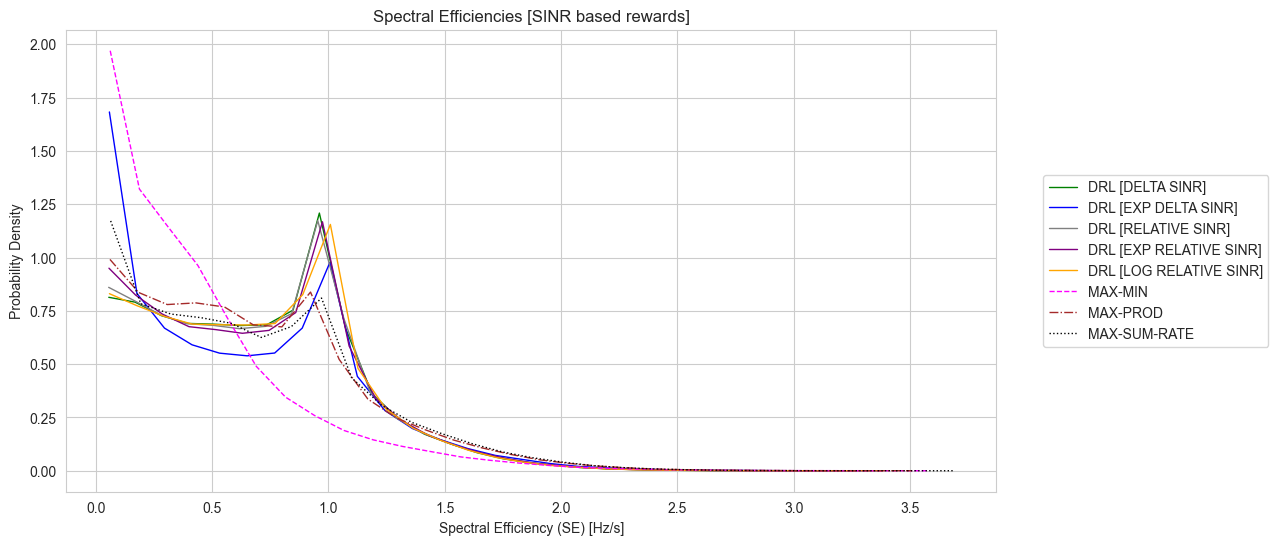

In [8]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation=None, cumulative=False)

### Mean Spectral Efficiencies

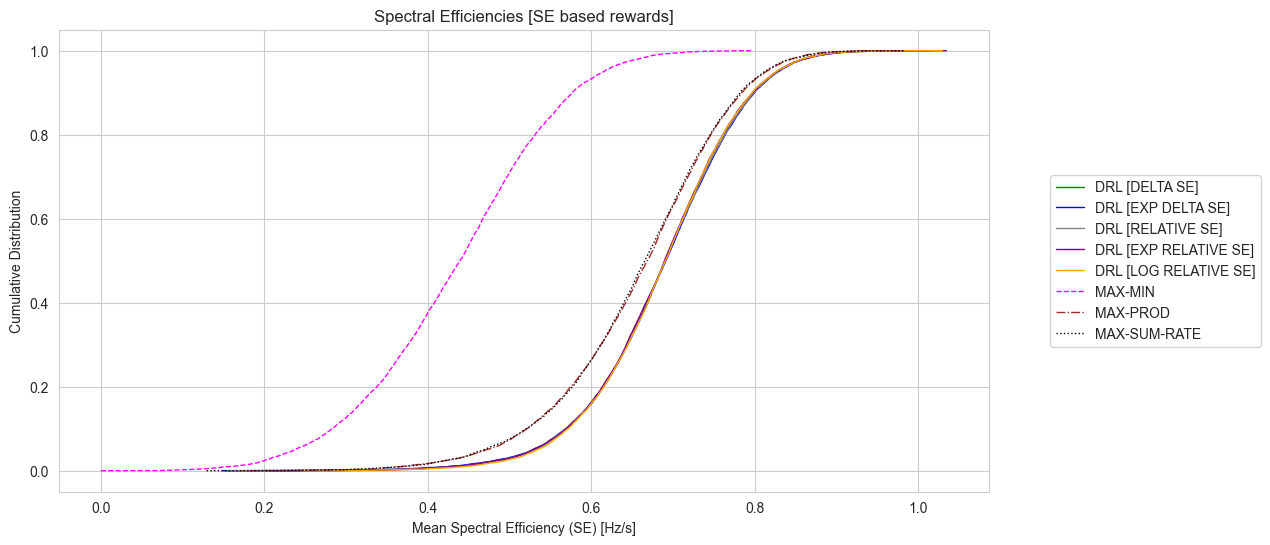

In [9]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Mean Spectral Efficiency (SE) [Hz/s]', operation='mean', cumulative=True)

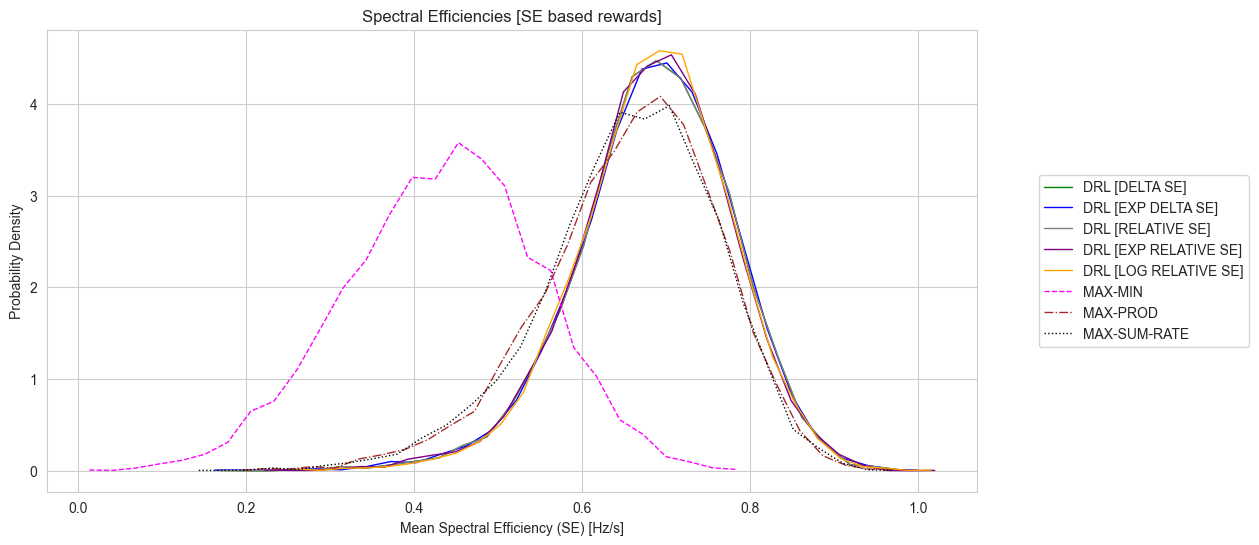

In [10]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Mean Spectral Efficiency (SE) [Hz/s]', operation='mean', cumulative=False)

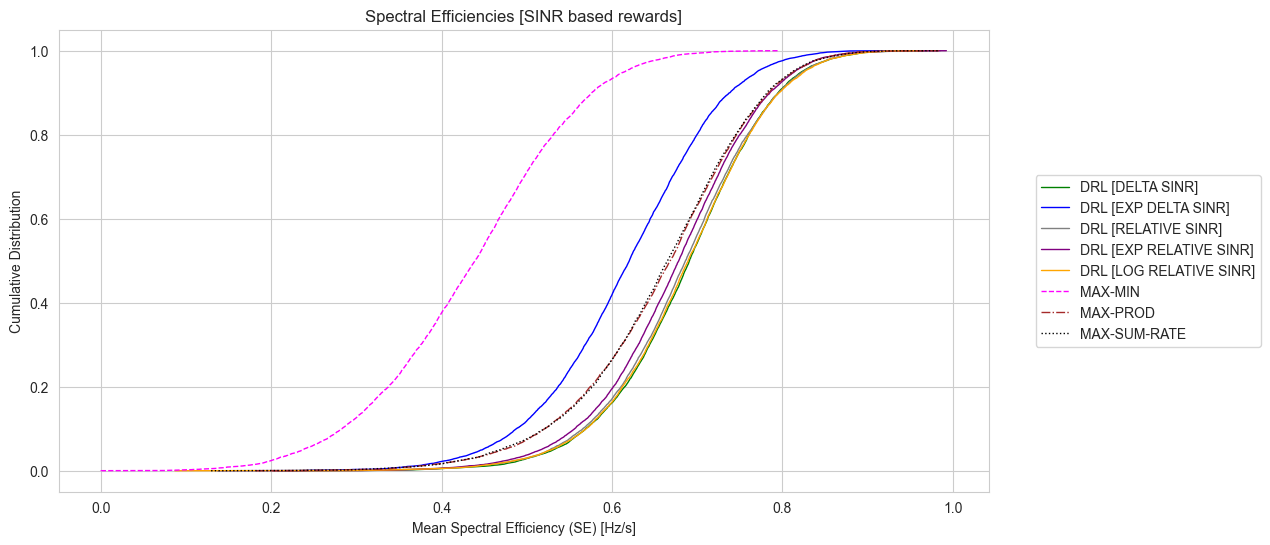

In [11]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Mean Spectral Efficiency (SE) [Hz/s]', operation='mean', cumulative=True)

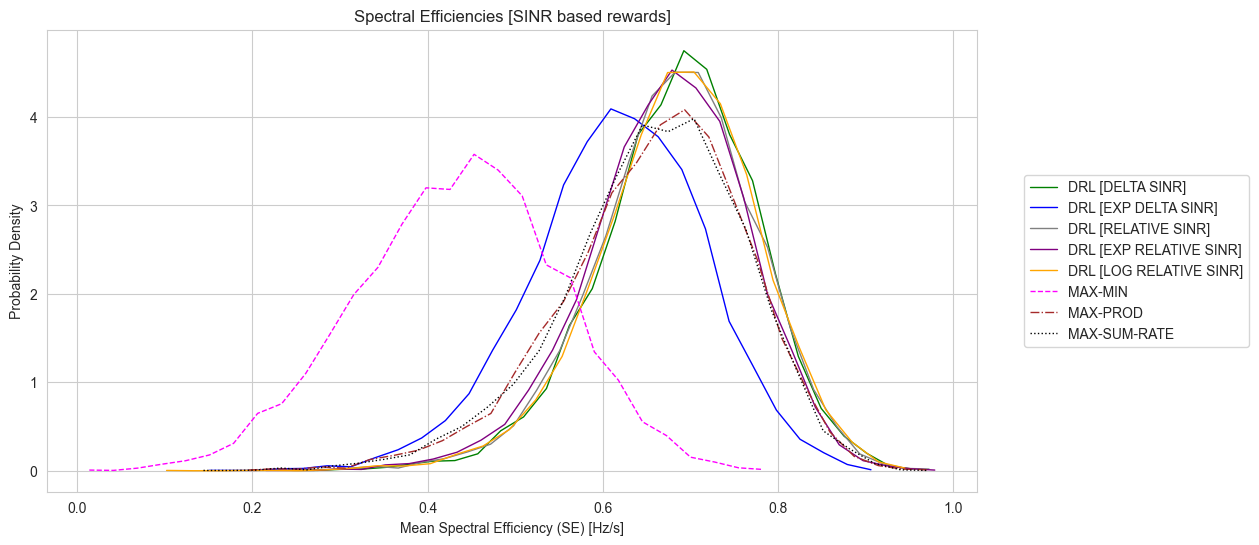

In [12]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Mean Spectral Efficiency (SE) [Hz/s]', operation='mean', cumulative=False)

### Min Spectral Efficiencies

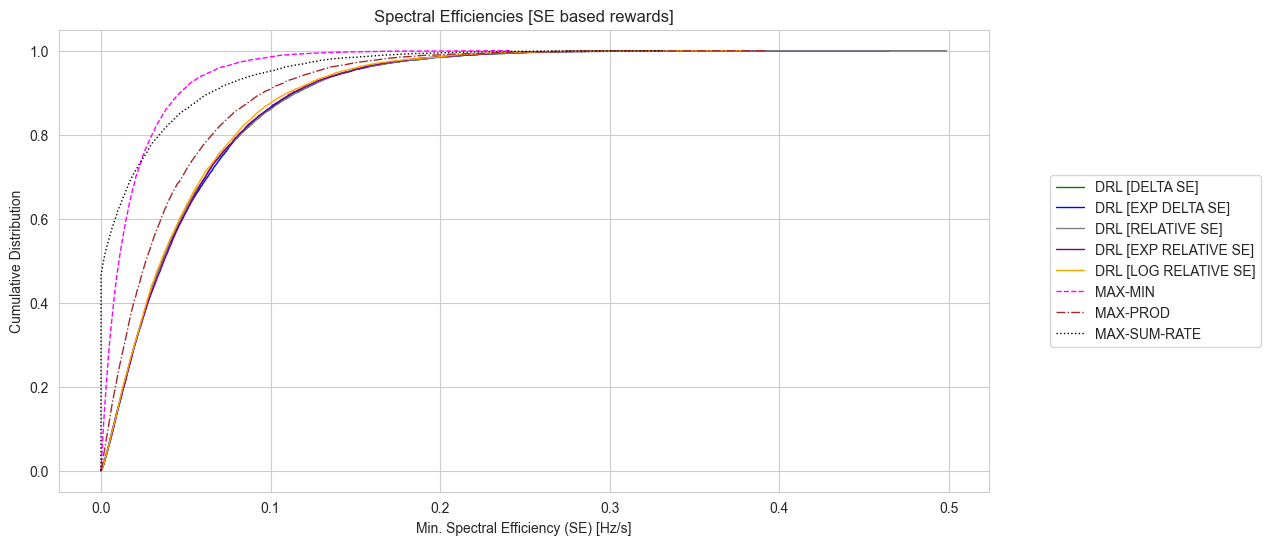

In [13]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Min. Spectral Efficiency (SE) [Hz/s]', operation='min', cumulative=True)

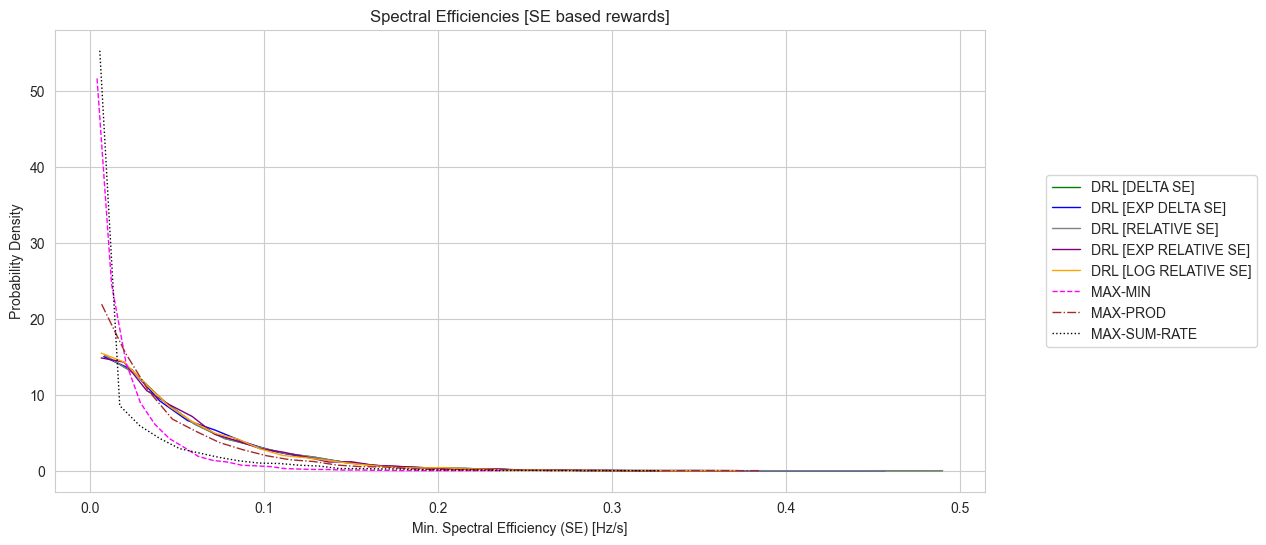

In [14]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Min. Spectral Efficiency (SE) [Hz/s]', operation='min', cumulative=False)

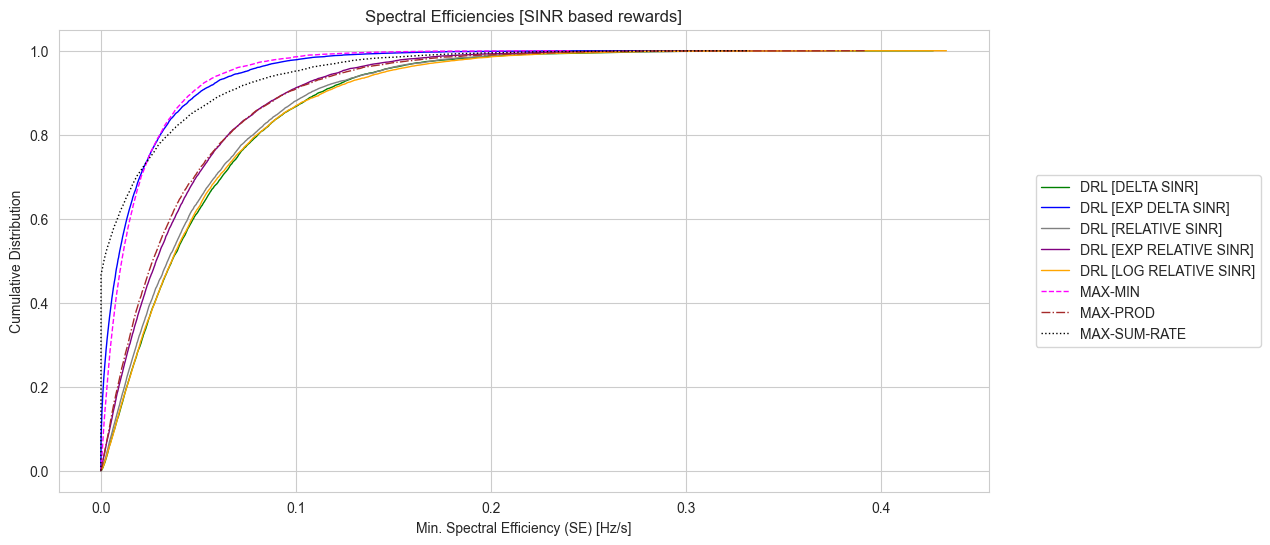

In [15]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Min. Spectral Efficiency (SE) [Hz/s]', operation='min', cumulative=True)

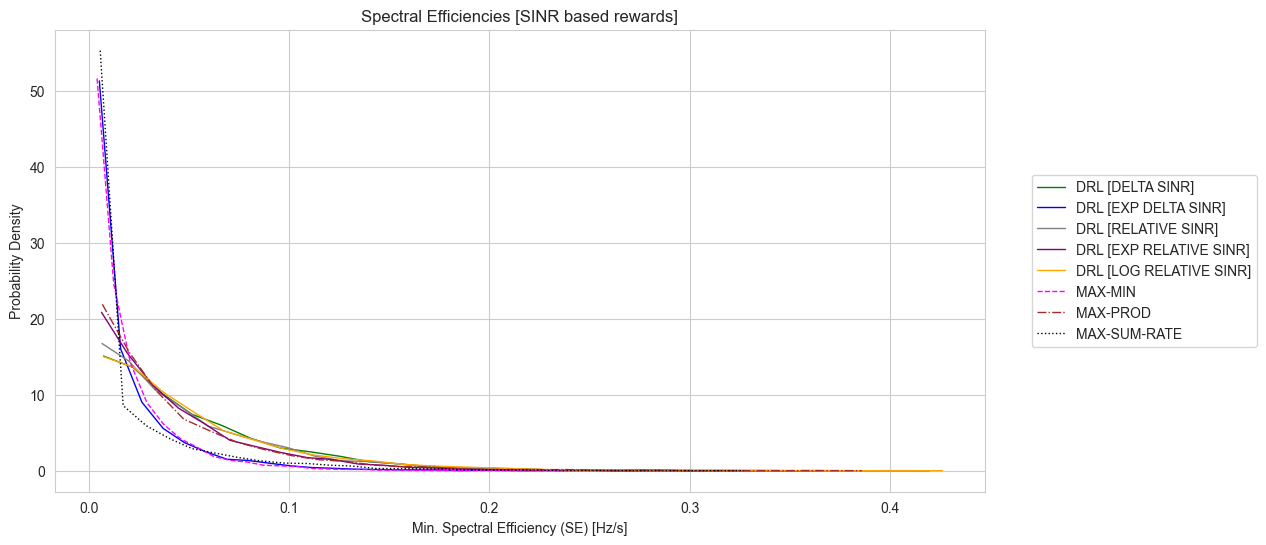

In [16]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Min. Spectral Efficiency (SE) [Hz/s]', operation='min', cumulative=False)

### Max Spectral Efficiencies

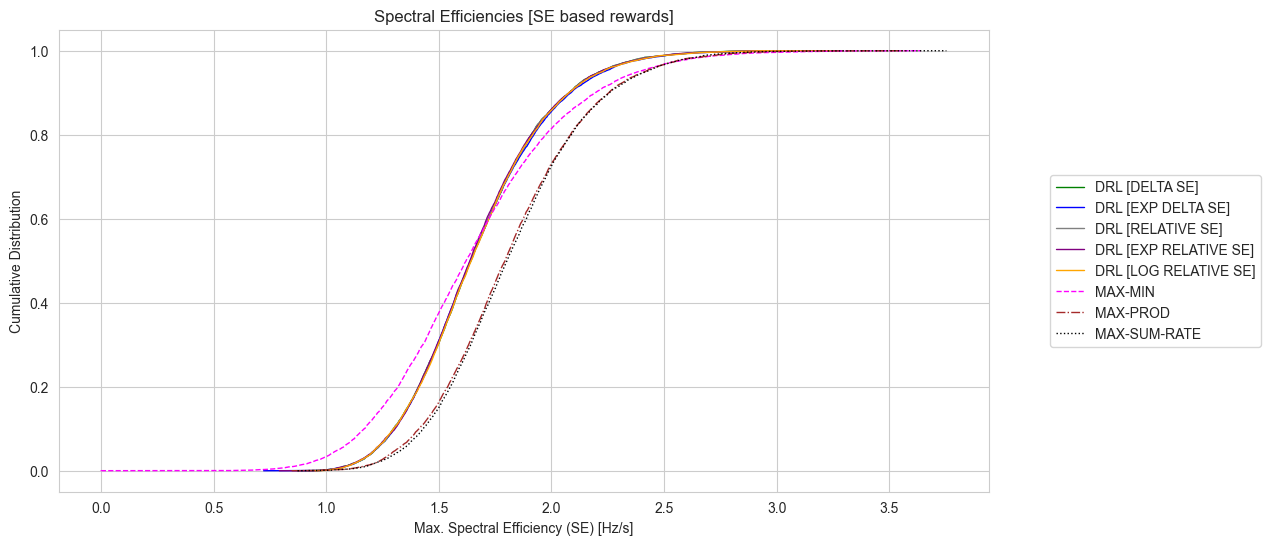

In [17]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Max. Spectral Efficiency (SE) [Hz/s]', operation='max', cumulative=True)

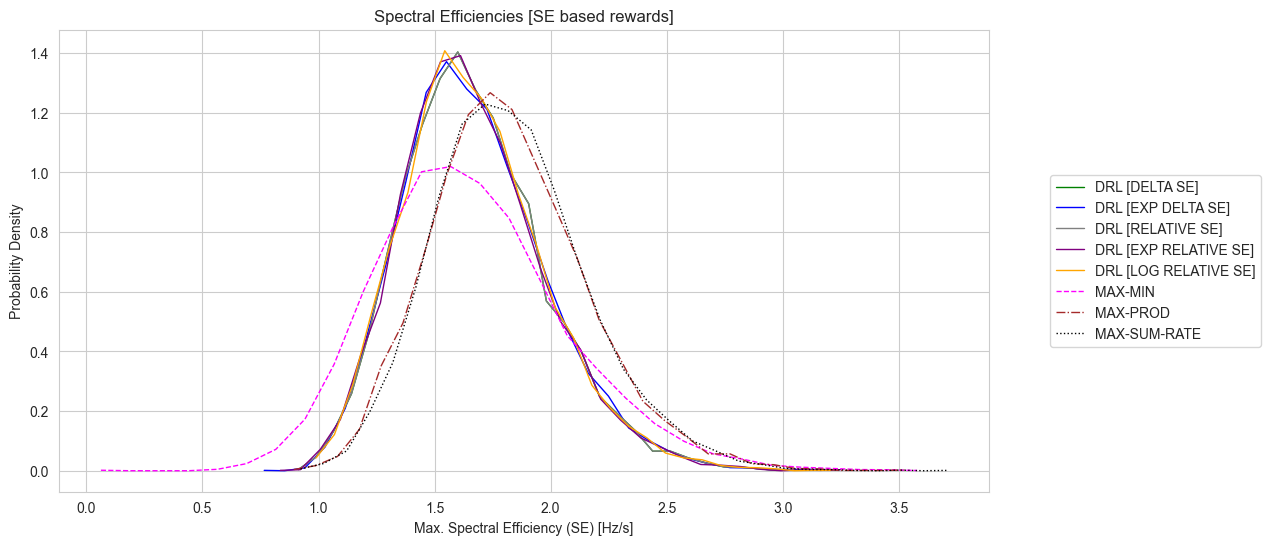

In [18]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Max. Spectral Efficiency (SE) [Hz/s]', operation='max', cumulative=False)

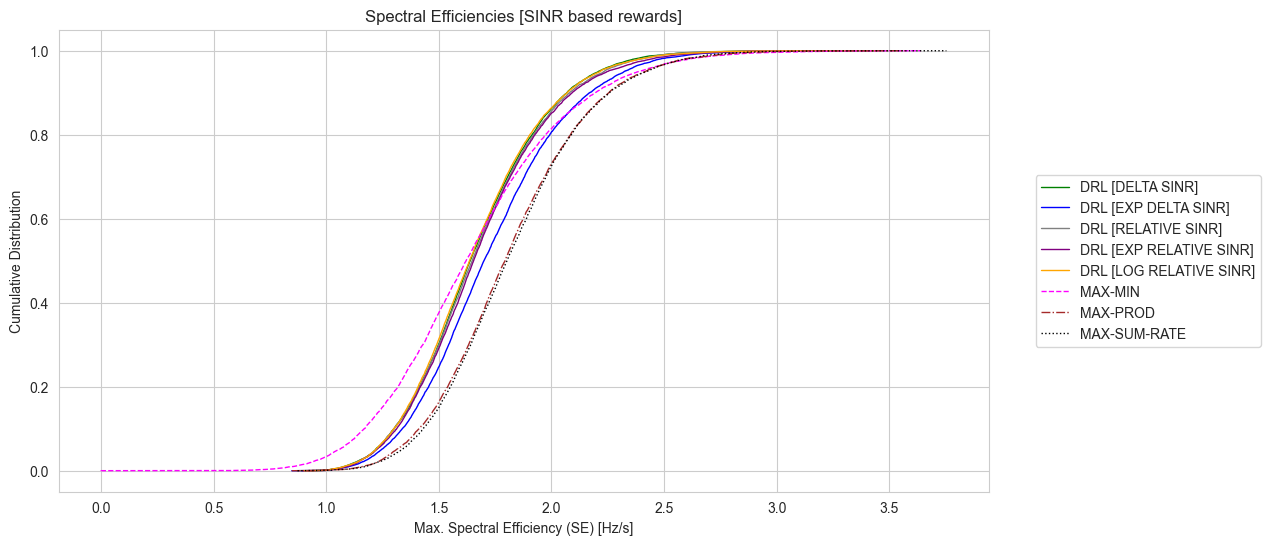

In [19]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Max. Spectral Efficiency (SE) [Hz/s]', operation='max', cumulative=True)

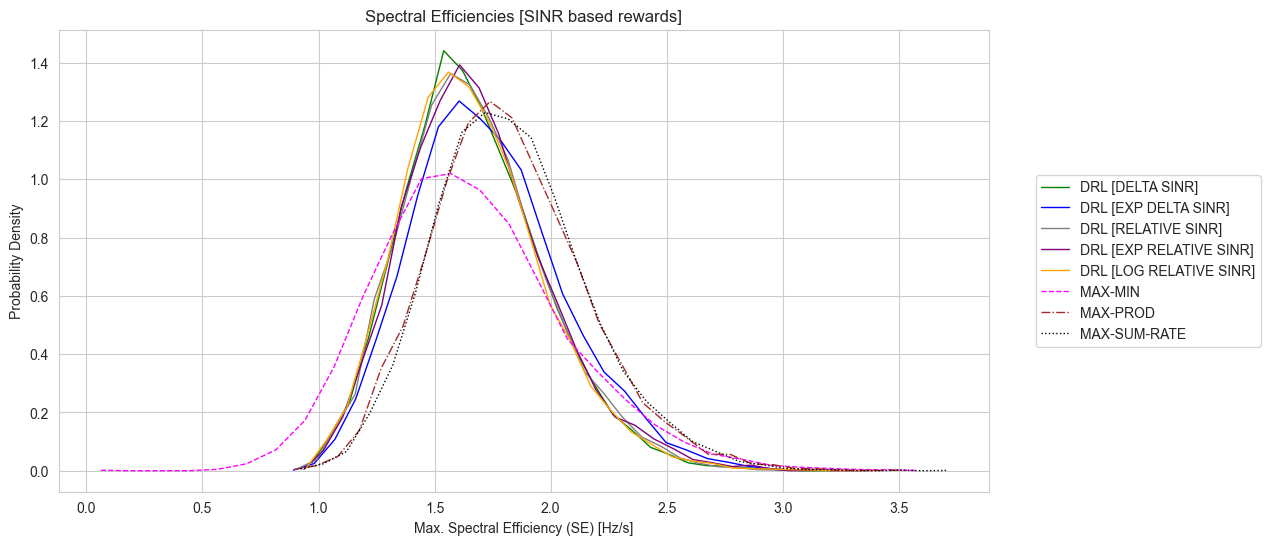

In [20]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Max. Spectral Efficiency (SE) [Hz/s]', operation='max', cumulative=False)

## Sum Spectral Efficiencies

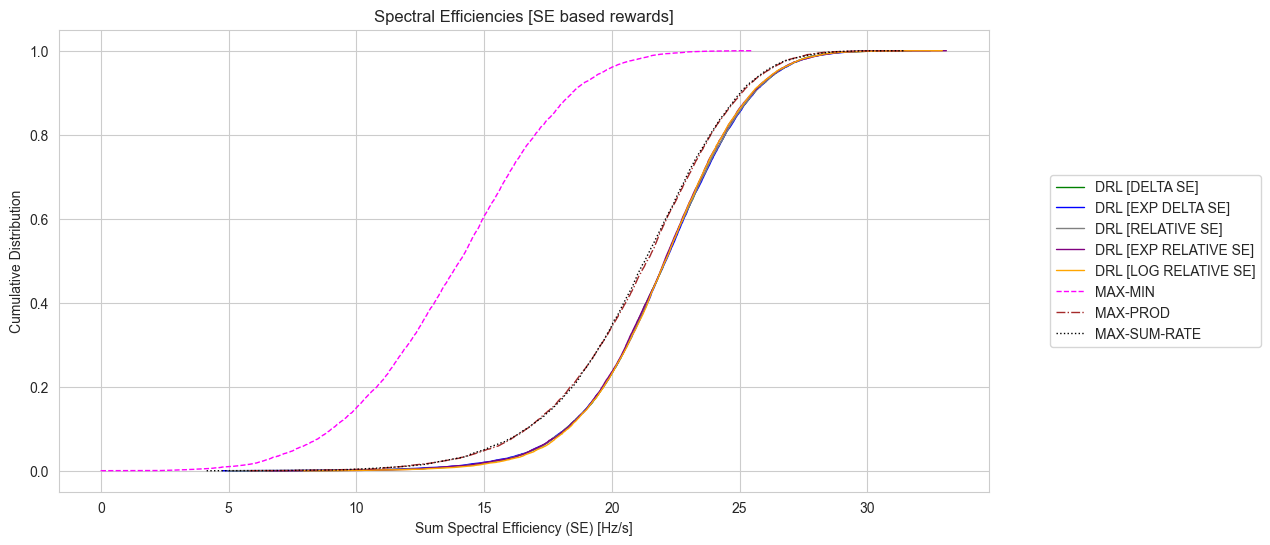

In [21]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Sum Spectral Efficiency (SE) [Hz/s]', operation='sum', cumulative=True)

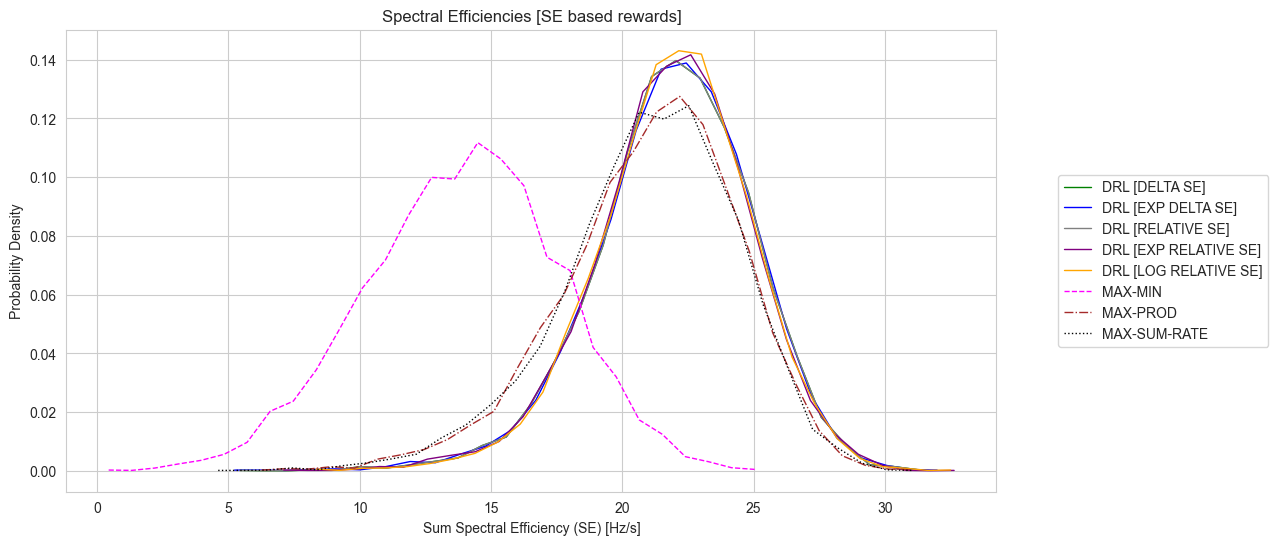

In [22]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Sum Spectral Efficiency (SE) [Hz/s]', operation='sum', cumulative=False)

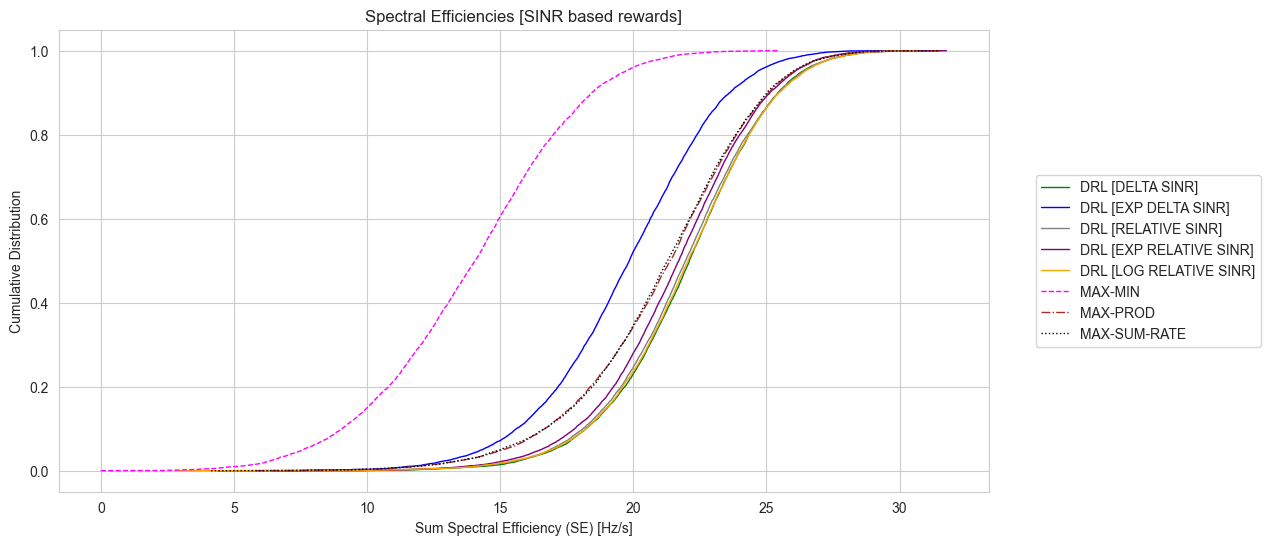

In [23]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Sum Spectral Efficiency (SE) [Hz/s]', operation='sum', cumulative=True)

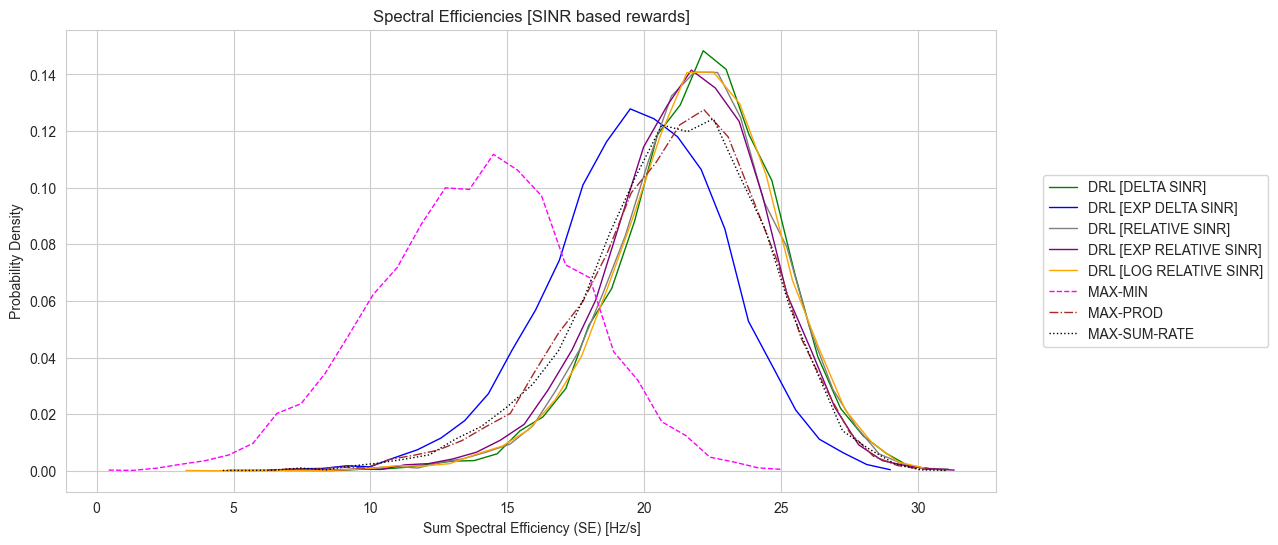

In [24]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Sum Spectral Efficiency (SE) [Hz/s]', operation='sum', cumulative=False)

### CDF Comparison

#### SE based reward

In [25]:
compare_models(SE_DATA_R_SE, operation=None, data_label='SE')

Label Average SE    Max SE  \
MODEL_DELTA_SE_SEs                     DRL [DELTA SE]   0.685972  3.087872   
MODEL_EXP_DELTA_CLIP_SE_SEs        DRL [EXP DELTA SE]   0.686155   3.25177   
MODEL_RELATIVE_SE_SEs               DRL [RELATIVE SE]   0.685972  3.087872   
MODEL_EXP_RELATIVE_CLIP_SE_SEs  DRL [EXP RELATIVE SE]    0.68482  3.293269   
MODEL_LOG_RELATIVE_SE_SEs       DRL [LOG RELATIVE SE]   0.686156  3.246499   
MAXMIN_SEs                                    MAX-MIN   0.433573  3.640987   
MAXPROD_SEs                                  MAX-PROD   0.658278  3.570834   
SUMRATE_SEs                              MAX-SUM-RATE   0.657153  3.753867   

                               Standard Deviation 25th Percentile  \
MODEL_DELTA_SE_SEs                       0.429664        0.320075   
MODEL_EXP_DELTA_CLIP_SE_SEs              0.431118        0.319422   
MODEL_RELATIVE_SE_SEs                    0.429664        0.320075   
MODEL_EXP_RELATIVE_CLIP_SE_SEs           0.428986         0.31976   
MODEL_LOG_RELATIVE_SE_SEs                0.430156        0.320359   
MAXMIN_SEs                               0.410045        0.127517   
MAXPROD_SEs                              0.464147        0.278405   
SUMRATE_SEs                              0.479985        0.255046   

                               50th Percentile 75th Percentile  
MODEL_DELTA_SE_SEs                    0.681944        0.989463  
MODEL_EXP_DELTA_CLIP_SE_SEs            0.68269        0.989571  
MODEL_RELATIVE_SE_SEs                 0.681944        0.989463  
MODEL_EXP_RELATIVE_CLIP_SE_SEs        0.681802        0.988483  
MODEL_LOG_RELATIVE_SE_SEs             0.684729        0.989437  
MAXMIN_SEs                            0.325092        0.600203  
MAXPROD_SEs                           0.598934        0.948577  
SUMRATE_SEs                           0.601243        0.965235

In [26]:
ks_results_r_se = compare_cdfs_ks(SE_DATA_R_SE, operation=None)

In [27]:
ks_results_r_se['Best Model']

Criteria          Best Model
0       KS Statistic      DRL [DELTA SE]
1            P-Value      DRL [DELTA SE]
2  Area Between CDFs  DRL [EXP DELTA SE]

In [28]:
ks_results_r_se['Details']

Model1                 Model2  KS Statistic        P-Value  \
0          DRL [DELTA SE]     DRL [EXP DELTA SE]      0.002516   2.629219e-01   
1          DRL [DELTA SE]      DRL [RELATIVE SE]      0.000000   1.000000e+00   
2          DRL [DELTA SE]  DRL [EXP RELATIVE SE]      0.002222   4.078614e-01   
3          DRL [DELTA SE]  DRL [LOG RELATIVE SE]      0.002247   3.938827e-01   
4          DRL [DELTA SE]                MAX-MIN      0.306444   0.000000e+00   
5          DRL [DELTA SE]               MAX-PROD      0.059063   0.000000e+00   
6          DRL [DELTA SE]           MAX-SUM-RATE      0.055378   0.000000e+00   
7      DRL [EXP DELTA SE]      DRL [RELATIVE SE]      0.002516   2.629219e-01   
8      DRL [EXP DELTA SE]  DRL [EXP RELATIVE SE]      0.003509   3.876517e-02   
9      DRL [EXP DELTA SE]  DRL [LOG RELATIVE SE]      0.001897   6.117591e-01   
10     DRL [EXP DELTA SE]                MAX-MIN      0.305981   0.000000e+00   
11     DRL [EXP DELTA SE]               MAX-PROD      0.059466   0.000000e+00   
12     DRL [EXP DELTA SE]           MAX-SUM-RATE      0.055341   0.000000e+00   
13      DRL [RELATIVE SE]  DRL [EXP RELATIVE SE]      0.002222   4.078614e-01   
14      DRL [RELATIVE SE]  DRL [LOG RELATIVE SE]      0.002247   3.938827e-01   
15      DRL [RELATIVE SE]                MAX-MIN      0.306444   0.000000e+00   
16      DRL [RELATIVE SE]               MAX-PROD      0.059063   0.000000e+00   
17      DRL [RELATIVE SE]           MAX-SUM-RATE      0.055378   0.000000e+00   
18  DRL [EXP RELATIVE SE]  DRL [LOG RELATIVE SE]      0.002322   3.537391e-01   
19  DRL [EXP RELATIVE SE]                MAX-MIN      0.305947   0.000000e+00   
20  DRL [EXP RELATIVE SE]               MAX-PROD      0.058700   0.000000e+00   
21  DRL [EXP RELATIVE SE]           MAX-SUM-RATE      0.055212   0.000000e+00   
22  DRL [LOG RELATIVE SE]                MAX-MIN      0.307247   0.000000e+00   
23  DRL [LOG RELATIVE SE]               MAX-PROD      0.060750   0.000000e+00   
24  DRL [LOG RELATIVE SE]           MAX-SUM-RATE      0.056584   0.000000e+00   
25                MAX-MIN               MAX-PROD      0.253319   0.000000e+00   
26                MAX-MIN           MAX-SUM-RATE      0.251509   0.000000e+00   
27               MAX-PROD           MAX-SUM-RATE      0.027125  1.057127e-102   

    Area Between CDFs  
0            0.001386  
1            0.000000  
2            0.001233  
3            0.000954  
4            0.254510  
5            0.056365  
6            0.064953  
7            0.001385  
8            0.001781  
9            0.001364  
10           0.254473  
11           0.055225  
12           0.063746  
13           0.001233  
14           0.000954  
15           0.254510  
16           0.056365  
17           0.064953  
18           0.001667  
19           0.253428  
20           0.056023  
21           0.064683  
22           0.254668  
23           0.056268  
24           0.064892  
25           0.224777  
26           0.223945  
27           0.017390

In [29]:
emd_results_r_se = compare_cdfs_emd(SE_DATA_R_SE, operation=None)

In [30]:
emd_results_r_se['Ranked Models']

Model  Average EMD
0     DRL [EXP DELTA SE]     0.054195
1         DRL [DELTA SE]     0.054201
2      DRL [RELATIVE SE]     0.054201
3  DRL [EXP RELATIVE SE]     0.054293
4  DRL [LOG RELATIVE SE]     0.054396
5               MAX-PROD     0.074631
6           MAX-SUM-RATE     0.080652
7                MAX-MIN     0.245759

In [31]:
emd_results_r_se['Details']

Model1                 Model2  EMD Value
0          DRL [DELTA SE]     DRL [EXP DELTA SE]   0.001386
1          DRL [DELTA SE]      DRL [RELATIVE SE]   0.000000
2          DRL [DELTA SE]  DRL [EXP RELATIVE SE]   0.001234
3          DRL [DELTA SE]  DRL [LOG RELATIVE SE]   0.000954
4          DRL [DELTA SE]                MAX-MIN   0.254511
5          DRL [DELTA SE]               MAX-PROD   0.056366
6          DRL [DELTA SE]           MAX-SUM-RATE   0.064954
7      DRL [EXP DELTA SE]      DRL [RELATIVE SE]   0.001386
8      DRL [EXP DELTA SE]  DRL [EXP RELATIVE SE]   0.001781
9      DRL [EXP DELTA SE]  DRL [LOG RELATIVE SE]   0.001364
10     DRL [EXP DELTA SE]                MAX-MIN   0.254473
11     DRL [EXP DELTA SE]               MAX-PROD   0.055226
12     DRL [EXP DELTA SE]           MAX-SUM-RATE   0.063747
13      DRL [RELATIVE SE]  DRL [EXP RELATIVE SE]   0.001234
14      DRL [RELATIVE SE]  DRL [LOG RELATIVE SE]   0.000954
15      DRL [RELATIVE SE]                MAX-MIN   0.254511
16      DRL [RELATIVE SE]               MAX-PROD   0.056366
17      DRL [RELATIVE SE]           MAX-SUM-RATE   0.064954
18  DRL [EXP RELATIVE SE]  DRL [LOG RELATIVE SE]   0.001668
19  DRL [EXP RELATIVE SE]                MAX-MIN   0.253429
20  DRL [EXP RELATIVE SE]               MAX-PROD   0.056024
21  DRL [EXP RELATIVE SE]           MAX-SUM-RATE   0.064684
22  DRL [LOG RELATIVE SE]                MAX-MIN   0.254669
23  DRL [LOG RELATIVE SE]               MAX-PROD   0.056268
24  DRL [LOG RELATIVE SE]           MAX-SUM-RATE   0.064892
25                MAX-MIN               MAX-PROD   0.224777
26                MAX-MIN           MAX-SUM-RATE   0.223944
27               MAX-PROD           MAX-SUM-RATE   0.017391

In [32]:
moments_r_se = compare_cdfs_moments(SE_DATA_R_SE, operation=None, criteria='kurtosis')

In [33]:
moments_r_se['Ranked Models']

Model  Rank
0              MODEL_DELTA_SE_SEs     1
2           MODEL_RELATIVE_SE_SEs     2
4       MODEL_LOG_RELATIVE_SE_SEs     3
3  MODEL_EXP_RELATIVE_CLIP_SE_SEs     4
1     MODEL_EXP_DELTA_CLIP_SE_SEs     5
7                     SUMRATE_SEs     6
6                     MAXPROD_SEs     7
5                      MAXMIN_SEs     8

In [34]:
moments_r_se['Details']

Model      Mean  Variance  Skewness  Kurtosis
0              MODEL_DELTA_SE_SEs  0.685972  0.184611  0.448013 -0.017003
1     MODEL_EXP_DELTA_CLIP_SE_SEs  0.686155  0.185863  0.455325  0.003302
2           MODEL_RELATIVE_SE_SEs  0.685972  0.184611  0.448013 -0.017003
3  MODEL_EXP_RELATIVE_CLIP_SE_SEs  0.684820  0.184029  0.448260 -0.007724
4       MODEL_LOG_RELATIVE_SE_SEs  0.686156  0.185035  0.445981 -0.010502
5                      MAXMIN_SEs  0.433573  0.168137  1.647579  3.397338
6                     MAXPROD_SEs  0.658278  0.215432  0.792793  0.545877
7                     SUMRATE_SEs  0.657153  0.230386  0.722258  0.301901

In [35]:
calculate_and_rank_percentiles(SE_DATA_R_SE, [50, 75])

Model  50th Percentile  75th Percentile  Rank
1     DRL [EXP DELTA SE]         0.682690         0.989571     1
0         DRL [DELTA SE]         0.681944         0.989463     2
2      DRL [RELATIVE SE]         0.681944         0.989463     2
4  DRL [LOG RELATIVE SE]         0.684729         0.989437     4
3  DRL [EXP RELATIVE SE]         0.681802         0.988483     5
7           MAX-SUM-RATE         0.601243         0.965235     6
6               MAX-PROD         0.598934         0.948577     7
5                MAX-MIN         0.325092         0.600203     8

#### SINR based reward

In [36]:
compare_models(SE_DATA_R_SINR, operation=None, data_label='SE')

Label Average SE  \
MODEL_DELTA_SINR_SEs                     DRL [DELTA SINR]   0.685622   
MODEL_EXP_DELTA_CLIP_SINR_SEs        DRL [EXP DELTA SINR]   0.616127   
MODEL_RELATIVE_SINR_SEs               DRL [RELATIVE SINR]   0.682317   
MODEL_EXP_RELATIVE_CLIP_SINR_SEs  DRL [EXP RELATIVE SINR]   0.673338   
MODEL_LOG_RELATIVE_SINR_SEs       DRL [LOG RELATIVE SINR]   0.684811   
MAXMIN_SEs                                        MAX-MIN   0.433573   
MAXPROD_SEs                                      MAX-PROD   0.658278   
SUMRATE_SEs                                  MAX-SUM-RATE   0.657153   

                                    Max SE Standard Deviation 25th Percentile  \
MODEL_DELTA_SINR_SEs              3.280468           0.428925        0.320245   
MODEL_EXP_DELTA_CLIP_SINR_SEs     3.433391           0.478868        0.174524   
MODEL_RELATIVE_SINR_SEs           3.257248           0.433024        0.311733   
MODEL_EXP_RELATIVE_CLIP_SINR_SEs  3.325569           0.439792        0.291812   
MODEL_LOG_RELATIVE_SINR_SEs         3.4418           0.429195        0.318726   
MAXMIN_SEs                        3.640987           0.410045        0.127517   
MAXPROD_SEs                       3.570834           0.464147        0.278405   
SUMRATE_SEs                       3.753867           0.479985        0.255046   

                                 50th Percentile 75th Percentile  
MODEL_DELTA_SINR_SEs                    0.683625          0.9888  
MODEL_EXP_DELTA_CLIP_SINR_SEs           0.569683        0.978567  
MODEL_RELATIVE_SINR_SEs                 0.678889        0.988464  
MODEL_EXP_RELATIVE_CLIP_SINR_SEs        0.664442        0.987595  
MODEL_LOG_RELATIVE_SINR_SEs             0.682294        0.989265  
MAXMIN_SEs                              0.325092        0.600203  
MAXPROD_SEs                             0.598934        0.948577  
SUMRATE_SEs                             0.601243        0.965235

In [37]:
# Kolmogorov-Smirnov Test
ks_results_r_sinr = compare_cdfs_ks(SE_DATA_R_SINR, operation=None)

In [38]:
ks_results_r_sinr['Details']

Model1                   Model2  KS Statistic  \
0          DRL [DELTA SINR]     DRL [EXP DELTA SINR]      0.109234   
1          DRL [DELTA SINR]      DRL [RELATIVE SINR]      0.006300   
2          DRL [DELTA SINR]  DRL [EXP RELATIVE SINR]      0.020884   
3          DRL [DELTA SINR]  DRL [LOG RELATIVE SINR]      0.002225   
4          DRL [DELTA SINR]                  MAX-MIN      0.307297   
5          DRL [DELTA SINR]                 MAX-PROD      0.060044   
6          DRL [DELTA SINR]             MAX-SUM-RATE      0.056163   
7      DRL [EXP DELTA SINR]      DRL [RELATIVE SINR]      0.103797   
8      DRL [EXP DELTA SINR]  DRL [EXP RELATIVE SINR]      0.090222   
9      DRL [EXP DELTA SINR]  DRL [LOG RELATIVE SINR]      0.107897   
10     DRL [EXP DELTA SINR]                  MAX-MIN      0.236941   
11     DRL [EXP DELTA SINR]                 MAX-PROD      0.083716   
12     DRL [EXP DELTA SINR]             MAX-SUM-RATE      0.062153   
13      DRL [RELATIVE SINR]  DRL [EXP RELATIVE SINR]      0.015153   
14      DRL [RELATIVE SINR]  DRL [LOG RELATIVE SINR]      0.005550   
15      DRL [RELATIVE SINR]                  MAX-MIN      0.302406   
16      DRL [RELATIVE SINR]                 MAX-PROD      0.057216   
17      DRL [RELATIVE SINR]             MAX-SUM-RATE      0.052025   
18  DRL [EXP RELATIVE SINR]  DRL [LOG RELATIVE SINR]      0.020084   
19  DRL [EXP RELATIVE SINR]                  MAX-MIN      0.291931   
20  DRL [EXP RELATIVE SINR]                 MAX-PROD      0.049047   
21  DRL [EXP RELATIVE SINR]             MAX-SUM-RATE      0.041984   
22  DRL [LOG RELATIVE SINR]                  MAX-MIN      0.306809   
23  DRL [LOG RELATIVE SINR]                 MAX-PROD      0.059225   
24  DRL [LOG RELATIVE SINR]             MAX-SUM-RATE      0.055697   
25                  MAX-MIN                 MAX-PROD      0.253319   
26                  MAX-MIN             MAX-SUM-RATE      0.251509   
27                 MAX-PROD             MAX-SUM-RATE      0.027125   

          P-Value  Area Between CDFs  
0    0.000000e+00           0.079395  
1    6.071243e-06           0.004959  
2    4.727034e-61           0.015303  
3    4.060981e-01           0.001049  
4    0.000000e+00           0.254337  
5    0.000000e+00           0.056637  
6    0.000000e+00           0.065263  
7    0.000000e+00           0.074495  
8    0.000000e+00           0.064212  
9    0.000000e+00           0.078967  
10   0.000000e+00           0.184199  
11   0.000000e+00           0.052416  
12   0.000000e+00           0.044339  
13   2.422055e-32           0.010355  
14   1.043869e-04           0.004525  
15   0.000000e+00           0.250683  
16   0.000000e+00           0.051708  
17   0.000000e+00           0.060314  
18   1.700375e-56           0.014849  
19   0.000000e+00           0.241385  
20   0.000000e+00           0.041362  
21  1.678735e-245           0.049961  
22   0.000000e+00           0.253529  
23   0.000000e+00           0.056191  
24   0.000000e+00           0.064800  
25   0.000000e+00           0.224777  
26   0.000000e+00           0.223945  
27  1.057127e-102           0.017390

In [39]:
ks_results_r_sinr['Details']

Model1                   Model2  KS Statistic  \
0          DRL [DELTA SINR]     DRL [EXP DELTA SINR]      0.109234   
1          DRL [DELTA SINR]      DRL [RELATIVE SINR]      0.006300   
2          DRL [DELTA SINR]  DRL [EXP RELATIVE SINR]      0.020884   
3          DRL [DELTA SINR]  DRL [LOG RELATIVE SINR]      0.002225   
4          DRL [DELTA SINR]                  MAX-MIN      0.307297   
5          DRL [DELTA SINR]                 MAX-PROD      0.060044   
6          DRL [DELTA SINR]             MAX-SUM-RATE      0.056163   
7      DRL [EXP DELTA SINR]      DRL [RELATIVE SINR]      0.103797   
8      DRL [EXP DELTA SINR]  DRL [EXP RELATIVE SINR]      0.090222   
9      DRL [EXP DELTA SINR]  DRL [LOG RELATIVE SINR]      0.107897   
10     DRL [EXP DELTA SINR]                  MAX-MIN      0.236941   
11     DRL [EXP DELTA SINR]                 MAX-PROD      0.083716   
12     DRL [EXP DELTA SINR]             MAX-SUM-RATE      0.062153   
13      DRL [RELATIVE SINR]  DRL [EXP RELATIVE SINR]      0.015153   
14      DRL [RELATIVE SINR]  DRL [LOG RELATIVE SINR]      0.005550   
15      DRL [RELATIVE SINR]                  MAX-MIN      0.302406   
16      DRL [RELATIVE SINR]                 MAX-PROD      0.057216   
17      DRL [RELATIVE SINR]             MAX-SUM-RATE      0.052025   
18  DRL [EXP RELATIVE SINR]  DRL [LOG RELATIVE SINR]      0.020084   
19  DRL [EXP RELATIVE SINR]                  MAX-MIN      0.291931   
20  DRL [EXP RELATIVE SINR]                 MAX-PROD      0.049047   
21  DRL [EXP RELATIVE SINR]             MAX-SUM-RATE      0.041984   
22  DRL [LOG RELATIVE SINR]                  MAX-MIN      0.306809   
23  DRL [LOG RELATIVE SINR]                 MAX-PROD      0.059225   
24  DRL [LOG RELATIVE SINR]             MAX-SUM-RATE      0.055697   
25                  MAX-MIN                 MAX-PROD      0.253319   
26                  MAX-MIN             MAX-SUM-RATE      0.251509   
27                 MAX-PROD             MAX-SUM-RATE      0.027125   

          P-Value  Area Between CDFs  
0    0.000000e+00           0.079395  
1    6.071243e-06           0.004959  
2    4.727034e-61           0.015303  
3    4.060981e-01           0.001049  
4    0.000000e+00           0.254337  
5    0.000000e+00           0.056637  
6    0.000000e+00           0.065263  
7    0.000000e+00           0.074495  
8    0.000000e+00           0.064212  
9    0.000000e+00           0.078967  
10   0.000000e+00           0.184199  
11   0.000000e+00           0.052416  
12   0.000000e+00           0.044339  
13   2.422055e-32           0.010355  
14   1.043869e-04           0.004525  
15   0.000000e+00           0.250683  
16   0.000000e+00           0.051708  
17   0.000000e+00           0.060314  
18   1.700375e-56           0.014849  
19   0.000000e+00           0.241385  
20   0.000000e+00           0.041362  
21  1.678735e-245           0.049961  
22   0.000000e+00           0.253529  
23   0.000000e+00           0.056191  
24   0.000000e+00           0.064800  
25   0.000000e+00           0.224777  
26   0.000000e+00           0.223945  
27  1.057127e-102           0.017390

In [40]:
# Earth Mover's Distance
emd_results_r_sinr = compare_cdfs_emd(SE_DATA_R_SINR, operation=None)

In [41]:
emd_results_r_sinr['Ranked Models']

Model  Average EMD
0  DRL [EXP RELATIVE SINR]     0.062490
1      DRL [RELATIVE SINR]     0.065292
2  DRL [LOG RELATIVE SINR]     0.067702
3         DRL [DELTA SINR]     0.068135
4                 MAX-PROD     0.071498
5             MAX-SUM-RATE     0.075145
6     DRL [EXP DELTA SINR]     0.082575
7                  MAX-MIN     0.233265

In [42]:
emd_results_r_sinr['Details']

Model1                   Model2  EMD Value
0          DRL [DELTA SINR]     DRL [EXP DELTA SINR]   0.079396
1          DRL [DELTA SINR]      DRL [RELATIVE SINR]   0.004960
2          DRL [DELTA SINR]  DRL [EXP RELATIVE SINR]   0.015303
3          DRL [DELTA SINR]  DRL [LOG RELATIVE SINR]   0.001050
4          DRL [DELTA SINR]                  MAX-MIN   0.254337
5          DRL [DELTA SINR]                 MAX-PROD   0.056637
6          DRL [DELTA SINR]             MAX-SUM-RATE   0.065264
7      DRL [EXP DELTA SINR]      DRL [RELATIVE SINR]   0.074495
8      DRL [EXP DELTA SINR]  DRL [EXP RELATIVE SINR]   0.064212
9      DRL [EXP DELTA SINR]  DRL [LOG RELATIVE SINR]   0.078967
10     DRL [EXP DELTA SINR]                  MAX-MIN   0.184200
11     DRL [EXP DELTA SINR]                 MAX-PROD   0.052416
12     DRL [EXP DELTA SINR]             MAX-SUM-RATE   0.044340
13      DRL [RELATIVE SINR]  DRL [EXP RELATIVE SINR]   0.010355
14      DRL [RELATIVE SINR]  DRL [LOG RELATIVE SINR]   0.004526
15      DRL [RELATIVE SINR]                  MAX-MIN   0.250683
16      DRL [RELATIVE SINR]                 MAX-PROD   0.051708
17      DRL [RELATIVE SINR]             MAX-SUM-RATE   0.060315
18  DRL [EXP RELATIVE SINR]  DRL [LOG RELATIVE SINR]   0.014849
19  DRL [EXP RELATIVE SINR]                  MAX-MIN   0.241385
20  DRL [EXP RELATIVE SINR]                 MAX-PROD   0.041363
21  DRL [EXP RELATIVE SINR]             MAX-SUM-RATE   0.049961
22  DRL [LOG RELATIVE SINR]                  MAX-MIN   0.253529
23  DRL [LOG RELATIVE SINR]                 MAX-PROD   0.056191
24  DRL [LOG RELATIVE SINR]             MAX-SUM-RATE   0.064800
25                  MAX-MIN                 MAX-PROD   0.224777
26                  MAX-MIN             MAX-SUM-RATE   0.223944
27                 MAX-PROD             MAX-SUM-RATE   0.017391

In [43]:
moments_r_sinr = compare_cdfs_moments(SE_DATA_R_SINR, operation=None, criteria='kurtosis')

In [44]:
moments_r_sinr['Ranked Models']

Model  Rank
1     MODEL_EXP_DELTA_CLIP_SINR_SEs     1
0              MODEL_DELTA_SINR_SEs     2
3  MODEL_EXP_RELATIVE_CLIP_SINR_SEs     3
4       MODEL_LOG_RELATIVE_SINR_SEs     4
2           MODEL_RELATIVE_SINR_SEs     5
7                       SUMRATE_SEs     6
6                       MAXPROD_SEs     7
5                        MAXMIN_SEs     8

In [45]:
moments_r_sinr['Details']

Model      Mean  Variance  Skewness  Kurtosis
0              MODEL_DELTA_SINR_SEs  0.685622  0.183976  0.439377 -0.038402
1     MODEL_EXP_DELTA_CLIP_SINR_SEs  0.616127  0.229315  0.601577 -0.091909
2           MODEL_RELATIVE_SINR_SEs  0.682317  0.187510  0.456742 -0.024795
3  MODEL_EXP_RELATIVE_CLIP_SINR_SEs  0.673338  0.193417  0.478347 -0.025765
4       MODEL_LOG_RELATIVE_SINR_SEs  0.684811  0.184208  0.439827 -0.025083
5                        MAXMIN_SEs  0.433573  0.168137  1.647579  3.397338
6                       MAXPROD_SEs  0.658278  0.215432  0.792793  0.545877
7                       SUMRATE_SEs  0.657153  0.230386  0.722258  0.301901

In [46]:
calculate_and_rank_percentiles(SE_DATA_R_SINR, [50, 75])

Model  50th Percentile  75th Percentile  Rank
4  DRL [LOG RELATIVE SINR]         0.682294         0.989265     1
0         DRL [DELTA SINR]         0.683625         0.988800     2
2      DRL [RELATIVE SINR]         0.678889         0.988464     3
3  DRL [EXP RELATIVE SINR]         0.664442         0.987595     4
1     DRL [EXP DELTA SINR]         0.569683         0.978567     5
7             MAX-SUM-RATE         0.601243         0.965235     6
6                 MAX-PROD         0.598934         0.948577     7
5                  MAX-MIN         0.325092         0.600203     8

## Area Throughput

In [47]:
MODEL_DELTA_SE_ATHP               = calculate_area_throughput(MODEL_DELTA_SE_SEs              , bandwidth, square_length, 'numpy')
MODEL_EXP_DELTA_CLIP_SE_ATHP      = calculate_area_throughput(MODEL_EXP_DELTA_CLIP_SE_SEs     , bandwidth, square_length, 'numpy')
# MODEL_LOG_DELTA_SE_ATHP           = calculate_area_throughput(MODEL_LOG_DELTA_SE_SEs          , bandwidth, square_length, 'numpy')
MODEL_RELATIVE_SE_ATHP            = calculate_area_throughput(MODEL_RELATIVE_SE_SEs           , bandwidth, square_length, 'numpy')
MODEL_EXP_RELATIVE_CLIP_SE_ATHP   = calculate_area_throughput(MODEL_EXP_RELATIVE_CLIP_SE_SEs  , bandwidth, square_length, 'numpy')
MODEL_LOG_RELATIVE_SE_ATHP        = calculate_area_throughput(MODEL_LOG_RELATIVE_SE_SEs       , bandwidth, square_length, 'numpy')
MODEL_DELTA_SINR_ATHP             = calculate_area_throughput(MODEL_DELTA_SINR_SEs            , bandwidth, square_length, 'numpy')
MODEL_EXP_DELTA_CLIP_SINR_ATHP    = calculate_area_throughput(MODEL_EXP_DELTA_CLIP_SINR_SEs   , bandwidth, square_length, 'numpy')
# MODEL_LOG_DELTA_SINR_ATHP         = calculate_area_throughput(MODEL_LOG_DELTA_SINR_SEs        , bandwidth, square_length, 'numpy')
MODEL_RELATIVE_SINR_ATHP          = calculate_area_throughput(MODEL_RELATIVE_SINR_SEs         , bandwidth, square_length, 'numpy')
MODEL_EXP_RELATIVE_CLIP_SINR_ATHP = calculate_area_throughput(MODEL_EXP_RELATIVE_CLIP_SINR_SEs, bandwidth, square_length, 'numpy')
MODEL_LOG_RELATIVE_SINR_ATHP      = calculate_area_throughput(MODEL_LOG_RELATIVE_SINR_SEs     , bandwidth, square_length, 'numpy')
MAXMIN_ATHP                       = calculate_area_throughput(MAXMIN_SEs                      , bandwidth, square_length, 'numpy')
MAXPROD_ATHP                      = calculate_area_throughput(MAXPROD_SEs                     , bandwidth, square_length, 'numpy')
SUMRATE_ATHP                      = calculate_area_throughput(SUMRATE_SEs                     , bandwidth, square_length, 'numpy')

In [48]:
ATHP_DATA_R_SE = {
    'MODEL_DELTA_SE_ATHP':               {'label': 'DRL [DELTA SE]',             'data': MODEL_DELTA_SE_ATHP,                 'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SE_ATHP':      {'label': 'DRL [EXP DELTA SE]',         'data': MODEL_EXP_DELTA_CLIP_SE_ATHP,        'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    # 'MODEL_LOG_DELTA_SE_ATHP':           {'label': 'DRL [LOG DELTA SE]',         'data': MODEL_LOG_DELTA_SE_ATHP,             'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SE_ATHP':            {'label': 'DRL [RELATIVE SE]',          'data': MODEL_RELATIVE_SE_ATHP,              'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SE_ATHP':   {'label': 'DRL [EXP RELATIVE SE]',      'data': MODEL_EXP_RELATIVE_CLIP_SE_ATHP,     'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SE_ATHP':        {'label': 'DRL [LOG RELATIVE SE]',      'data': MODEL_LOG_RELATIVE_SE_ATHP,          'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_ATHP':                       {'label': 'MAX-MIN',                    'data': MAXMIN_ATHP,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_ATHP':                      {'label': 'MAX-PROD',                   'data': MAXPROD_ATHP,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_ATHP':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_ATHP,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

ATHP_DATA_R_SINR = {
    'MODEL_DELTA_SINR_ATHP':             {'label': 'DRL [DELTA SINR]',           'data': MODEL_DELTA_SINR_ATHP,               'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SINR_ATHP':    {'label': 'DRL [EXP DELTA SINR]',       'data': MODEL_EXP_DELTA_CLIP_SINR_ATHP,      'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    # 'MODEL_LOG_DELTA_SINR_ATHP':         {'label': 'DRL [LOG DELTA SINR]',       'data': MODEL_LOG_DELTA_SINR_ATHP,           'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SINR_ATHP':          {'label': 'DRL [RELATIVE SINR]',        'data': MODEL_RELATIVE_SINR_ATHP,            'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SINR_ATHP': {'label': 'DRL [EXP RELATIVE SINR]',    'data': MODEL_EXP_RELATIVE_CLIP_SINR_ATHP,   'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SINR_ATHP':      {'label': 'DRL [LOG RELATIVE SINR]',    'data': MODEL_LOG_RELATIVE_SINR_ATHP,        'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_ATHP':                       {'label': 'MAX-MIN',                    'data': MAXMIN_ATHP,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_ATHP':                      {'label': 'MAX-PROD',                   'data': MAXPROD_ATHP,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_ATHP':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_ATHP,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

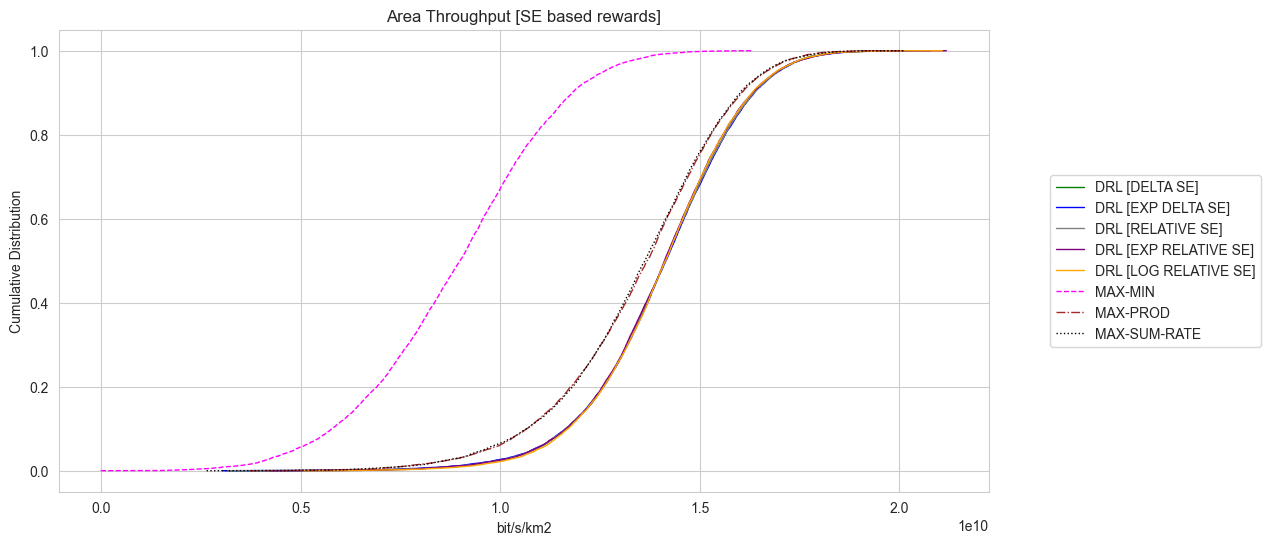

In [49]:
plot_cdf_pdf(data=ATHP_DATA_R_SE, title='Area Throughput [SE based rewards]', xlabel='bit/s/km2', operation=None, cumulative=True)

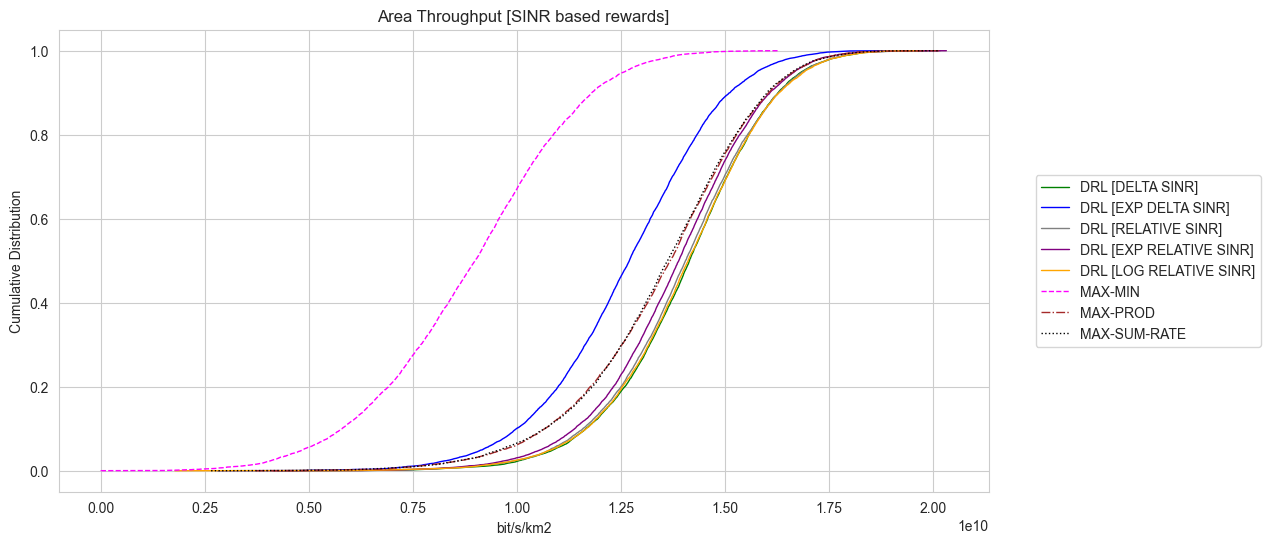

In [50]:
plot_cdf_pdf(data=ATHP_DATA_R_SINR, title='Area Throughput [SINR based rewards]', xlabel='bit/s/km2', operation=None, cumulative=True)

## Uplink Power

In [51]:
# load data from csv files
MODEL_DELTA_SE_POWERs                  = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_POWERs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SE_POWERs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SEv0_POWERs.csv', index_col=0)
# MODEL_LOG_DELTA_SE_POWERs              = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SE_POWERs.csv', index_col=0)
MODEL_RELATIVE_SE_POWERs               = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_POWERs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SE_POWERs      = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SE_POWERs.csv', index_col=0)
MODEL_LOG_RELATIVE_SE_POWERs           = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SE_POWERs.csv', index_col=0)
MODEL_DELTA_SINR_POWERs                = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SINR_POWERs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SINR_POWERs       = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SINR_POWERs.csv', index_col=0)
# MODEL_LOG_DELTA_SINR_POWERs            = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SINR_POWERs.csv', index_col=0)
MODEL_RELATIVE_SINR_POWERs             = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SINR_POWERs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SINR_POWERs    = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_RELATIVE_CLIP_SINR_POWERs.csv', index_col=0)
MODEL_LOG_RELATIVE_SINR_POWERs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SINR_POWERs.csv', index_col=0)

MAXMIN_POWERs  =  pd.read_csv(f'{results_dir}/{results_folder}/MAXMIN_POWERs.csv', index_col=0)
MAXPROD_POWERs = pd.read_csv(f'{results_dir}/{results_folder}/MAXPROD_POWERs.csv', index_col=0)
SUMRATE_POWERs = pd.read_csv(f'{results_dir}/{results_folder}/SUMRATE_POWERs.csv', index_col=0)

In [52]:
P_DATA_R_SE = {
    'MODEL_DELTA_SE_POWERs':               {'label': 'DRL [DELTA SE]',             'data': MODEL_DELTA_SE_POWERs,                 'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SE_POWERs':      {'label': 'DRL [EXP DELTA SE]',         'data': MODEL_EXP_DELTA_CLIP_SE_POWERs,        'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    # 'MODEL_LOG_DELTA_SE_POWERs':           {'label': 'DRL [LOG DELTA SE]',         'data': MODEL_LOG_DELTA_SE_POWERs,             'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SE_POWERs':            {'label': 'DRL [RELATIVE SE]',          'data': MODEL_RELATIVE_SE_POWERs,              'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SE_POWERs':   {'label': 'DRL [EXP RELATIVE SE]',      'data': MODEL_EXP_RELATIVE_CLIP_SE_POWERs,     'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SE_POWERs':        {'label': 'DRL [LOG RELATIVE SE]',      'data': MODEL_LOG_RELATIVE_SE_POWERs,          'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_POWERs':                       {'label': 'MAX-MIN',                    'data': MAXMIN_POWERs,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_POWERs':                      {'label': 'MAX-PROD',                   'data': MAXPROD_POWERs,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_POWERs':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_POWERs,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

P_DATA_R_SINR = {
    'MODEL_DELTA_SINR_POWERs':             {'label': 'DRL [DELTA SINR]',           'data': MODEL_DELTA_SINR_POWERs,               'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SINR_POWERs':    {'label': 'DRL [EXP DELTA SINR]',       'data': MODEL_EXP_DELTA_CLIP_SINR_POWERs,      'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    # 'MODEL_LOG_DELTA_SINR_POWERs':         {'label': 'DRL [LOG DELTA SINR]',       'data': MODEL_LOG_DELTA_SINR_POWERs,           'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SINR_POWERs':          {'label': 'DRL [RELATIVE SINR]',        'data': MODEL_RELATIVE_SINR_POWERs,            'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SINR_POWERs': {'label': 'DRL [EXP RELATIVE SINR]',    'data': MODEL_EXP_RELATIVE_CLIP_SINR_POWERs,   'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SINR_POWERs':      {'label': 'DRL [LOG RELATIVE SINR]',    'data': MODEL_LOG_RELATIVE_SINR_POWERs,        'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_POWERs':                       {'label': 'MAX-MIN',                    'data': MAXMIN_POWERs,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_POWERs':                      {'label': 'MAX-PROD',                   'data': MAXPROD_POWERs,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_POWERs':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_POWERs,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

### Uplink Power

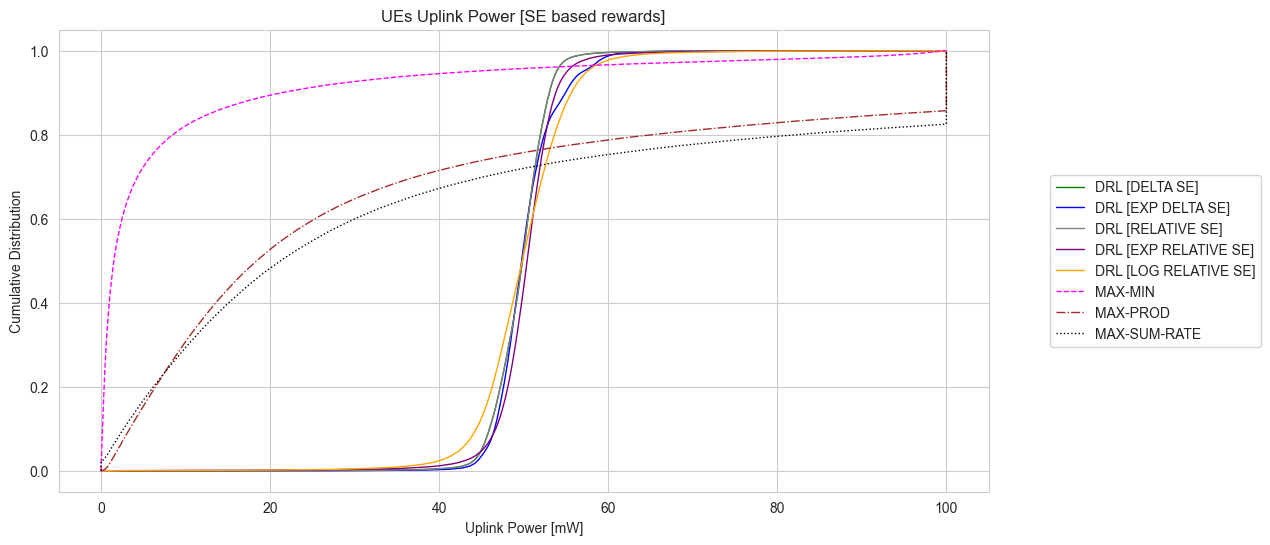

In [53]:
plot_cdf_pdf(data=P_DATA_R_SE, title='UEs Uplink Power [SE based rewards]', xlabel='Uplink Power [mW]', operation=None, cumulative=True)

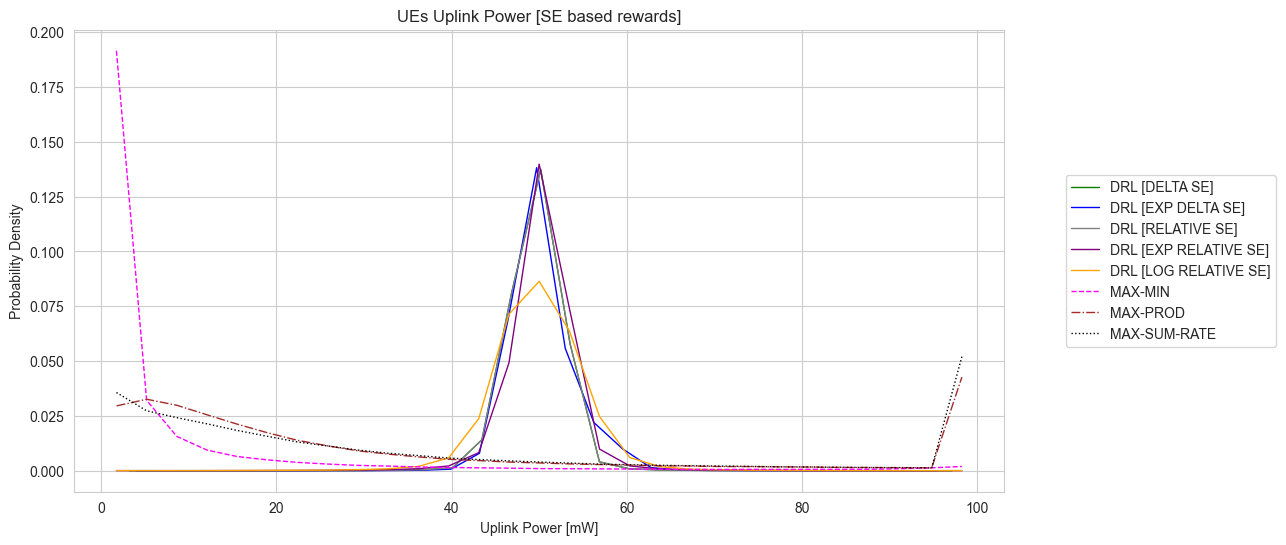

In [54]:
plot_cdf_pdf(data=P_DATA_R_SE, title='UEs Uplink Power [SE based rewards]', xlabel='Uplink Power [mW]', operation=None, cumulative=False)

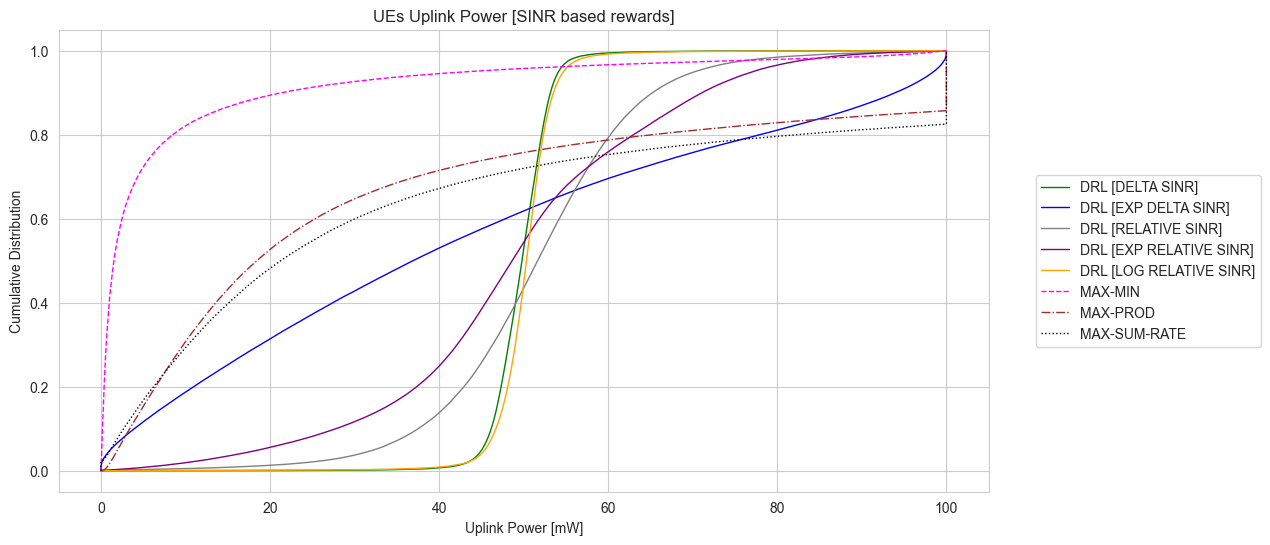

In [55]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='UEs Uplink Power [SINR based rewards]', xlabel='Uplink Power [mW]', operation=None, cumulative=True)

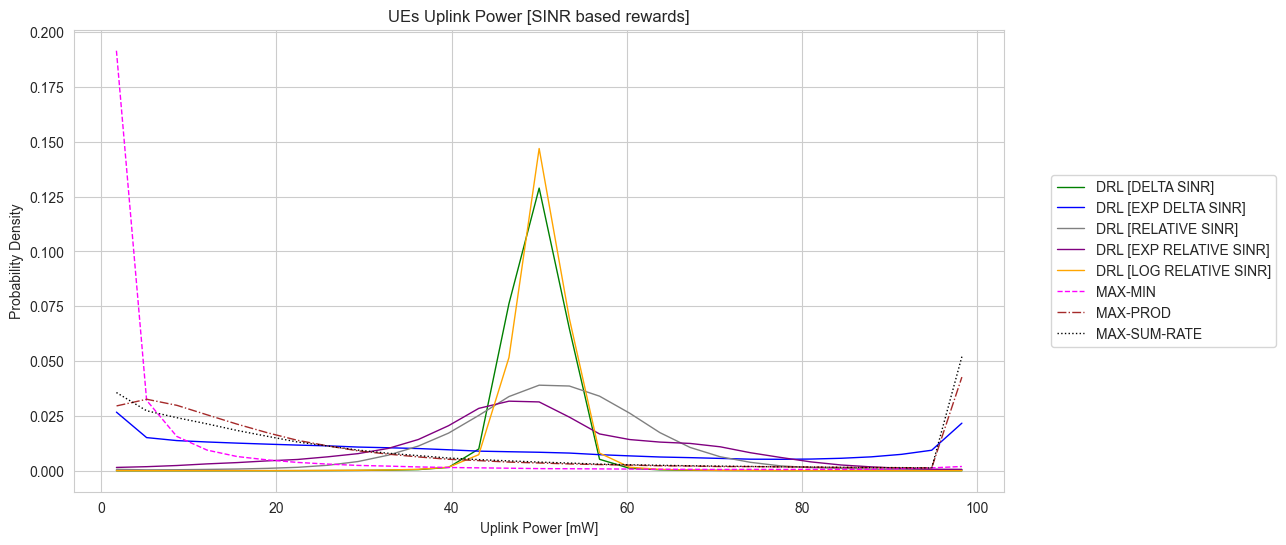

In [56]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='UEs Uplink Power [SINR based rewards]', xlabel='Uplink Power [mW]', operation=None, cumulative=False)

### Mean Uplink Power

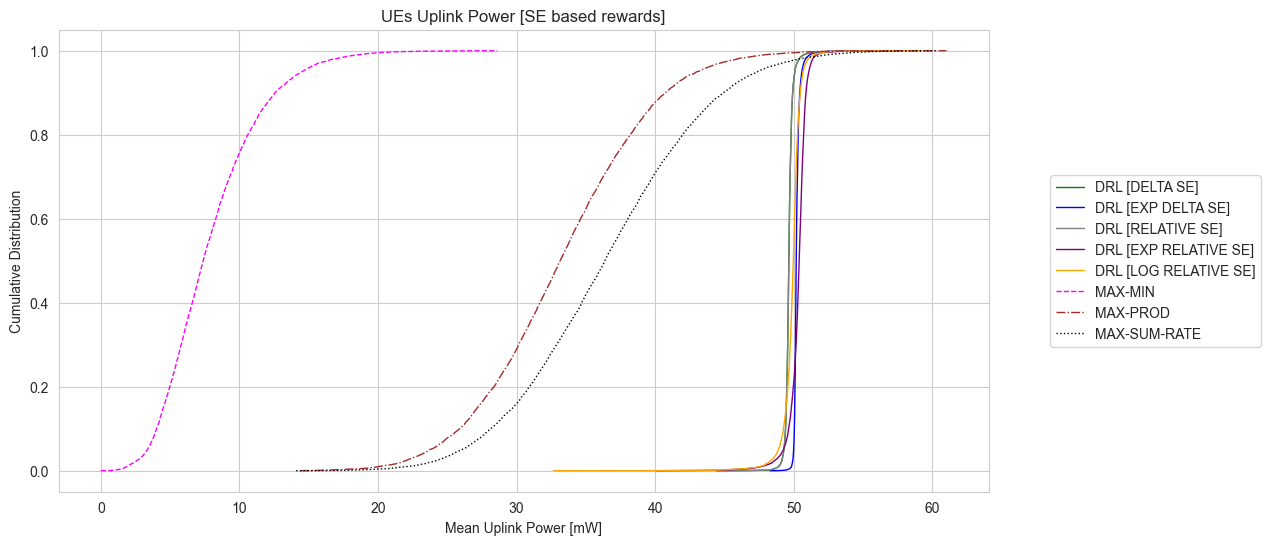

In [57]:
plot_cdf_pdf(data=P_DATA_R_SE, title='UEs Uplink Power [SE based rewards]', xlabel='Mean Uplink Power [mW]', operation='mean', cumulative=True)

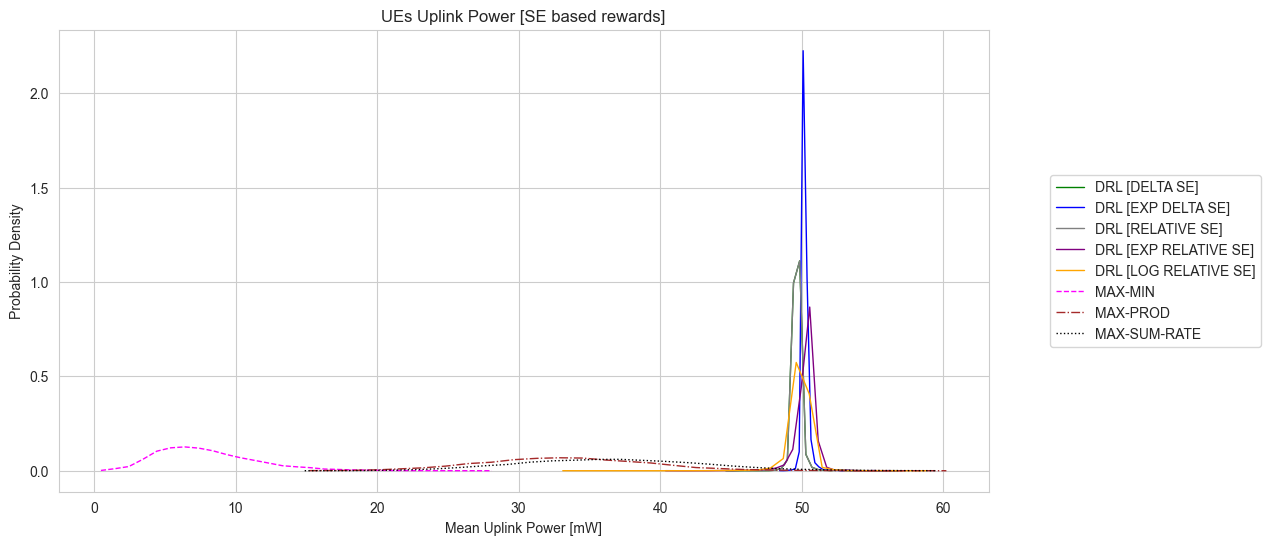

In [58]:
plot_cdf_pdf(data=P_DATA_R_SE, title='UEs Uplink Power [SE based rewards]', xlabel='Mean Uplink Power [mW]', operation='mean', cumulative=False)

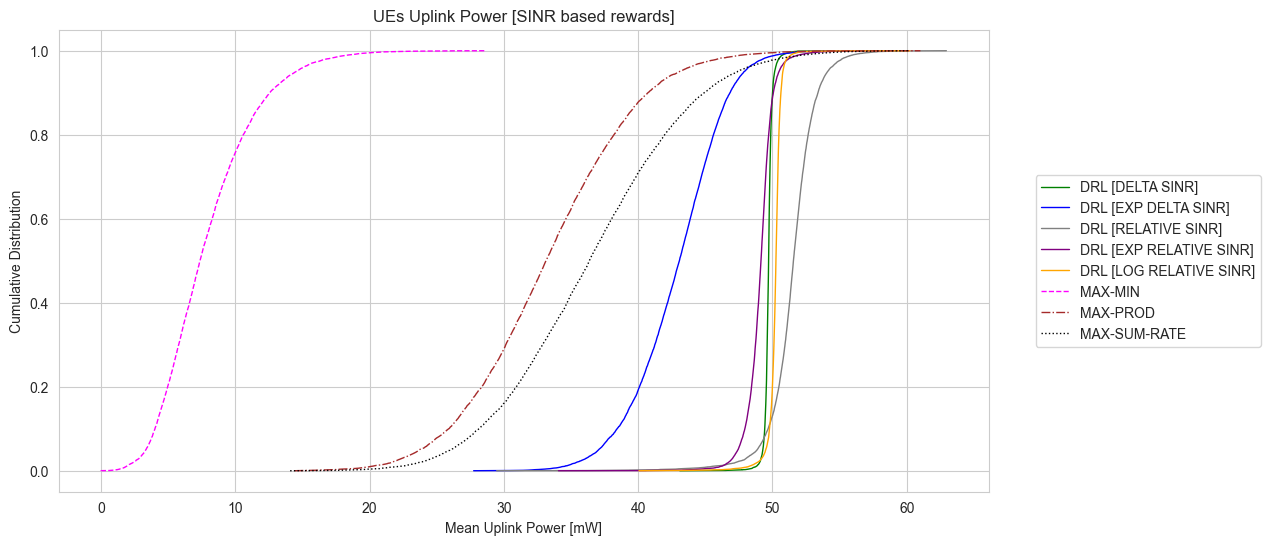

In [59]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='UEs Uplink Power [SINR based rewards]', xlabel='Mean Uplink Power [mW]', operation='mean', cumulative=True)

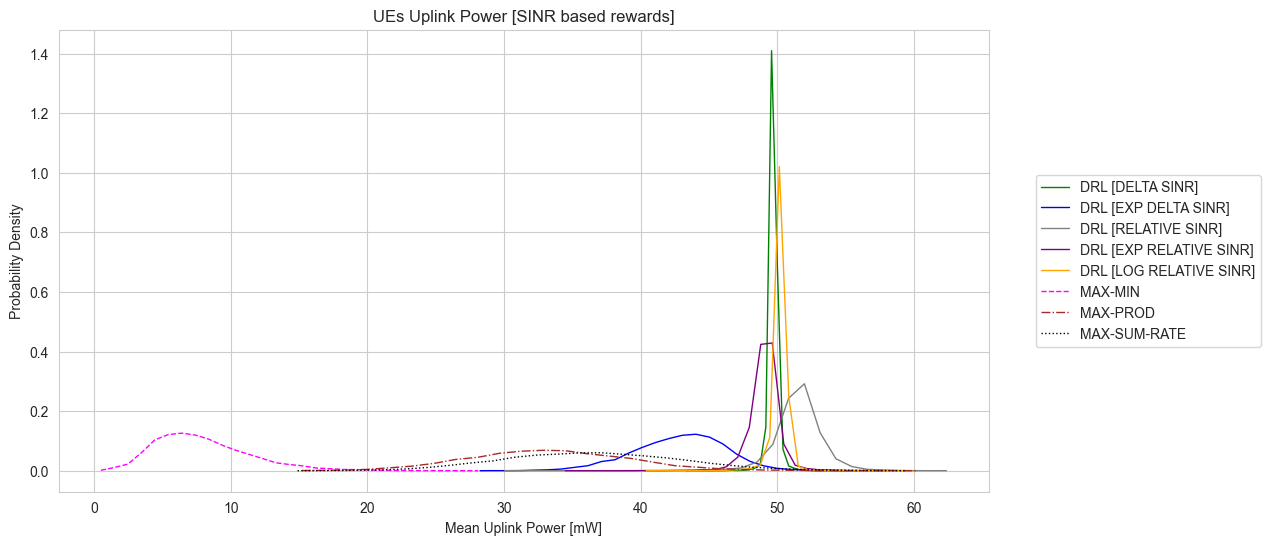

In [60]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='UEs Uplink Power [SINR based rewards]', xlabel='Mean Uplink Power [mW]', operation='mean', cumulative=False)

### Min Uplink Power

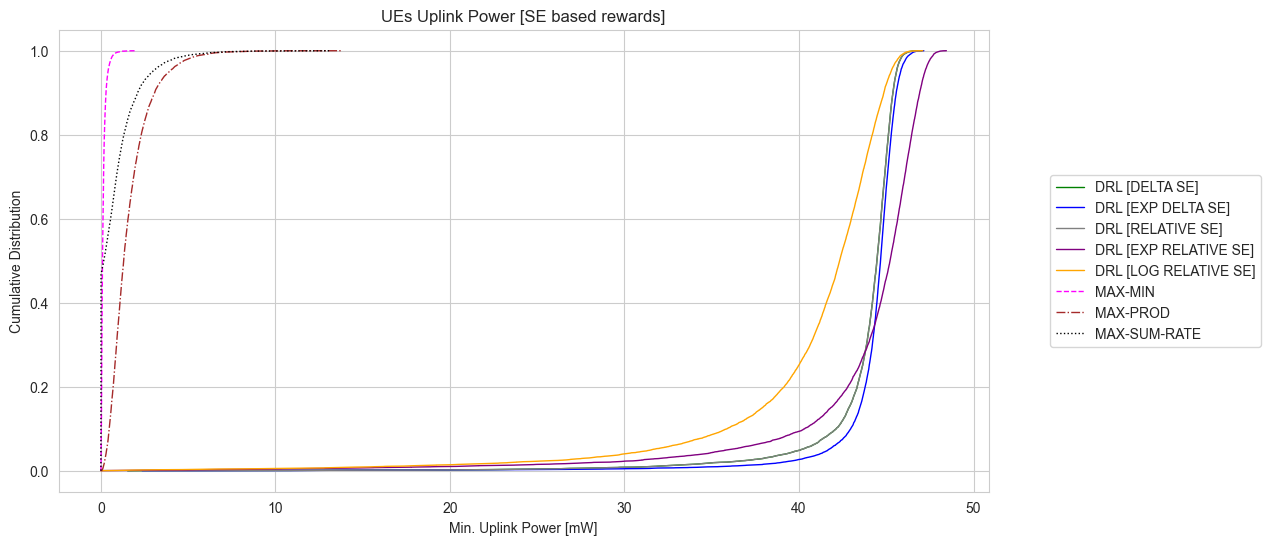

In [61]:
plot_cdf_pdf(data=P_DATA_R_SE, title='UEs Uplink Power [SE based rewards]', xlabel='Min. Uplink Power [mW]', operation='min', cumulative=True)

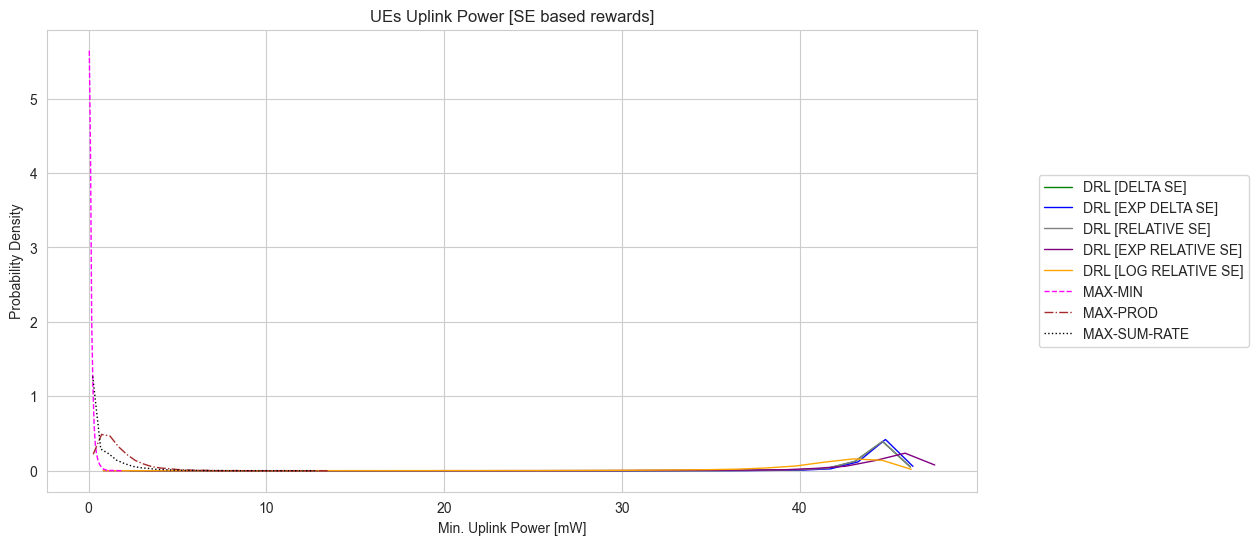

In [62]:
plot_cdf_pdf(data=P_DATA_R_SE, title='UEs Uplink Power [SE based rewards]', xlabel='Min. Uplink Power [mW]', operation='min', cumulative=False)

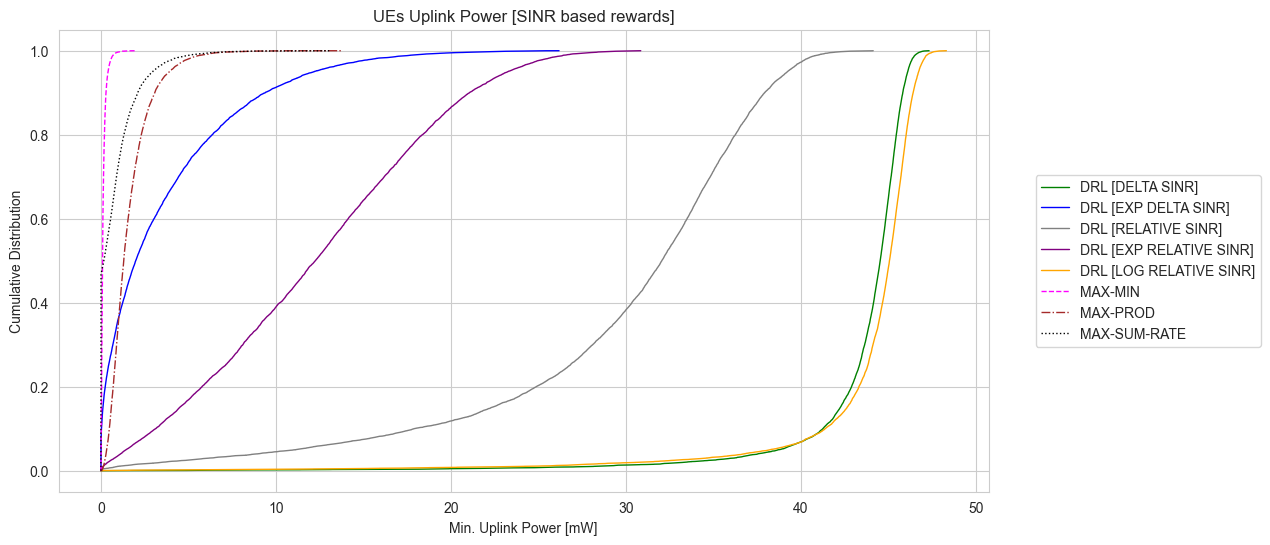

In [63]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='UEs Uplink Power [SINR based rewards]', xlabel='Min. Uplink Power [mW]', operation='min', cumulative=True)

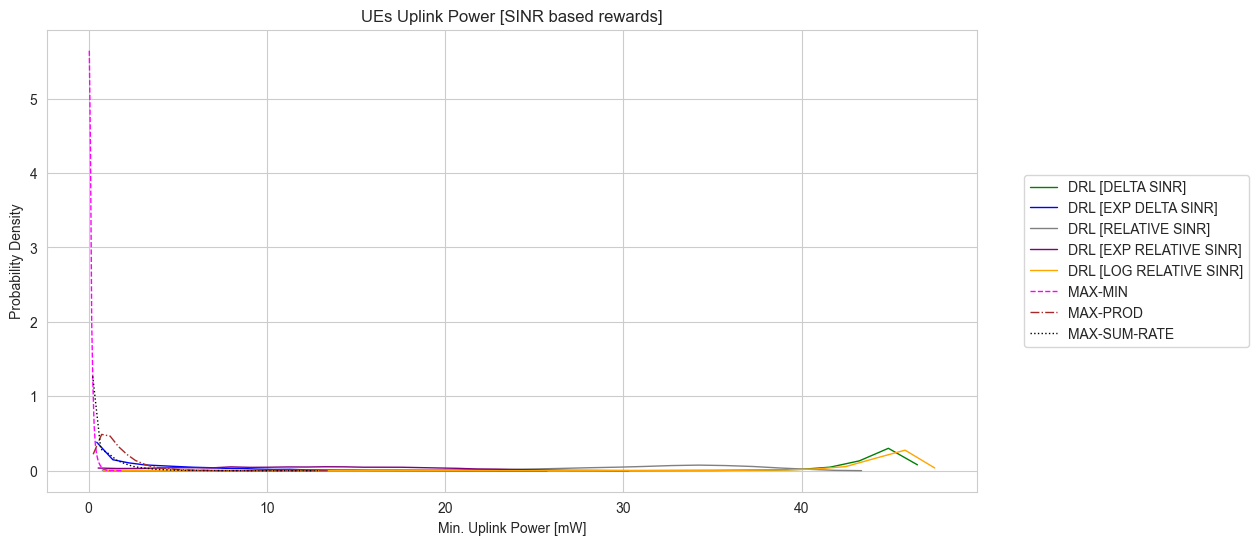

In [64]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='UEs Uplink Power [SINR based rewards]', xlabel='Min. Uplink Power [mW]', operation='min', cumulative=False)

### Max Uplink Power

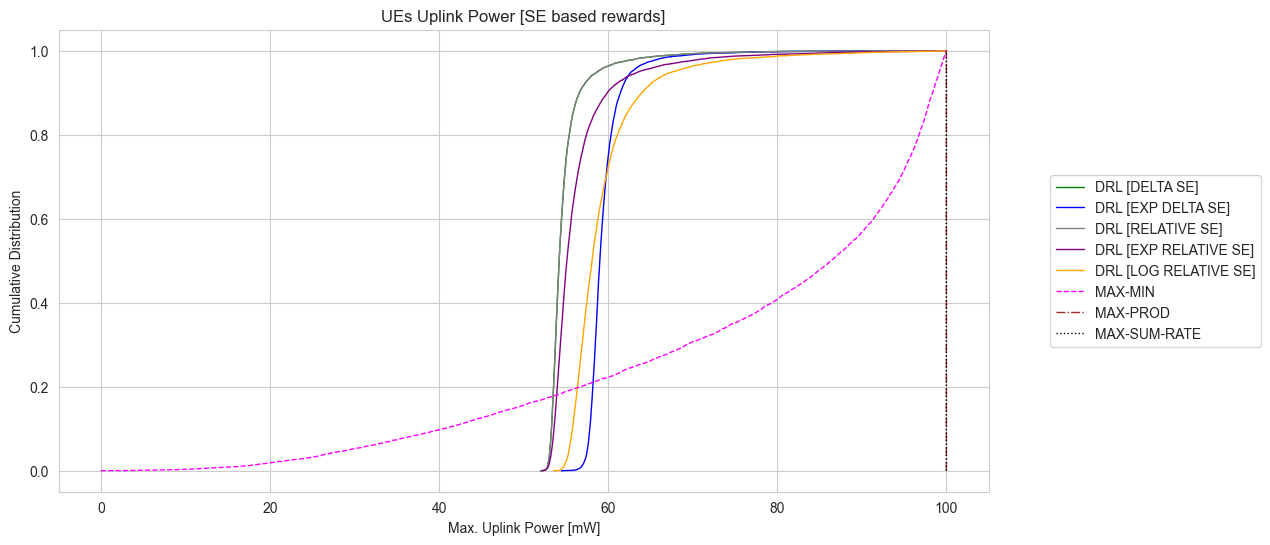

In [65]:
plot_cdf_pdf(data=P_DATA_R_SE, title='UEs Uplink Power [SE based rewards]', xlabel='Max. Uplink Power [mW]', operation='max', cumulative=True)

Data for MAXPROD_POWERs lacks variability, skipping PDF plot.
Data for SUMRATE_POWERs lacks variability, skipping PDF plot.


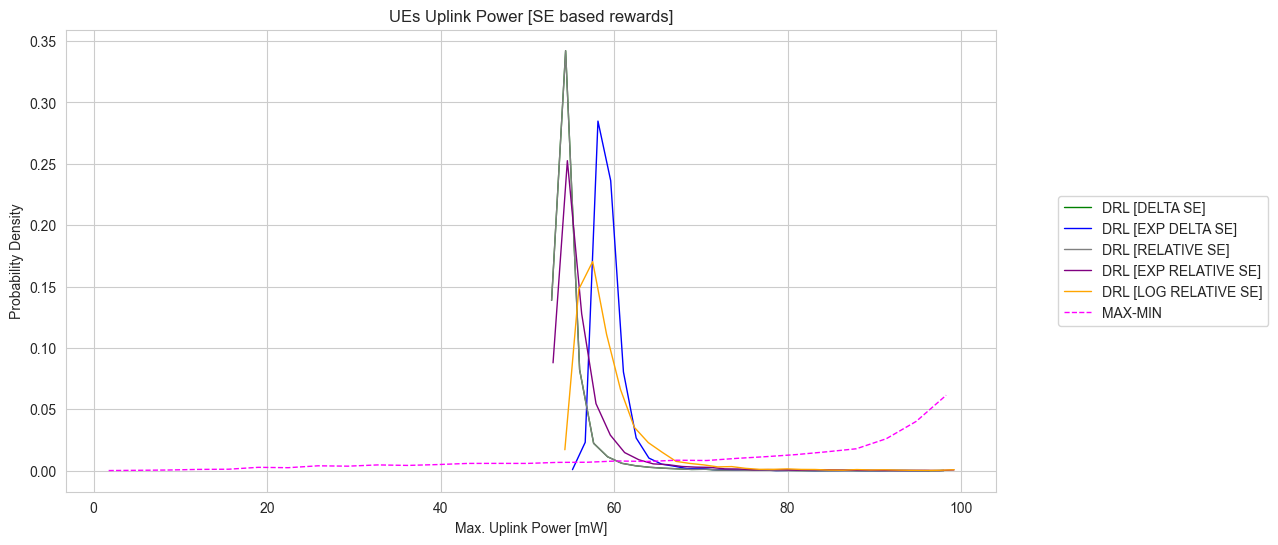

In [66]:
plot_cdf_pdf(data=P_DATA_R_SE, title='UEs Uplink Power [SE based rewards]', xlabel='Max. Uplink Power [mW]', operation='max', cumulative=False)

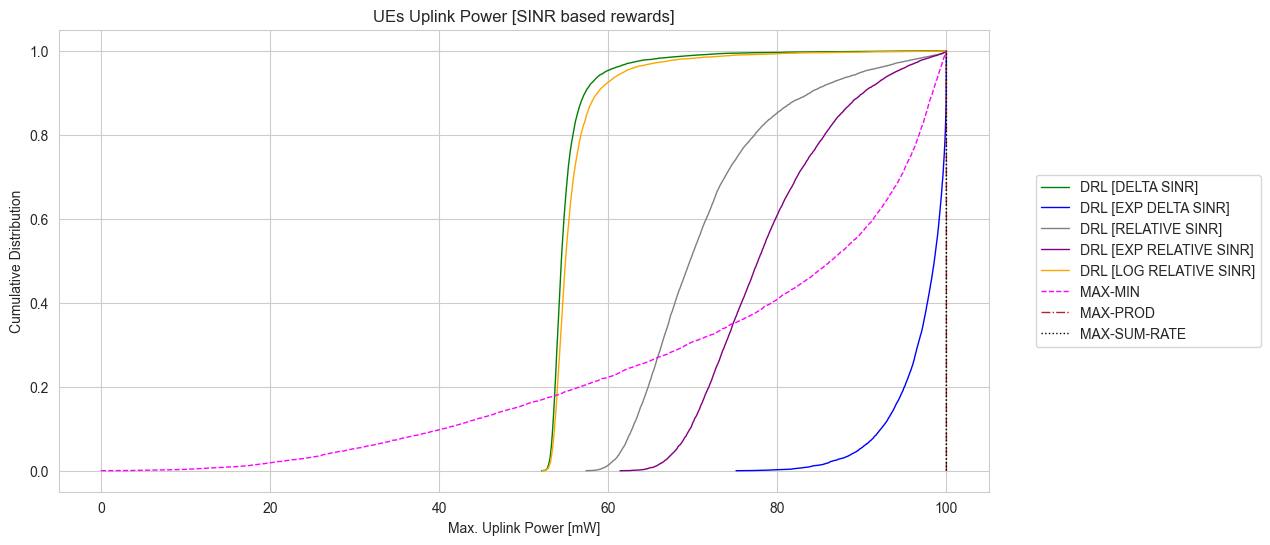

In [67]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='UEs Uplink Power [SINR based rewards]', xlabel='Max. Uplink Power [mW]', operation='max', cumulative=True)

Data for MAXPROD_POWERs lacks variability, skipping PDF plot.
Data for SUMRATE_POWERs lacks variability, skipping PDF plot.


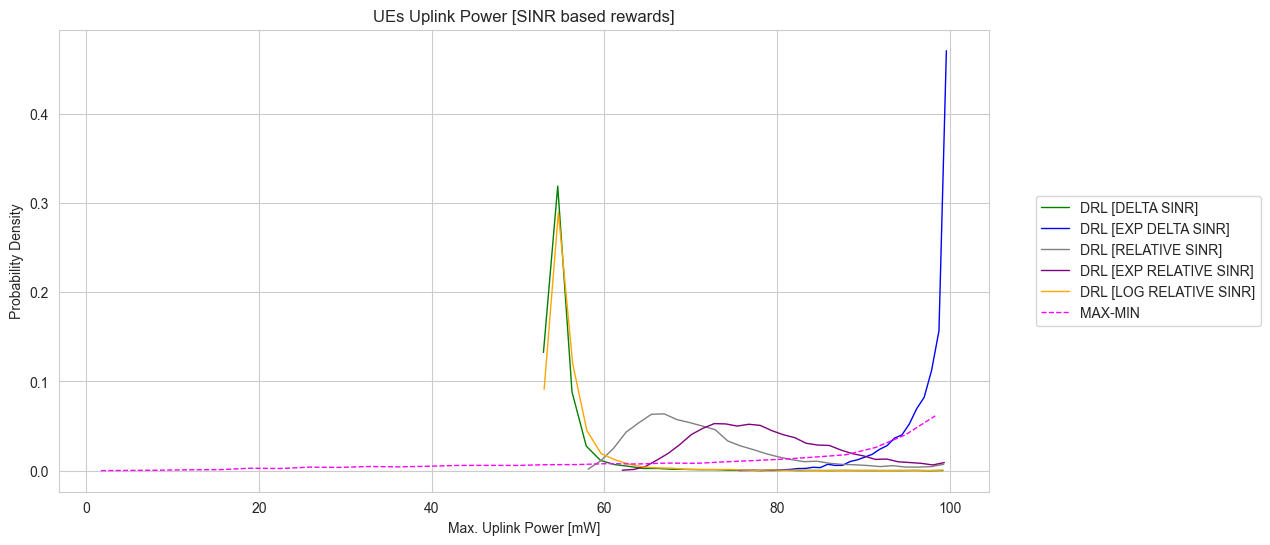

In [68]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='UEs Uplink Power [SINR based rewards]', xlabel='Max. Uplink Power [mW]', operation='max', cumulative=False)

### Sum Uplink Power

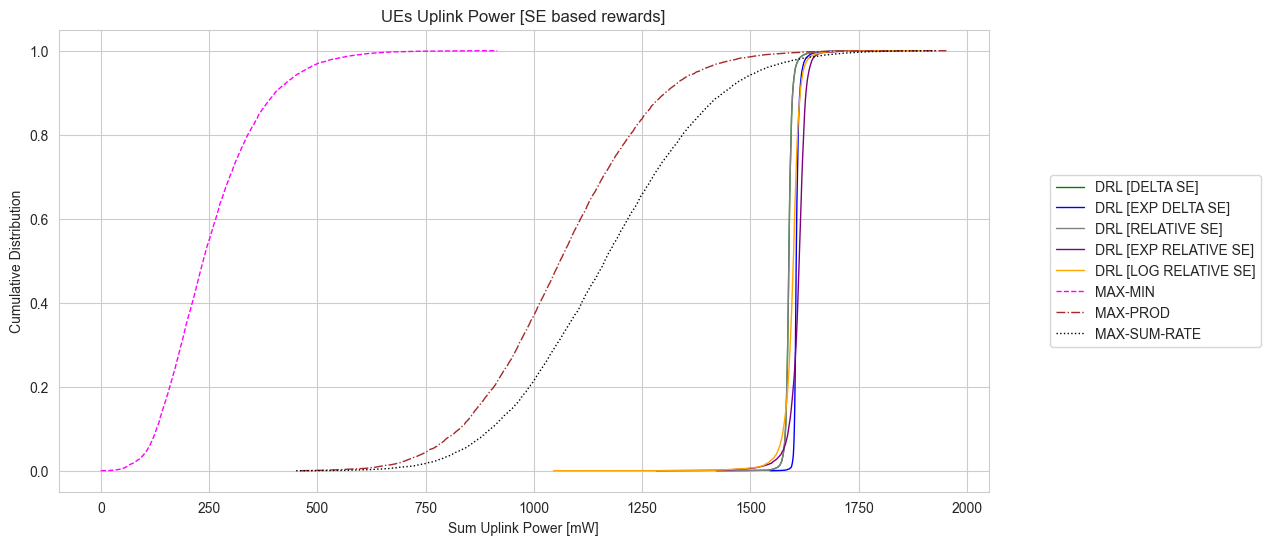

In [69]:
plot_cdf_pdf(data=P_DATA_R_SE, title='UEs Uplink Power [SE based rewards]', xlabel='Sum Uplink Power [mW]', operation='sum', cumulative=True)

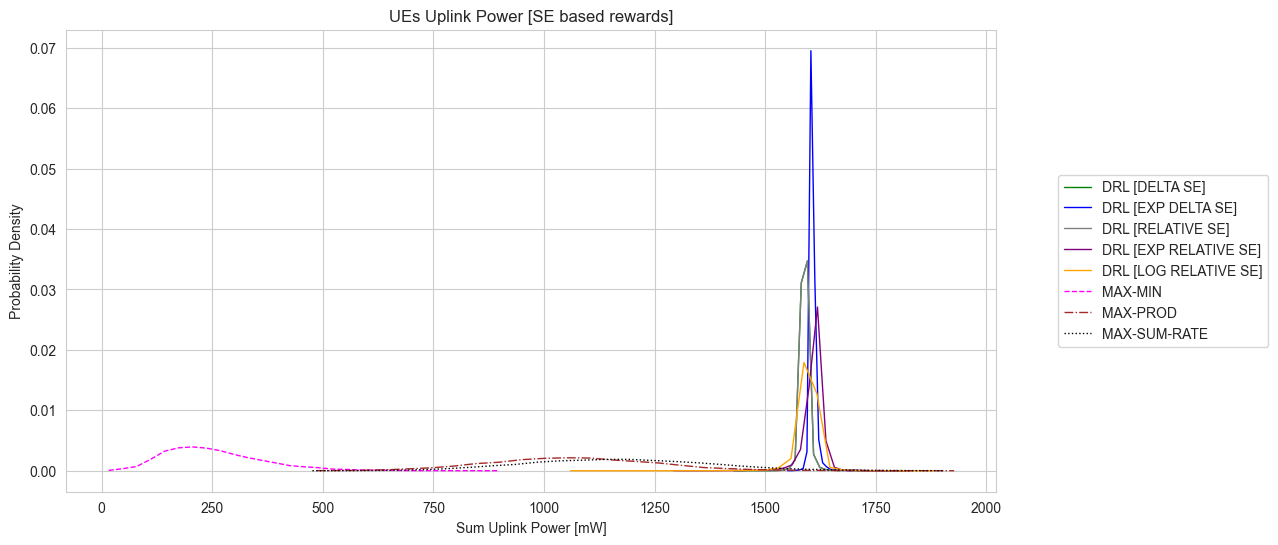

In [70]:
plot_cdf_pdf(data=P_DATA_R_SE, title='UEs Uplink Power [SE based rewards]', xlabel='Sum Uplink Power [mW]', operation='sum', cumulative=False)

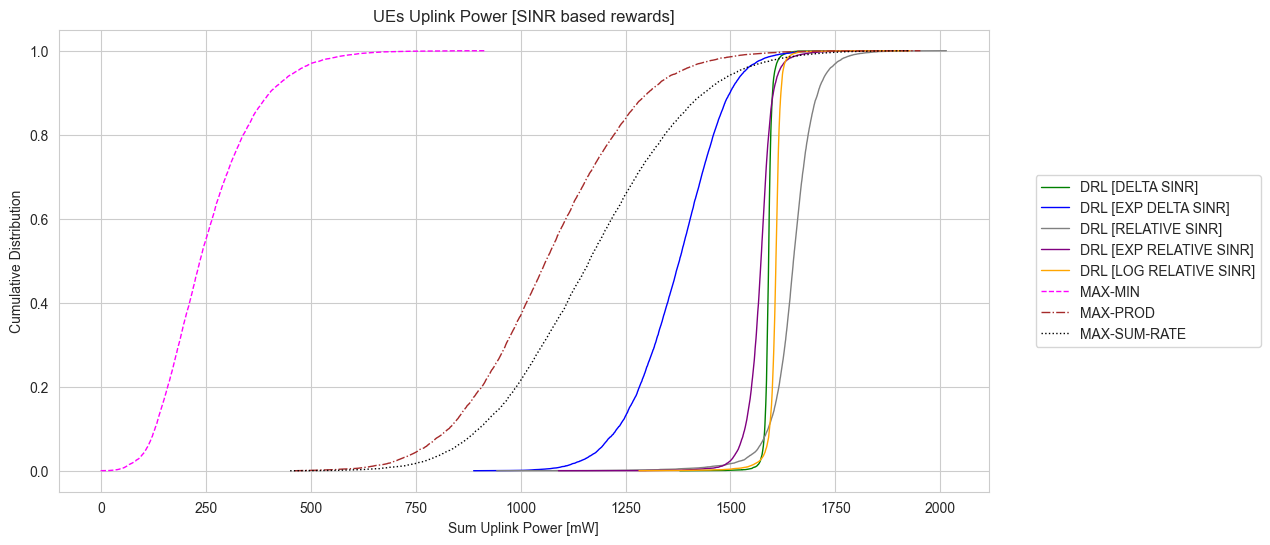

In [71]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='UEs Uplink Power [SINR based rewards]', xlabel='Sum Uplink Power [mW]', operation='sum', cumulative=True)

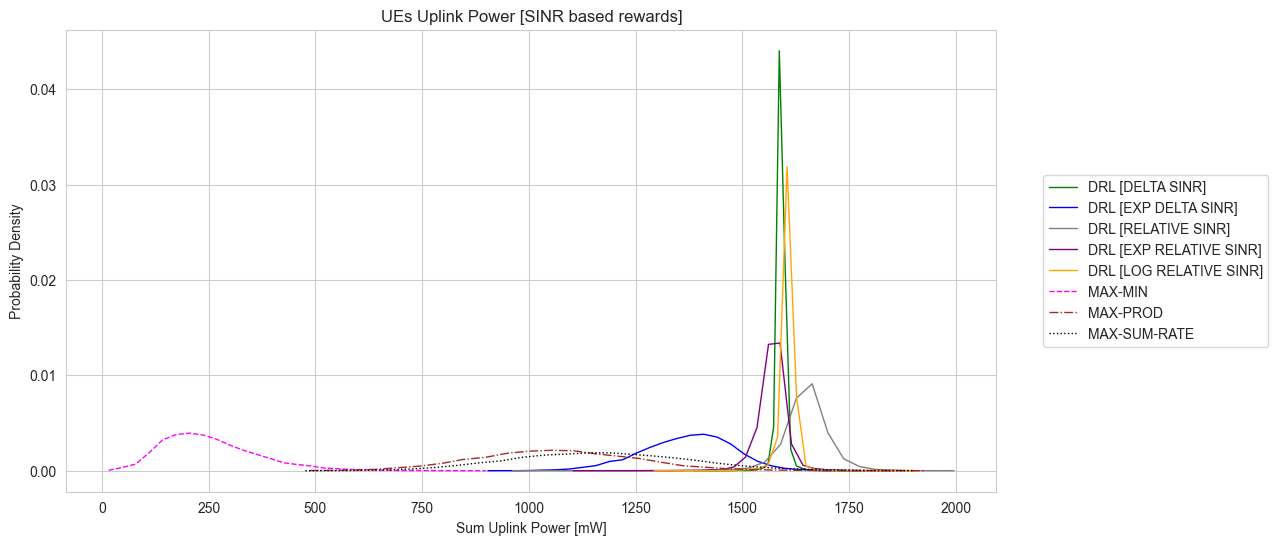

In [72]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='UEs Uplink Power [SINR based rewards]', xlabel='Sum Uplink Power [mW]', operation='sum', cumulative=False)

## SINR

In [73]:
# load data from csv files
MODEL_DELTA_SE_SINRs                  = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_SINRs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SE_SINRs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SEv0_SINRs.csv', index_col=0)
# MODEL_LOG_DELTA_SE_SINRs              = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SE_SINRs.csv', index_col=0)
MODEL_RELATIVE_SE_SINRs               = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_SINRs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SE_SINRs      = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SE_SINRs.csv', index_col=0)
MODEL_LOG_RELATIVE_SE_SINRs           = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SE_SINRs.csv', index_col=0)
MODEL_DELTA_SINR_SINRs                = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SINR_SINRs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SINR_SINRs       = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SINR_SINRs.csv', index_col=0)
# MODEL_LOG_DELTA_SINR_SINRs            = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SINR_SINRs.csv', index_col=0)
MODEL_RELATIVE_SINR_SINRs             = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SINR_SINRs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SINR_SINRs    = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_RELATIVE_CLIP_SINR_SINRs.csv', index_col=0)
MODEL_LOG_RELATIVE_SINR_SINRs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SINR_SINRs.csv', index_col=0)

MAXMIN_SINRs  =  pd.read_csv(f'{results_dir}/{results_folder}/MAXMIN_SINRs.csv', index_col=0)
MAXPROD_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/MAXPROD_SINRs.csv', index_col=0)
SUMRATE_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/SUMRATE_SINRs.csv', index_col=0)

In [74]:
SINR_DATA_R_SE = {
    'MODEL_DELTA_SE_SINRs':               {'label': 'DRL [DELTA SE]',             'data': MODEL_DELTA_SE_SINRs,                 'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SE_SINRs':      {'label': 'DRL [EXP DELTA SE]',         'data': MODEL_EXP_DELTA_CLIP_SE_SINRs,        'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    # 'MODEL_LOG_DELTA_SE_SINRs':           {'label': 'DRL [LOG DELTA SE]',         'data': MODEL_LOG_DELTA_SE_SINRs,             'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SE_SINRs':            {'label': 'DRL [RELATIVE SE]',          'data': MODEL_RELATIVE_SE_SINRs,              'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SE_SINRs':   {'label': 'DRL [EXP RELATIVE SE]',      'data': MODEL_EXP_RELATIVE_CLIP_SE_SINRs,     'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SE_SINRs':        {'label': 'DRL [LOG RELATIVE SE]',      'data': MODEL_LOG_RELATIVE_SE_SINRs,          'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_SINRs':                       {'label': 'MAX-MIN',                    'data': MAXMIN_SINRs,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_SINRs':                      {'label': 'MAX-PROD',                   'data': MAXPROD_SINRs,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_SINRs':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_SINRs,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

SINR_DATA_R_SINR = {
    'MODEL_DELTA_SINR_SINRs':             {'label': 'DRL [DELTA SINR]',           'data': MODEL_DELTA_SINR_SINRs,               'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SINR_SINRs':    {'label': 'DRL [EXP DELTA SINR]',       'data': MODEL_EXP_DELTA_CLIP_SINR_SINRs,      'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    # 'MODEL_LOG_DELTA_SINR_SINRs':         {'label': 'DRL [LOG DELTA SINR]',       'data': MODEL_LOG_DELTA_SINR_SINRs,           'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SINR_SINRs':          {'label': 'DRL [RELATIVE SINR]',        'data': MODEL_RELATIVE_SINR_SINRs,            'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SINR_SINRs': {'label': 'DRL [EXP RELATIVE SINR]',    'data': MODEL_EXP_RELATIVE_CLIP_SINR_SINRs,   'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SINR_SINRs':      {'label': 'DRL [LOG RELATIVE SINR]',    'data': MODEL_LOG_RELATIVE_SINR_SINRs,        'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_SINRs':                       {'label': 'MAX-MIN',                    'data': MAXMIN_SINRs,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_SINRs':                      {'label': 'MAX-PROD',                   'data': MAXPROD_SINRs,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_SINRs':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_SINRs,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

### SINR

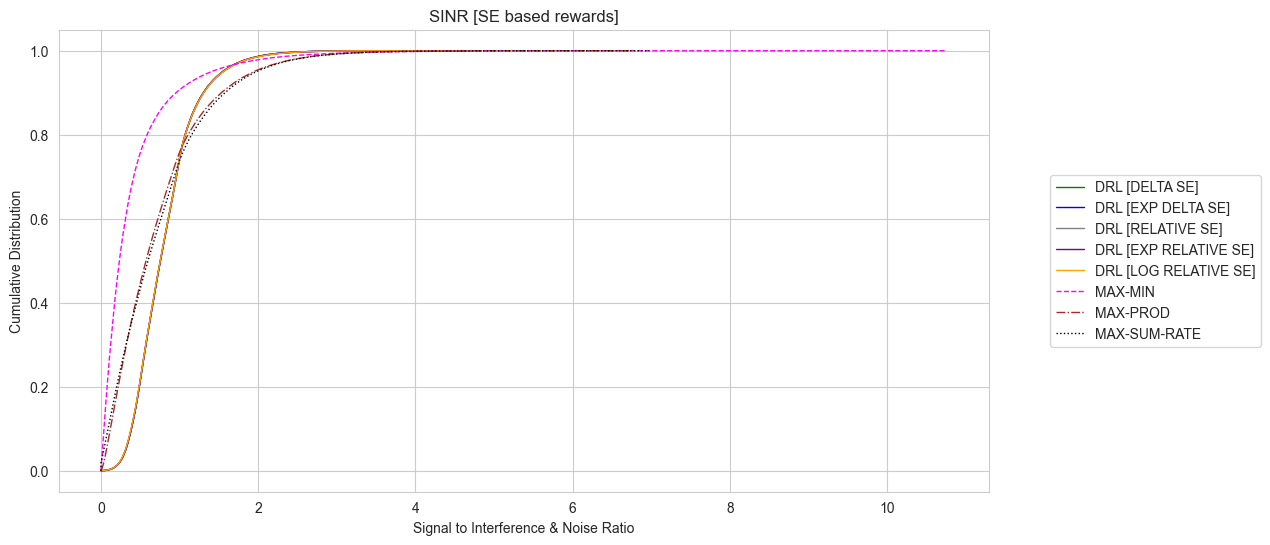

In [75]:
plot_cdf_pdf(data=SINR_DATA_R_SE, title='SINR [SE based rewards]', xlabel='Signal to Interference & Noise Ratio', operation=None, cumulative=True)

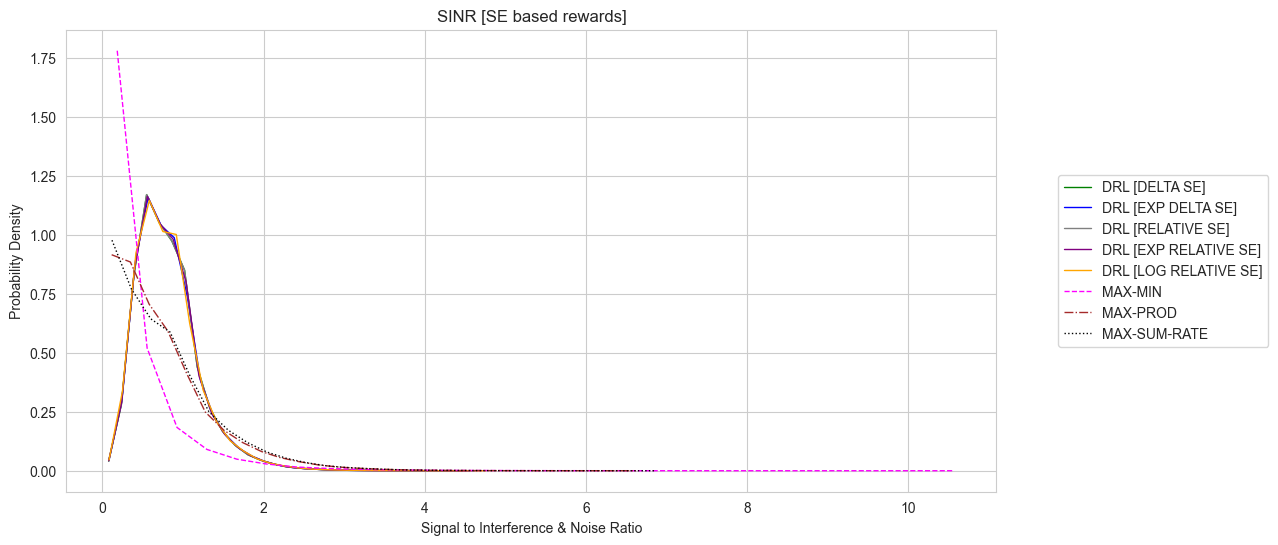

In [76]:
plot_cdf_pdf(data=SINR_DATA_R_SE, title='SINR [SE based rewards]', xlabel='Signal to Interference & Noise Ratio', operation=None, cumulative=False)

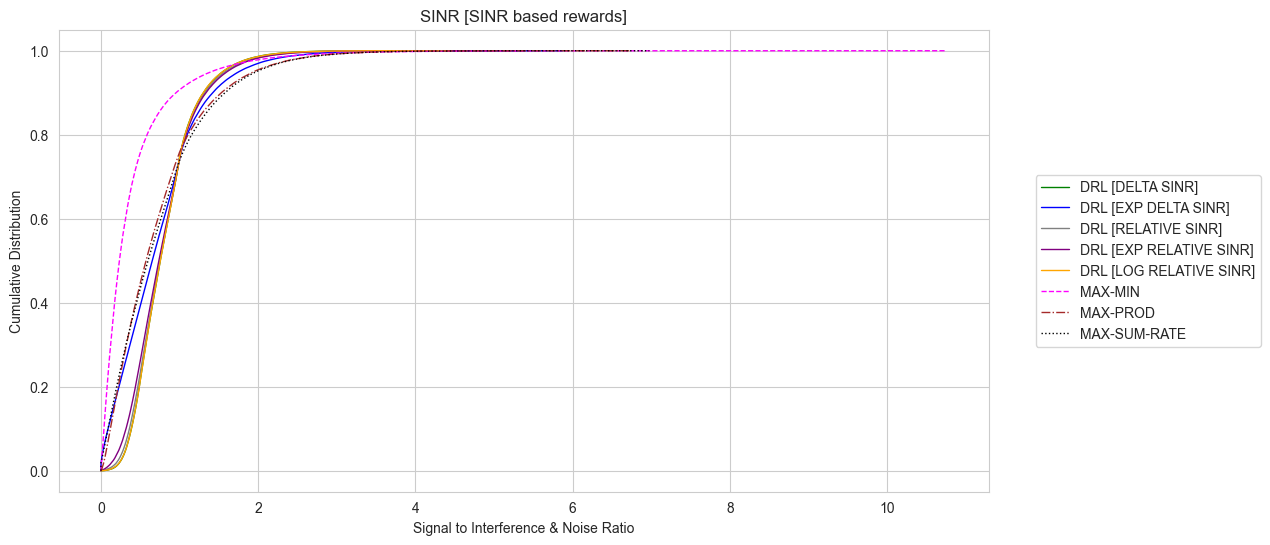

In [77]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='SINR [SINR based rewards]', xlabel='Signal to Interference & Noise Ratio', operation=None, cumulative=True)

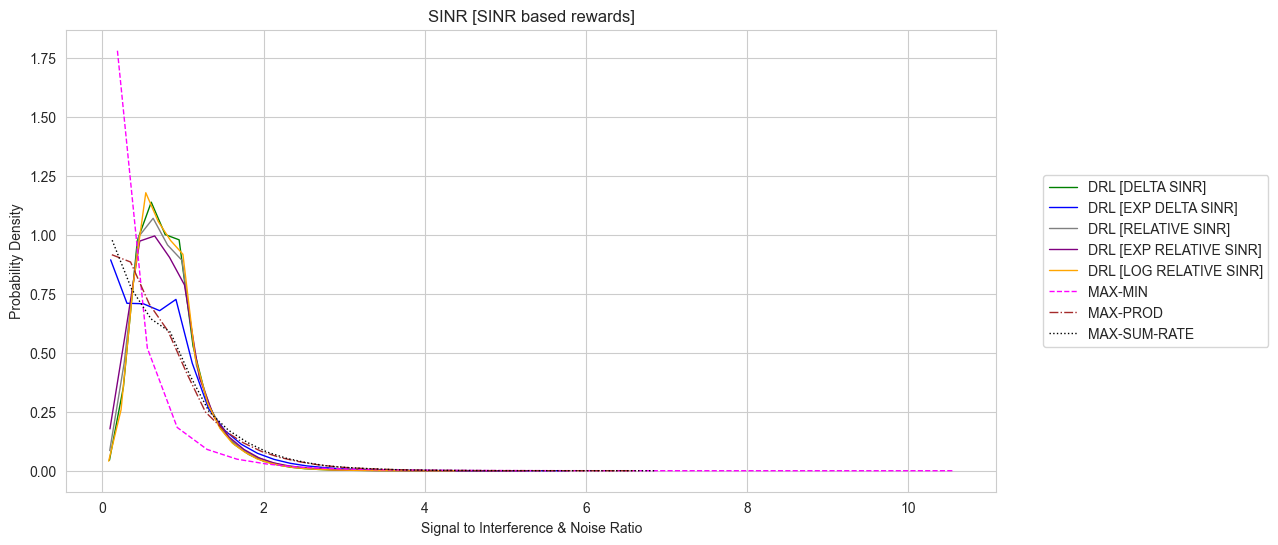

In [78]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='SINR [SINR based rewards]', xlabel='Signal to Interference & Noise Ratio', operation=None, cumulative=False)

### Mean SINR

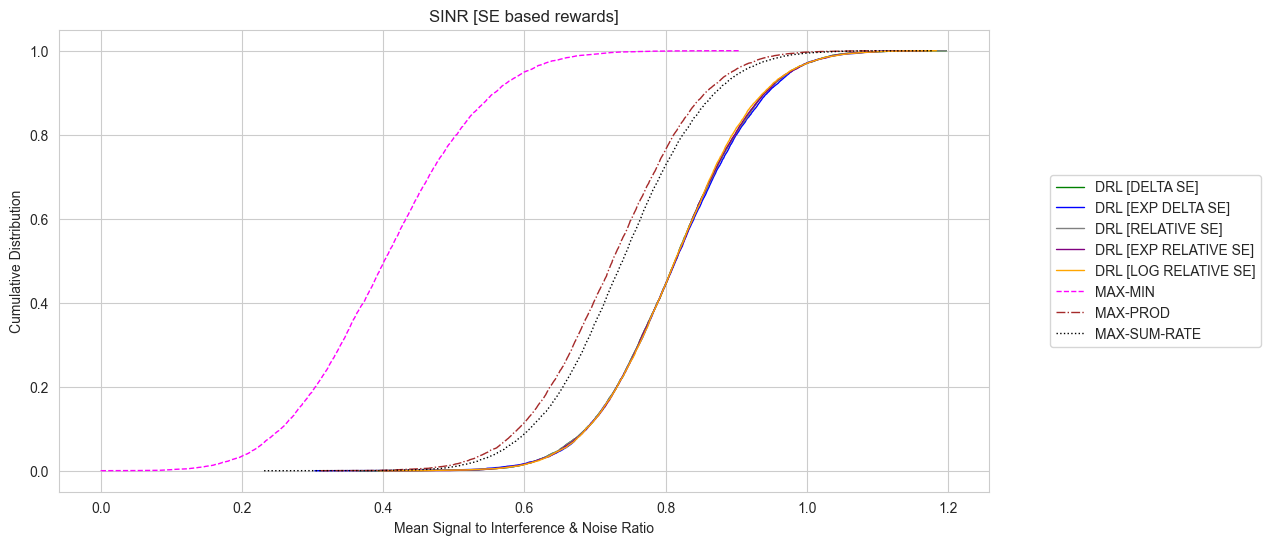

In [79]:
plot_cdf_pdf(data=SINR_DATA_R_SE, title='SINR [SE based rewards]', xlabel='Mean Signal to Interference & Noise Ratio', operation='mean', cumulative=True)

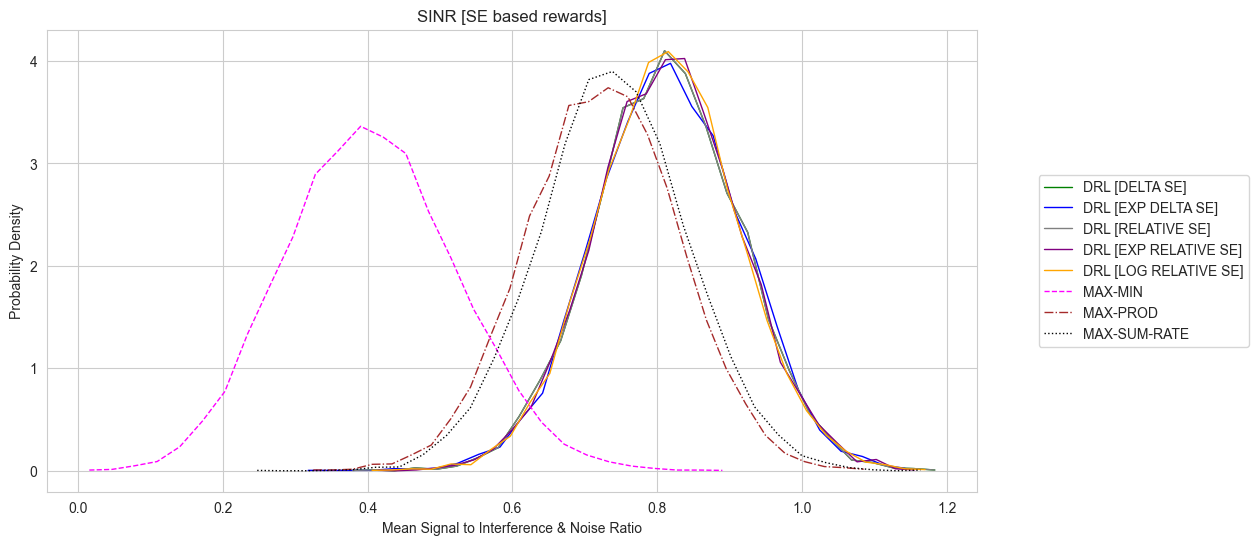

In [80]:
plot_cdf_pdf(data=SINR_DATA_R_SE, title='SINR [SE based rewards]', xlabel='Mean Signal to Interference & Noise Ratio', operation='mean', cumulative=False)

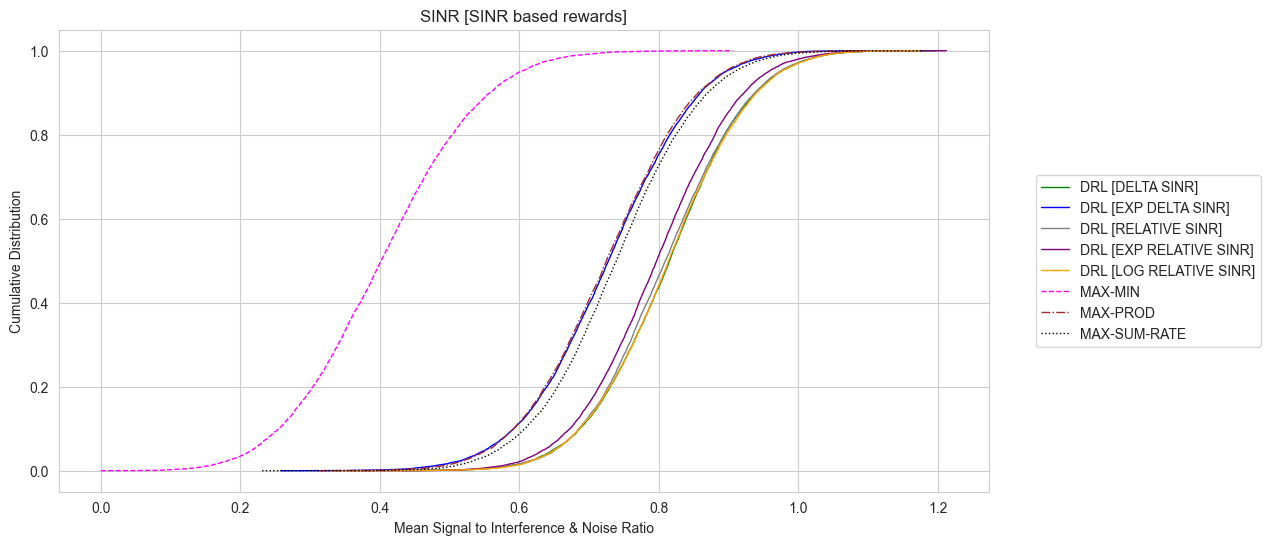

In [81]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='SINR [SINR based rewards]', xlabel='Mean Signal to Interference & Noise Ratio', operation='mean', cumulative=True)

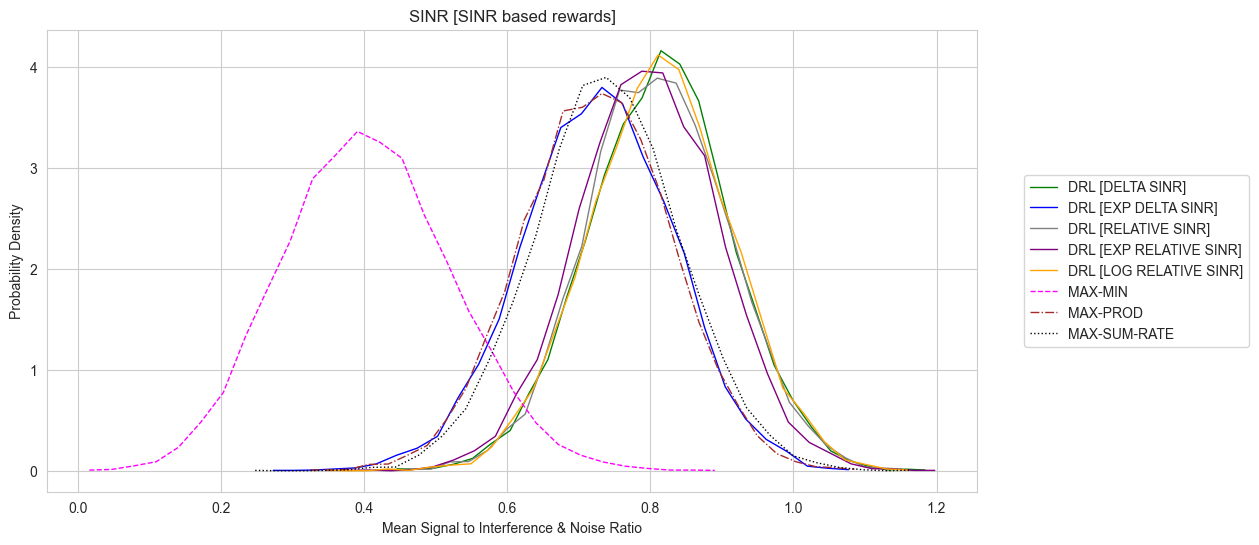

In [82]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='SINR [SINR based rewards]', xlabel='Mean Signal to Interference & Noise Ratio', operation='mean', cumulative=False)

### Min SINR

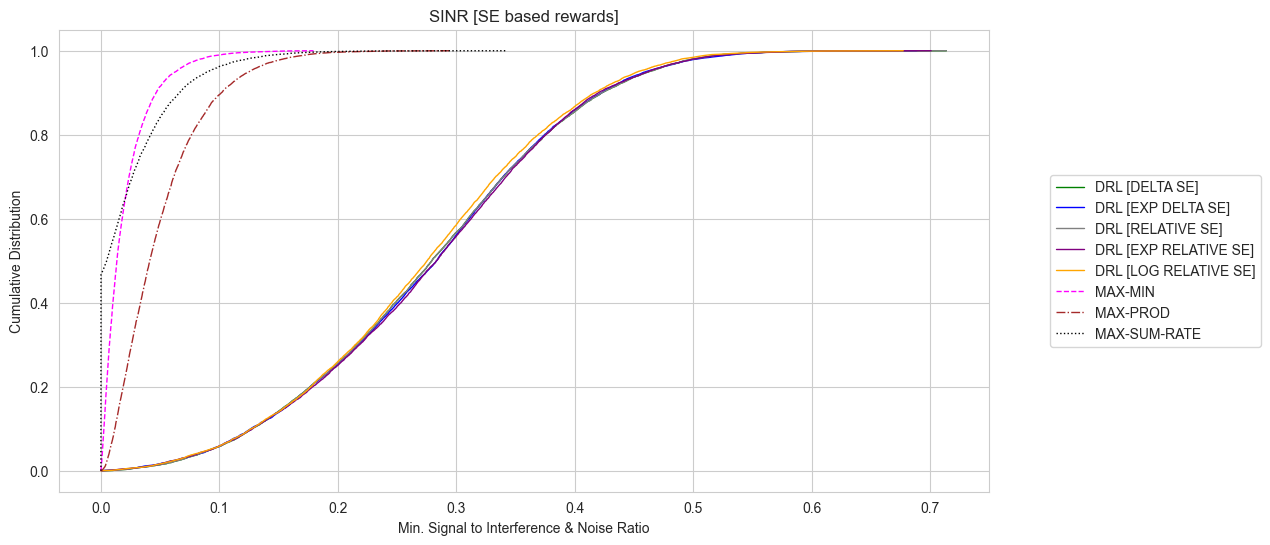

In [83]:
plot_cdf_pdf(data=SINR_DATA_R_SE, title='SINR [SE based rewards]', xlabel='Min. Signal to Interference & Noise Ratio', operation='min', cumulative=True)

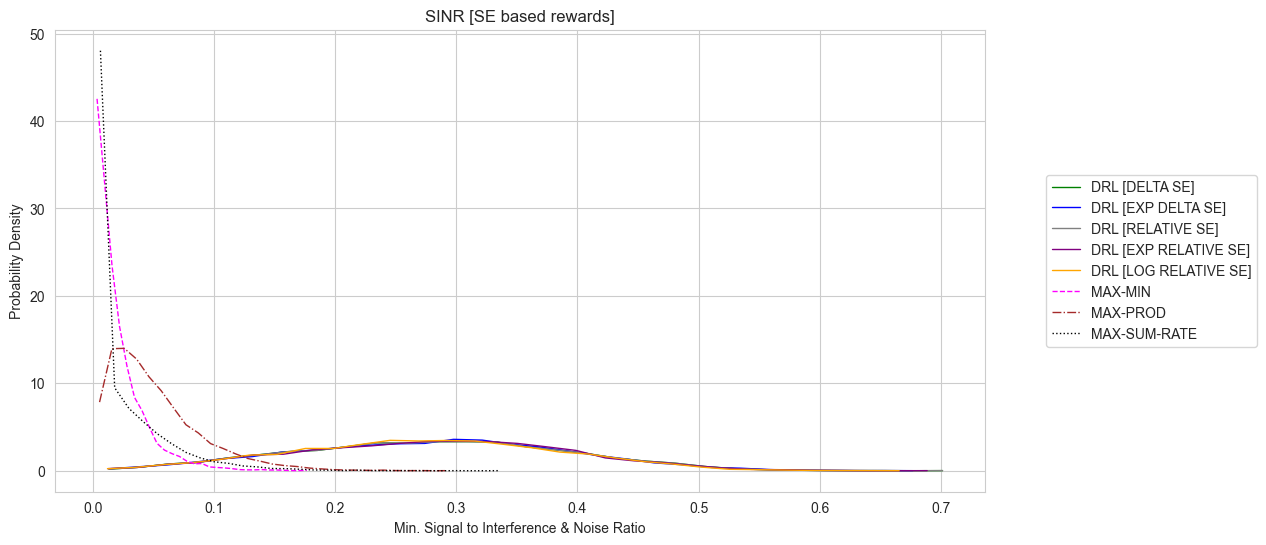

In [84]:
plot_cdf_pdf(data=SINR_DATA_R_SE, title='SINR [SE based rewards]', xlabel='Min. Signal to Interference & Noise Ratio', operation='min', cumulative=False)

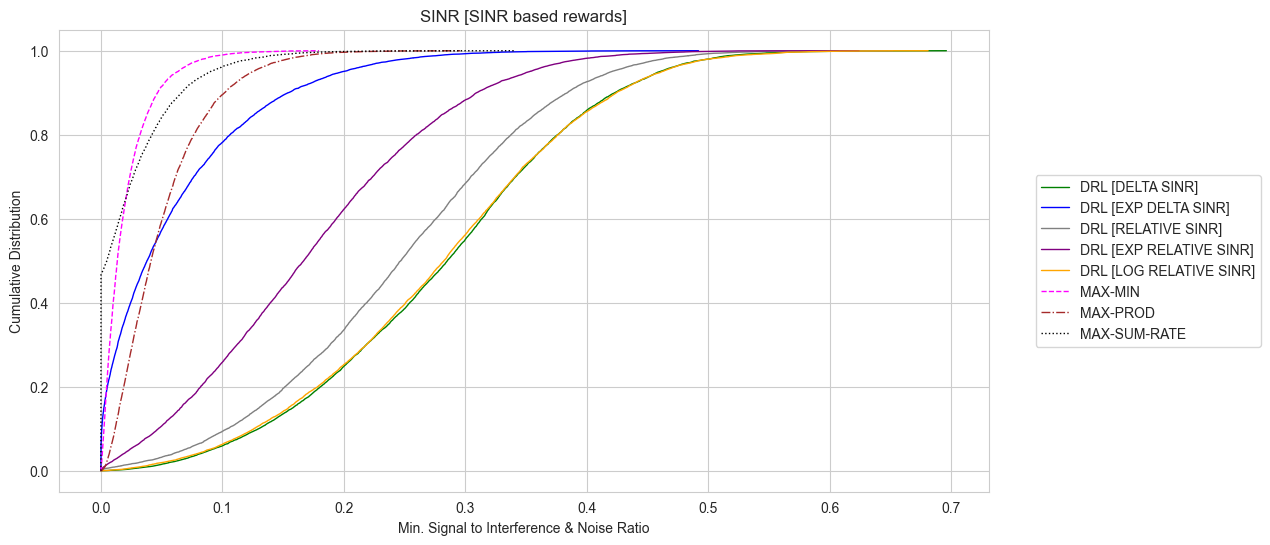

In [85]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='SINR [SINR based rewards]', xlabel='Min. Signal to Interference & Noise Ratio', operation='min', cumulative=True)

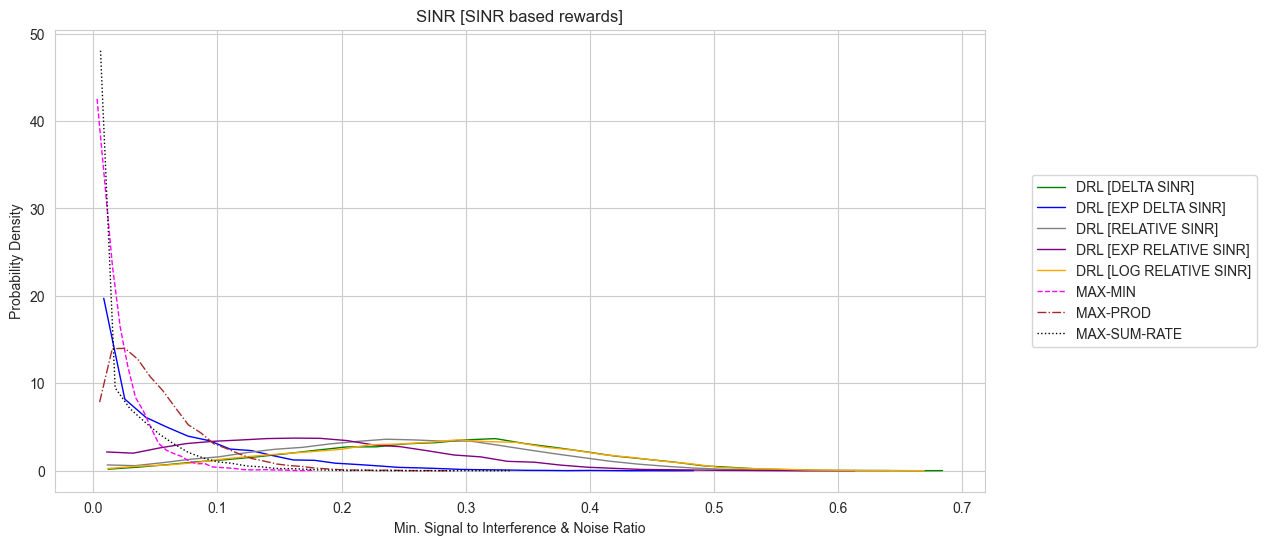

In [86]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='SINR [SINR based rewards]', xlabel='Min. Signal to Interference & Noise Ratio', operation='min', cumulative=False)

### Max SINR

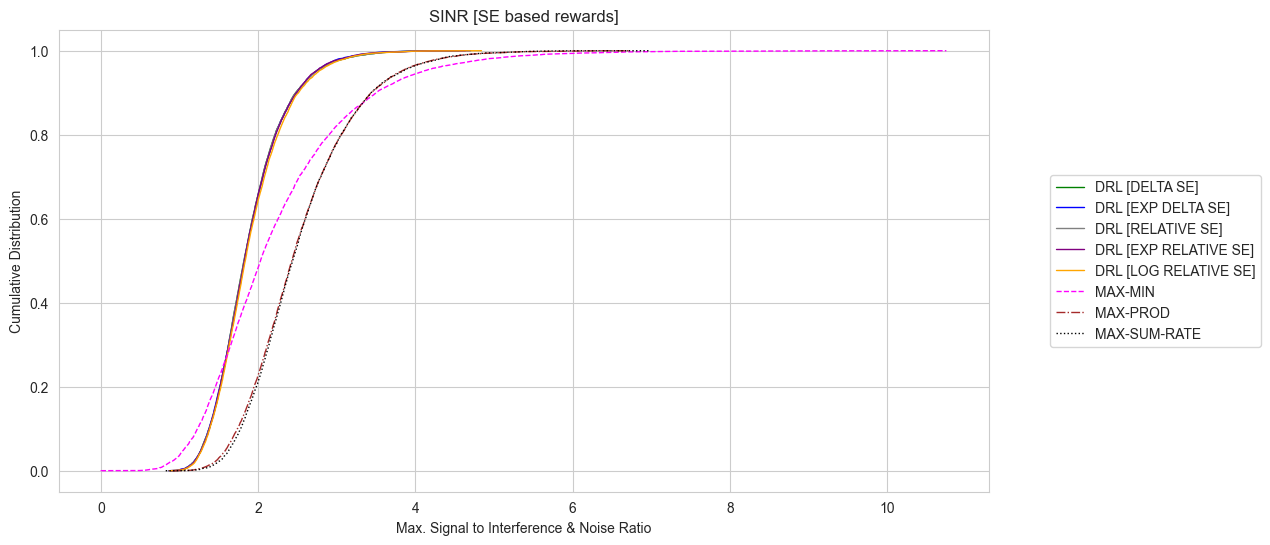

In [87]:
plot_cdf_pdf(data=SINR_DATA_R_SE, title='SINR [SE based rewards]', xlabel='Max. Signal to Interference & Noise Ratio', operation='max', cumulative=True)

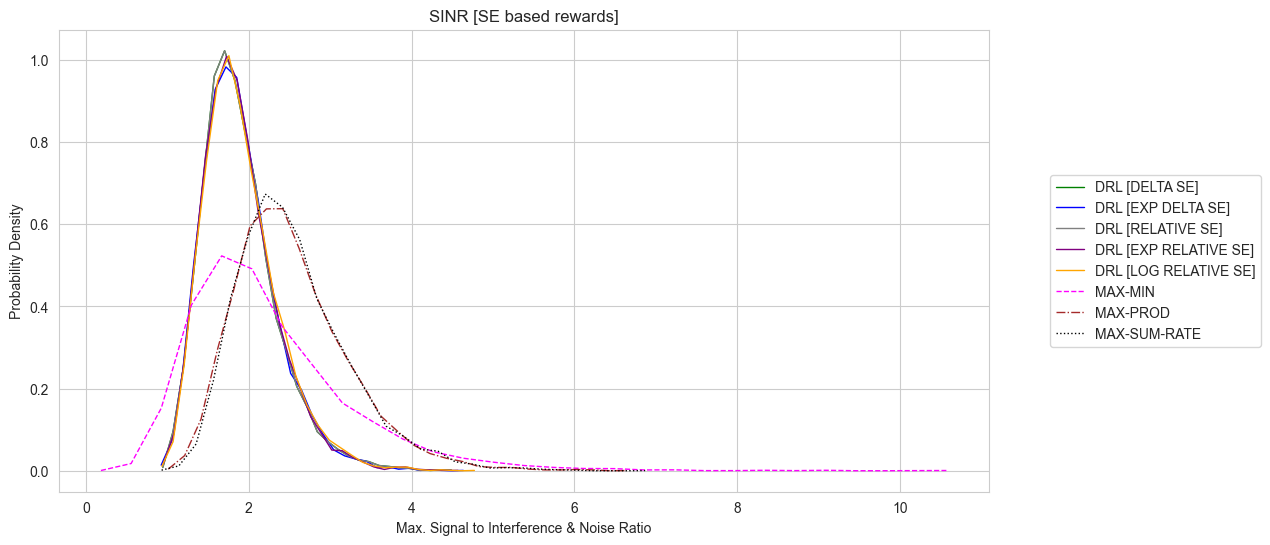

In [88]:
plot_cdf_pdf(data=SINR_DATA_R_SE, title='SINR [SE based rewards]', xlabel='Max. Signal to Interference & Noise Ratio', operation='max', cumulative=False)

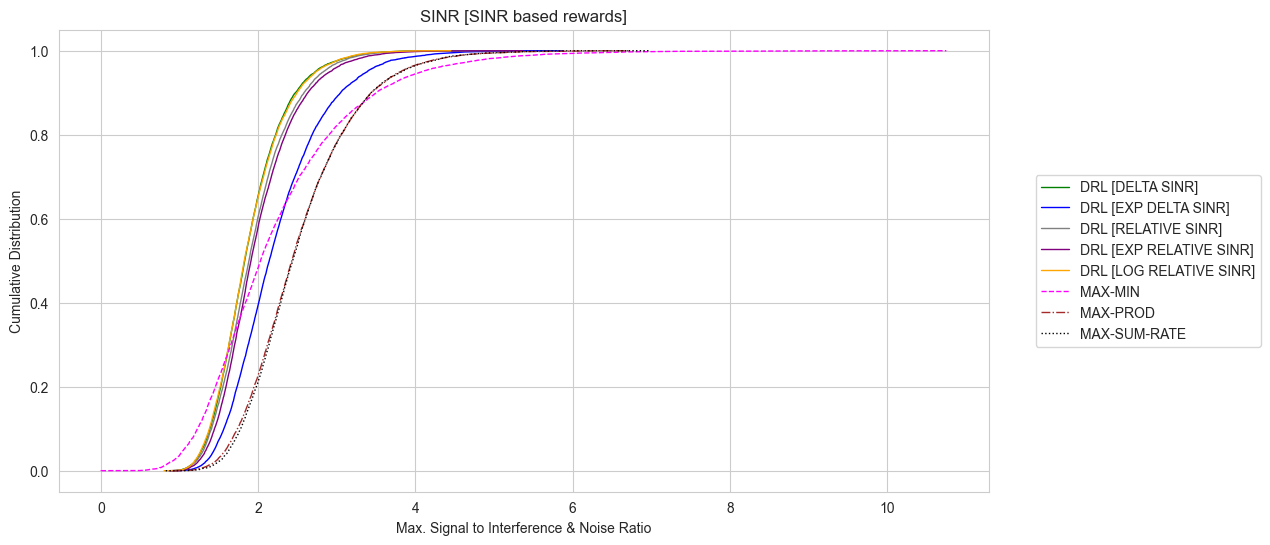

In [89]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='SINR [SINR based rewards]', xlabel='Max. Signal to Interference & Noise Ratio', operation='max', cumulative=True)

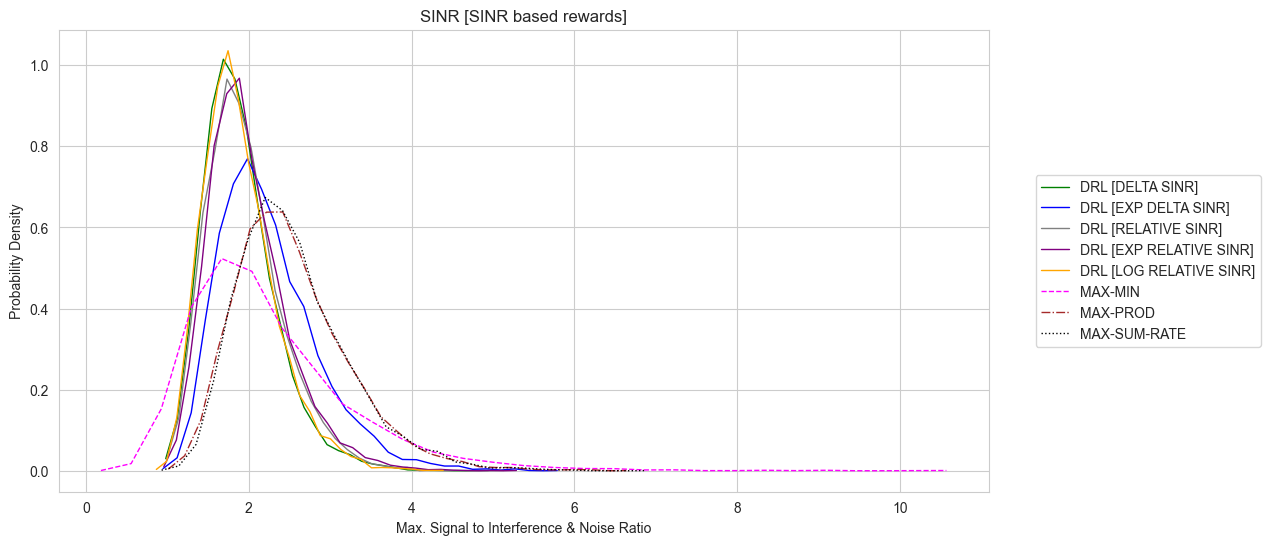

In [90]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='SINR [SINR based rewards]', xlabel='Max. Signal to Interference & Noise Ratio', operation='max', cumulative=False)

## CDF Comparison

#### SE based reward

In [91]:
compare_models(SINR_DATA_R_SE, operation=None, data_label='SINR')

Label Average SINR  \
MODEL_DELTA_SE_SINRs                     DRL [DELTA SE]     0.813664   
MODEL_EXP_DELTA_CLIP_SE_SINRs        DRL [EXP DELTA SE]     0.814904   
MODEL_RELATIVE_SE_SINRs               DRL [RELATIVE SE]     0.813664   
MODEL_EXP_RELATIVE_CLIP_SE_SINRs  DRL [EXP RELATIVE SE]     0.813935   
MODEL_LOG_RELATIVE_SE_SINRs       DRL [LOG RELATIVE SE]     0.813377   
MAXMIN_SINRs                                    MAX-MIN     0.404302   
MAXPROD_SINRs                                  MAX-PROD     0.724485   
SUMRATE_SINRs                              MAX-SUM-RATE     0.739011   

                                   Max SINR Standard Deviation  \
MODEL_DELTA_SE_SINRs               4.550825            0.39408   
MODEL_EXP_DELTA_CLIP_SE_SINRs      4.701731           0.394608   
MODEL_RELATIVE_SE_SINRs            4.550825            0.39408   
MODEL_EXP_RELATIVE_CLIP_SE_SINRs   4.635325           0.394149   
MODEL_LOG_RELATIVE_SE_SINRs            4.84           0.397997   
MAXMIN_SINRs                      10.753083           0.523557   
MAXPROD_SINRs                       6.73814           0.614375   
SUMRATE_SINRs                      6.974748           0.632743   

                                 25th Percentile 50th Percentile  \
MODEL_DELTA_SE_SINRs                    0.528793         0.75556   
MODEL_EXP_DELTA_CLIP_SE_SINRs               0.53        0.756916   
MODEL_RELATIVE_SE_SINRs                 0.528793         0.75556   
MODEL_EXP_RELATIVE_CLIP_SE_SINRs        0.529408        0.756529   
MODEL_LOG_RELATIVE_SE_SINRs             0.527325        0.754324   
MAXMIN_SINRs                            0.100093        0.234896   
MAXPROD_SINRs                           0.270609        0.573958   
SUMRATE_SINRs                           0.257884        0.598592   

                                 75th Percentile  
MODEL_DELTA_SE_SINRs                    1.005862  
MODEL_EXP_DELTA_CLIP_SE_SINRs           1.006169  
MODEL_RELATIVE_SE_SINRs                 1.005862  
MODEL_EXP_RELATIVE_CLIP_SE_SINRs        1.005199  
MODEL_LOG_RELATIVE_SE_SINRs              1.00509  
MAXMIN_SINRs                            0.488756  
MAXPROD_SINRs                           0.982938  
SUMRATE_SINRs                           1.024495

In [92]:
# Kolmogorov-Smirnov Test
ks_results_r_se = compare_cdfs_ks(SINR_DATA_R_SE, operation=None)

In [93]:
ks_results_r_se['Best Model']

Criteria             Best Model
0       KS Statistic         DRL [DELTA SE]
1            P-Value         DRL [DELTA SE]
2  Area Between CDFs  DRL [LOG RELATIVE SE]

In [94]:
ks_results_r_se['Details']

Model1                 Model2  KS Statistic        P-Value  \
0          DRL [DELTA SE]     DRL [EXP DELTA SE]      0.001794   6.812404e-01   
1          DRL [DELTA SE]      DRL [RELATIVE SE]      0.000000   1.000000e+00   
2          DRL [DELTA SE]  DRL [EXP RELATIVE SE]      0.001519   8.536306e-01   
3          DRL [DELTA SE]  DRL [LOG RELATIVE SE]      0.004006   1.173068e-02   
4          DRL [DELTA SE]                MAX-MIN      0.575772   0.000000e+00   
5          DRL [DELTA SE]               MAX-PROD      0.255325   0.000000e+00   
6          DRL [DELTA SE]           MAX-SUM-RATE      0.252925   0.000000e+00   
7      DRL [EXP DELTA SE]      DRL [RELATIVE SE]      0.001794   6.812404e-01   
8      DRL [EXP DELTA SE]  DRL [EXP RELATIVE SE]      0.002213   4.131784e-01   
9      DRL [EXP DELTA SE]  DRL [LOG RELATIVE SE]      0.004581   2.415035e-03   
10     DRL [EXP DELTA SE]                MAX-MIN      0.576294   0.000000e+00   
11     DRL [EXP DELTA SE]               MAX-PROD      0.255766   0.000000e+00   
12     DRL [EXP DELTA SE]           MAX-SUM-RATE      0.253244   0.000000e+00   
13      DRL [RELATIVE SE]  DRL [EXP RELATIVE SE]      0.001519   8.536306e-01   
14      DRL [RELATIVE SE]  DRL [LOG RELATIVE SE]      0.004006   1.173068e-02   
15      DRL [RELATIVE SE]                MAX-MIN      0.575772   0.000000e+00   
16      DRL [RELATIVE SE]               MAX-PROD      0.255325   0.000000e+00   
17      DRL [RELATIVE SE]           MAX-SUM-RATE      0.252925   0.000000e+00   
18  DRL [EXP RELATIVE SE]  DRL [LOG RELATIVE SE]      0.004294   5.465259e-03   
19  DRL [EXP RELATIVE SE]                MAX-MIN      0.576522   0.000000e+00   
20  DRL [EXP RELATIVE SE]               MAX-PROD      0.256072   0.000000e+00   
21  DRL [EXP RELATIVE SE]           MAX-SUM-RATE      0.253375   0.000000e+00   
22  DRL [LOG RELATIVE SE]                MAX-MIN      0.572831   0.000000e+00   
23  DRL [LOG RELATIVE SE]               MAX-PROD      0.252384   0.000000e+00   
24  DRL [LOG RELATIVE SE]           MAX-SUM-RATE      0.249950   0.000000e+00   
25                MAX-MIN               MAX-PROD      0.320769   0.000000e+00   
26                MAX-MIN           MAX-SUM-RATE      0.327053   0.000000e+00   
27               MAX-PROD           MAX-SUM-RATE      0.031650  1.115407e-139   

    Area Between CDFs  
0            0.001388  
1            0.000000  
2            0.000954  
3            0.002760  
4            0.436999  
5            0.206386  
6            0.211676  
7            0.001388  
8            0.001109  
9            0.002861  
10           0.438131  
11           0.206344  
12           0.211593  
13           0.000954  
14           0.002760  
15           0.436999  
16           0.206386  
17           0.211676  
18           0.002874  
19           0.437206  
20           0.206509  
21           0.211839  
22           0.435632  
23           0.203649  
24           0.208990  
25           0.322767  
26           0.337568  
27           0.028449

In [95]:
# Earth Mover's Distance
emd_results_r_se = compare_cdfs_emd(SINR_DATA_R_SE, operation=None)

In [96]:
emd_results_r_se['Ranked Models']

Model  Average EMD
0  DRL [LOG RELATIVE SE]     0.122792
1         DRL [DELTA SE]     0.122883
2      DRL [RELATIVE SE]     0.122883
3  DRL [EXP RELATIVE SE]     0.123066
4     DRL [EXP DELTA SE]     0.123262
5               MAX-PROD     0.197231
6           MAX-SUM-RATE     0.203127
7                MAX-MIN     0.406507

In [97]:
emd_results_r_se['Details']

Model1                 Model2  EMD Value
0          DRL [DELTA SE]     DRL [EXP DELTA SE]   0.001388
1          DRL [DELTA SE]      DRL [RELATIVE SE]   0.000000
2          DRL [DELTA SE]  DRL [EXP RELATIVE SE]   0.000954
3          DRL [DELTA SE]  DRL [LOG RELATIVE SE]   0.002760
4          DRL [DELTA SE]                MAX-MIN   0.437008
5          DRL [DELTA SE]               MAX-PROD   0.206389
6          DRL [DELTA SE]           MAX-SUM-RATE   0.211679
7      DRL [EXP DELTA SE]      DRL [RELATIVE SE]   0.001388
8      DRL [EXP DELTA SE]  DRL [EXP RELATIVE SE]   0.001109
9      DRL [EXP DELTA SE]  DRL [LOG RELATIVE SE]   0.002861
10     DRL [EXP DELTA SE]                MAX-MIN   0.438141
11     DRL [EXP DELTA SE]               MAX-PROD   0.206347
12     DRL [EXP DELTA SE]           MAX-SUM-RATE   0.211597
13      DRL [RELATIVE SE]  DRL [EXP RELATIVE SE]   0.000954
14      DRL [RELATIVE SE]  DRL [LOG RELATIVE SE]   0.002760
15      DRL [RELATIVE SE]                MAX-MIN   0.437008
16      DRL [RELATIVE SE]               MAX-PROD   0.206389
17      DRL [RELATIVE SE]           MAX-SUM-RATE   0.211679
18  DRL [EXP RELATIVE SE]  DRL [LOG RELATIVE SE]   0.002874
19  DRL [EXP RELATIVE SE]                MAX-MIN   0.437216
20  DRL [EXP RELATIVE SE]               MAX-PROD   0.206512
21  DRL [EXP RELATIVE SE]           MAX-SUM-RATE   0.211842
22  DRL [LOG RELATIVE SE]                MAX-MIN   0.435641
23  DRL [LOG RELATIVE SE]               MAX-PROD   0.203652
24  DRL [LOG RELATIVE SE]           MAX-SUM-RATE   0.208993
25                MAX-MIN               MAX-PROD   0.322880
26                MAX-MIN           MAX-SUM-RATE   0.337653
27               MAX-PROD           MAX-SUM-RATE   0.028444

In [98]:
moments_r_se = compare_cdfs_moments(SINR_DATA_R_SE, operation=None, criteria='kurtosis')

In [99]:
moments_r_se['Ranked Models']

Model  Rank
1     MODEL_EXP_DELTA_CLIP_SE_SINRs     1
3  MODEL_EXP_RELATIVE_CLIP_SE_SINRs     2
0              MODEL_DELTA_SE_SINRs     3
2           MODEL_RELATIVE_SE_SINRs     4
4       MODEL_LOG_RELATIVE_SE_SINRs     5
7                     SUMRATE_SINRs     6
6                     MAXPROD_SINRs     7
5                      MAXMIN_SINRs     8

In [100]:
moments_r_se['Details']

Model      Mean  Variance  Skewness   Kurtosis
0              MODEL_DELTA_SE_SINRs  0.813664  0.155299  1.302784   3.329465
1     MODEL_EXP_DELTA_CLIP_SE_SINRs  0.814904  0.155715  1.291191   3.200984
2           MODEL_RELATIVE_SE_SINRs  0.813664  0.155299  1.302784   3.329465
3  MODEL_EXP_RELATIVE_CLIP_SE_SINRs  0.813935  0.155354  1.298830   3.281297
4       MODEL_LOG_RELATIVE_SE_SINRs  0.813377  0.158402  1.320571   3.388540
5                      MAXMIN_SINRs  0.404302  0.274112  3.513964  20.417200
6                     MAXPROD_SINRs  0.724485  0.377457  1.674263   4.149753
7                     SUMRATE_SINRs  0.739011  0.400363  1.515867   3.415945

In [101]:
calculate_and_rank_percentiles(SINR_DATA_R_SE, [50, 75])

Model  50th Percentile  75th Percentile  Rank
7           MAX-SUM-RATE         0.598592         1.024495     1
1     DRL [EXP DELTA SE]         0.756916         1.006169     2
0         DRL [DELTA SE]         0.755560         1.005862     3
2      DRL [RELATIVE SE]         0.755560         1.005862     3
3  DRL [EXP RELATIVE SE]         0.756529         1.005199     5
4  DRL [LOG RELATIVE SE]         0.754324         1.005090     6
6               MAX-PROD         0.573958         0.982938     7
5                MAX-MIN         0.234896         0.488756     8

#### SINR based reward

In [102]:
compare_models(SINR_DATA_R_SINR, operation=None, data_label='SINR')

Label Average SINR  \
MODEL_DELTA_SINR_SINRs                     DRL [DELTA SINR]     0.813159   
MODEL_EXP_DELTA_CLIP_SINR_SINRs        DRL [EXP DELTA SINR]     0.726418   
MODEL_RELATIVE_SINR_SINRs               DRL [RELATIVE SINR]     0.810078   
MODEL_EXP_RELATIVE_CLIP_SINR_SINRs  DRL [EXP RELATIVE SINR]     0.796821   
MODEL_LOG_RELATIVE_SINR_SINRs       DRL [LOG RELATIVE SINR]     0.813347   
MAXMIN_SINRs                                        MAX-MIN     0.404302   
MAXPROD_SINRs                                      MAX-PROD     0.724485   
SUMRATE_SINRs                                  MAX-SUM-RATE     0.739011   

                                     Max SINR Standard Deviation  \
MODEL_DELTA_SINR_SINRs               5.014465            0.39408   
MODEL_EXP_DELTA_CLIP_SINR_SINRs      5.874649           0.554825   
MODEL_RELATIVE_SINR_SINRs            5.205597           0.413822   
MODEL_EXP_RELATIVE_CLIP_SINR_SINRs   5.364919           0.434708   
MODEL_LOG_RELATIVE_SINR_SINRs        4.451155           0.394092   
MAXMIN_SINRs                        10.753083           0.523557   
MAXPROD_SINRs                         6.73814           0.614375   
SUMRATE_SINRs                        6.974748           0.632743   

                                   25th Percentile 50th Percentile  \
MODEL_DELTA_SINR_SINRs                    0.528499        0.754242   
MODEL_EXP_DELTA_CLIP_SINR_SINRs           0.298957        0.652573   
MODEL_RELATIVE_SINR_SINRs                 0.515228        0.750244   
MODEL_EXP_RELATIVE_CLIP_SINR_SINRs        0.488733        0.736959   
MODEL_LOG_RELATIVE_SINR_SINRs             0.529032        0.755569   
MAXMIN_SINRs                              0.100093        0.234896   
MAXPROD_SINRs                             0.270609        0.573958   
SUMRATE_SINRs                             0.257884        0.598592   

                                   75th Percentile  
MODEL_DELTA_SINR_SINRs                    1.004734  
MODEL_EXP_DELTA_CLIP_SINR_SINRs           1.007826  
MODEL_RELATIVE_SINR_SINRs                 1.007334  
MODEL_EXP_RELATIVE_CLIP_SINR_SINRs        1.007614  
MODEL_LOG_RELATIVE_SINR_SINRs             1.004518  
MAXMIN_SINRs                              0.488756  
MAXPROD_SINRs                             0.982938  
SUMRATE_SINRs                             1.024495

In [103]:
# Kolmogorov-Smirnov Test
ks_results_r_sinr = compare_cdfs_ks(SINR_DATA_R_SINR, operation=None)

In [104]:
ks_results_r_sinr['Details']

Model1                   Model2  KS Statistic  \
0          DRL [DELTA SINR]     DRL [EXP DELTA SINR]      0.214581   
1          DRL [DELTA SINR]      DRL [RELATIVE SINR]      0.022241   
2          DRL [DELTA SINR]  DRL [EXP RELATIVE SINR]      0.053681   
3          DRL [DELTA SINR]  DRL [LOG RELATIVE SINR]      0.001600   
4          DRL [DELTA SINR]                  MAX-MIN      0.576212   
5          DRL [DELTA SINR]                 MAX-PROD      0.255769   
6          DRL [DELTA SINR]             MAX-SUM-RATE      0.253334   
7      DRL [EXP DELTA SINR]      DRL [RELATIVE SINR]      0.195481   
8      DRL [EXP DELTA SINR]  DRL [EXP RELATIVE SINR]      0.164400   
9      DRL [EXP DELTA SINR]  DRL [LOG RELATIVE SINR]      0.214681   
10     DRL [EXP DELTA SINR]                  MAX-MIN      0.367669   
11     DRL [EXP DELTA SINR]                 MAX-PROD      0.055316   
12     DRL [EXP DELTA SINR]             MAX-SUM-RATE      0.041400   
13      DRL [RELATIVE SINR]  DRL [EXP RELATIVE SINR]      0.032500   
14      DRL [RELATIVE SINR]  DRL [LOG RELATIVE SINR]      0.022809   
15      DRL [RELATIVE SINR]                  MAX-MIN      0.555622   
16      DRL [RELATIVE SINR]                 MAX-PROD      0.235144   
17      DRL [RELATIVE SINR]             MAX-SUM-RATE      0.234028   
18  DRL [EXP RELATIVE SINR]  DRL [LOG RELATIVE SINR]      0.054175   
19  DRL [EXP RELATIVE SINR]                  MAX-MIN      0.523375   
20  DRL [EXP RELATIVE SINR]                 MAX-PROD      0.202897   
21  DRL [EXP RELATIVE SINR]             MAX-SUM-RATE      0.201934   
22  DRL [LOG RELATIVE SINR]                  MAX-MIN      0.576459   
23  DRL [LOG RELATIVE SINR]                 MAX-PROD      0.256025   
24  DRL [LOG RELATIVE SINR]             MAX-SUM-RATE      0.253328   
25                  MAX-MIN                 MAX-PROD      0.320769   
26                  MAX-MIN             MAX-SUM-RATE      0.327053   
27                 MAX-PROD             MAX-SUM-RATE      0.031650   

          P-Value  Area Between CDFs  
0    0.000000e+00           0.150952  
1    3.500750e-69           0.014038  
2    0.000000e+00           0.034088  
3    8.066931e-01           0.001069  
4    0.000000e+00           0.436516  
5    0.000000e+00           0.205872  
6    0.000000e+00           0.211252  
7    0.000000e+00           0.137029  
8    0.000000e+00           0.116913  
9    0.000000e+00           0.151389  
10   0.000000e+00           0.330870  
11   0.000000e+00           0.064500  
12  1.005269e-238           0.061089  
13  2.922884e-147           0.020113  
14   9.602272e-73           0.014525  
15   0.000000e+00           0.429314  
16   0.000000e+00           0.192126  
17   0.000000e+00           0.197287  
18   0.000000e+00           0.034582  
19   0.000000e+00           0.413946  
20   0.000000e+00           0.172075  
21   0.000000e+00           0.177179  
22   0.000000e+00           0.436435  
23   0.000000e+00           0.206357  
24   0.000000e+00           0.211746  
25   0.000000e+00           0.322767  
26   0.000000e+00           0.337568  
27  1.115407e-139           0.028449

In [105]:
ks_results_r_sinr['Details']

Model1                   Model2  KS Statistic  \
0          DRL [DELTA SINR]     DRL [EXP DELTA SINR]      0.214581   
1          DRL [DELTA SINR]      DRL [RELATIVE SINR]      0.022241   
2          DRL [DELTA SINR]  DRL [EXP RELATIVE SINR]      0.053681   
3          DRL [DELTA SINR]  DRL [LOG RELATIVE SINR]      0.001600   
4          DRL [DELTA SINR]                  MAX-MIN      0.576212   
5          DRL [DELTA SINR]                 MAX-PROD      0.255769   
6          DRL [DELTA SINR]             MAX-SUM-RATE      0.253334   
7      DRL [EXP DELTA SINR]      DRL [RELATIVE SINR]      0.195481   
8      DRL [EXP DELTA SINR]  DRL [EXP RELATIVE SINR]      0.164400   
9      DRL [EXP DELTA SINR]  DRL [LOG RELATIVE SINR]      0.214681   
10     DRL [EXP DELTA SINR]                  MAX-MIN      0.367669   
11     DRL [EXP DELTA SINR]                 MAX-PROD      0.055316   
12     DRL [EXP DELTA SINR]             MAX-SUM-RATE      0.041400   
13      DRL [RELATIVE SINR]  DRL [EXP RELATIVE SINR]      0.032500   
14      DRL [RELATIVE SINR]  DRL [LOG RELATIVE SINR]      0.022809   
15      DRL [RELATIVE SINR]                  MAX-MIN      0.555622   
16      DRL [RELATIVE SINR]                 MAX-PROD      0.235144   
17      DRL [RELATIVE SINR]             MAX-SUM-RATE      0.234028   
18  DRL [EXP RELATIVE SINR]  DRL [LOG RELATIVE SINR]      0.054175   
19  DRL [EXP RELATIVE SINR]                  MAX-MIN      0.523375   
20  DRL [EXP RELATIVE SINR]                 MAX-PROD      0.202897   
21  DRL [EXP RELATIVE SINR]             MAX-SUM-RATE      0.201934   
22  DRL [LOG RELATIVE SINR]                  MAX-MIN      0.576459   
23  DRL [LOG RELATIVE SINR]                 MAX-PROD      0.256025   
24  DRL [LOG RELATIVE SINR]             MAX-SUM-RATE      0.253328   
25                  MAX-MIN                 MAX-PROD      0.320769   
26                  MAX-MIN             MAX-SUM-RATE      0.327053   
27                 MAX-PROD             MAX-SUM-RATE      0.031650   

          P-Value  Area Between CDFs  
0    0.000000e+00           0.150952  
1    3.500750e-69           0.014038  
2    0.000000e+00           0.034088  
3    8.066931e-01           0.001069  
4    0.000000e+00           0.436516  
5    0.000000e+00           0.205872  
6    0.000000e+00           0.211252  
7    0.000000e+00           0.137029  
8    0.000000e+00           0.116913  
9    0.000000e+00           0.151389  
10   0.000000e+00           0.330870  
11   0.000000e+00           0.064500  
12  1.005269e-238           0.061089  
13  2.922884e-147           0.020113  
14   9.602272e-73           0.014525  
15   0.000000e+00           0.429314  
16   0.000000e+00           0.192126  
17   0.000000e+00           0.197287  
18   0.000000e+00           0.034582  
19   0.000000e+00           0.413946  
20   0.000000e+00           0.172075  
21   0.000000e+00           0.177179  
22   0.000000e+00           0.436435  
23   0.000000e+00           0.206357  
24   0.000000e+00           0.211746  
25   0.000000e+00           0.322767  
26   0.000000e+00           0.337568  
27  1.115407e-139           0.028449

In [106]:
# Earth Mover's Distance
emd_results_r_sinr = compare_cdfs_emd(SINR_DATA_R_SINR, operation=None)

In [107]:
emd_results_r_sinr['Ranked Models']

Model  Average EMD
0  DRL [EXP RELATIVE SINR]     0.138417
1      DRL [RELATIVE SINR]     0.143492
2     DRL [EXP DELTA SINR]     0.144687
3         DRL [DELTA SINR]     0.150544
4  DRL [LOG RELATIVE SINR]     0.150884
5                 MAX-PROD     0.170324
6             MAX-SUM-RATE     0.174952
7                  MAX-MIN     0.386808

In [108]:
emd_results_r_sinr['Details']

Model1                   Model2  EMD Value
0          DRL [DELTA SINR]     DRL [EXP DELTA SINR]   0.150954
1          DRL [DELTA SINR]      DRL [RELATIVE SINR]   0.014038
2          DRL [DELTA SINR]  DRL [EXP RELATIVE SINR]   0.034089
3          DRL [DELTA SINR]  DRL [LOG RELATIVE SINR]   0.001071
4          DRL [DELTA SINR]                  MAX-MIN   0.436525
5          DRL [DELTA SINR]                 MAX-PROD   0.205874
6          DRL [DELTA SINR]             MAX-SUM-RATE   0.211255
7      DRL [EXP DELTA SINR]      DRL [RELATIVE SINR]   0.137023
8      DRL [EXP DELTA SINR]  DRL [EXP RELATIVE SINR]   0.116913
9      DRL [EXP DELTA SINR]  DRL [LOG RELATIVE SINR]   0.151445
10     DRL [EXP DELTA SINR]                  MAX-MIN   0.330877
11     DRL [EXP DELTA SINR]                 MAX-PROD   0.064502
12     DRL [EXP DELTA SINR]             MAX-SUM-RATE   0.061091
13      DRL [RELATIVE SINR]  DRL [EXP RELATIVE SINR]   0.020113
14      DRL [RELATIVE SINR]  DRL [LOG RELATIVE SINR]   0.014528
15      DRL [RELATIVE SINR]                  MAX-MIN   0.429322
16      DRL [RELATIVE SINR]                 MAX-PROD   0.192128
17      DRL [RELATIVE SINR]             MAX-SUM-RATE   0.197290
18  DRL [EXP RELATIVE SINR]  DRL [LOG RELATIVE SINR]   0.034588
19  DRL [EXP RELATIVE SINR]                  MAX-MIN   0.413954
20  DRL [EXP RELATIVE SINR]                 MAX-PROD   0.172078
21  DRL [EXP RELATIVE SINR]             MAX-SUM-RATE   0.177181
22  DRL [LOG RELATIVE SINR]                  MAX-MIN   0.436445
23  DRL [LOG RELATIVE SINR]                 MAX-PROD   0.206361
24  DRL [LOG RELATIVE SINR]             MAX-SUM-RATE   0.211750
25                  MAX-MIN                 MAX-PROD   0.322880
26                  MAX-MIN             MAX-SUM-RATE   0.337653
27                 MAX-PROD             MAX-SUM-RATE   0.028444

In [109]:
moments_r_sinr = compare_cdfs_moments(SINR_DATA_R_SINR, operation=None, criteria='kurtosis')

In [110]:
moments_r_sinr['Ranked Models']

Model  Rank
1     MODEL_EXP_DELTA_CLIP_SINR_SINRs     1
3  MODEL_EXP_RELATIVE_CLIP_SINR_SINRs     2
4       MODEL_LOG_RELATIVE_SINR_SINRs     3
2           MODEL_RELATIVE_SINR_SINRs     4
0              MODEL_DELTA_SINR_SINRs     5
7                       SUMRATE_SINRs     6
6                       MAXPROD_SINRs     7
5                        MAXMIN_SINRs     8

In [111]:
moments_r_sinr['Details']

Model      Mean  Variance  Skewness   Kurtosis
0              MODEL_DELTA_SINR_SINRs  0.813159  0.155299  1.300124   3.252506
1     MODEL_EXP_DELTA_CLIP_SINR_SINRs  0.726418  0.307831  1.268109   2.916033
2           MODEL_RELATIVE_SINR_SINRs  0.810078  0.171249  1.302143   3.242593
3  MODEL_EXP_RELATIVE_CLIP_SINR_SINRs  0.796821  0.188971  1.260976   3.192352
4       MODEL_LOG_RELATIVE_SINR_SINRs  0.813347  0.155308  1.300686   3.240122
5                        MAXMIN_SINRs  0.404302  0.274112  3.513964  20.417200
6                       MAXPROD_SINRs  0.724485  0.377457  1.674263   4.149753
7                       SUMRATE_SINRs  0.739011  0.400363  1.515867   3.415945

In [112]:
calculate_and_rank_percentiles(SINR_DATA_R_SINR, [50, 75])

Model  50th Percentile  75th Percentile  Rank
7             MAX-SUM-RATE         0.598592         1.024495     1
1     DRL [EXP DELTA SINR]         0.652573         1.007826     2
3  DRL [EXP RELATIVE SINR]         0.736959         1.007614     3
2      DRL [RELATIVE SINR]         0.750244         1.007334     4
0         DRL [DELTA SINR]         0.754242         1.004734     5
4  DRL [LOG RELATIVE SINR]         0.755569         1.004518     6
6                 MAX-PROD         0.573958         0.982938     7
5                  MAX-MIN         0.234896         0.488756     8

## SINR Heatmaps

In [113]:
MODEL_DELTA_SE_SINRs                  = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_SINRs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SE_SINRs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SEv0_SINRs.csv', index_col=0)
# MODEL_LOG_DELTA_SE_SINRs              = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SE_SINRs.csv', index_col=0)

MODEL_RELATIVE_SE_SINRs               = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_SINRs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SE_SINRs      = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SE_SINRs.csv', index_col=0)
MODEL_LOG_RELATIVE_SE_SINRs           = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SE_SINRs.csv', index_col=0)

MODEL_DELTA_SINR_SINRs                = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SINR_SINRs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SINR_SINRs       = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SINR_SINRs.csv', index_col=0)
# MODEL_LOG_DELTA_SINR_SINRs            = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SINR_SINRs.csv', index_col=0)

MODEL_RELATIVE_SINR_SINRs             = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SINR_SINRs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SINR_SINRs    = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_RELATIVE_CLIP_SINR_SINRs.csv', index_col=0)
MODEL_LOG_RELATIVE_SINR_SINRs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SINR_SINRs.csv', index_col=0)

MAXMIN_SINRs  =  pd.read_csv(f'{results_dir}/{results_folder}/MAXMIN_SINRs.csv', index_col=0)
MAXPROD_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/MAXPROD_SINRs.csv', index_col=0)
SUMRATE_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/SUMRATE_SINRs.csv', index_col=0)

UEs_LOCATIONS = pd.read_csv(f'{results_dir}/{results_folder}/UEs_LOCATIONS.csv', index_col=0)
APs_LOCATIONS = pd.read_csv(f'{results_dir}/{results_folder}/APs_LOCATIONS.csv', index_col=0)

In [114]:
grid_size = (100, 100)

In [115]:
vmin = -10
vmax = 5
colorbar_ticks = generate_colorbar_ticks(vmin, vmax, 5)

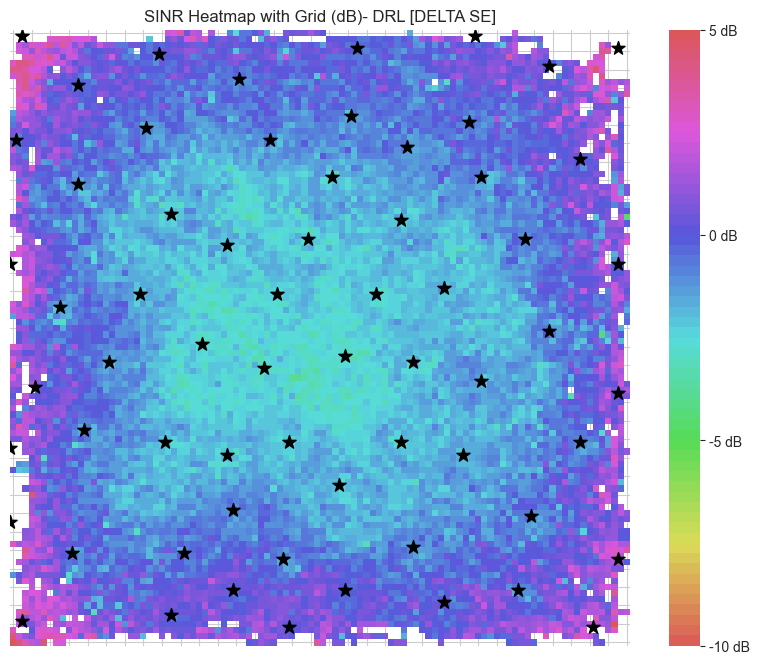

In [116]:
plot_sinr_heatmap(title='DRL [DELTA SE]', sinr_df=MODEL_DELTA_SE_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

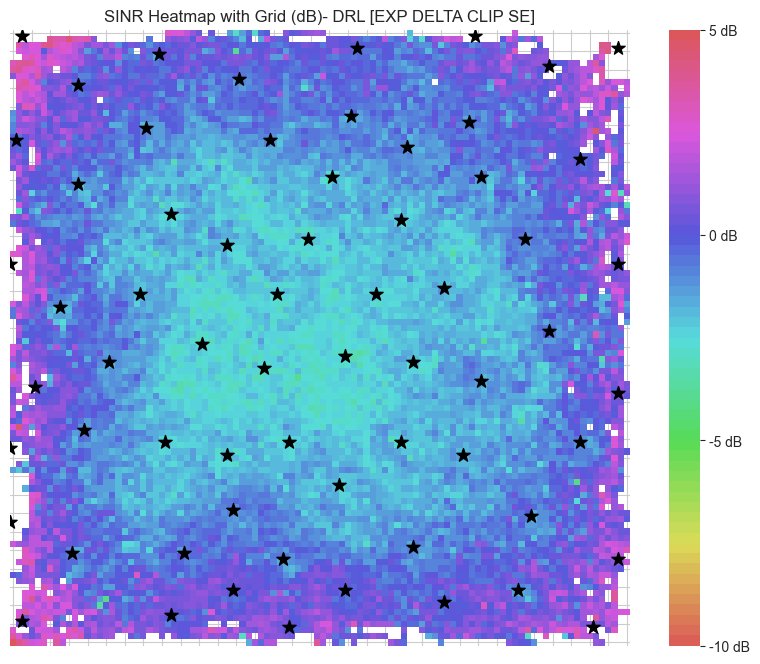

In [117]:
plot_sinr_heatmap(title='DRL [EXP DELTA CLIP SE]', sinr_df=MODEL_EXP_DELTA_CLIP_SE_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

In [118]:
# plot_sinr_heatmap(title='DRL [LOG DELTA SE]', sinr_df=MODEL_LOG_DELTA_SE_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

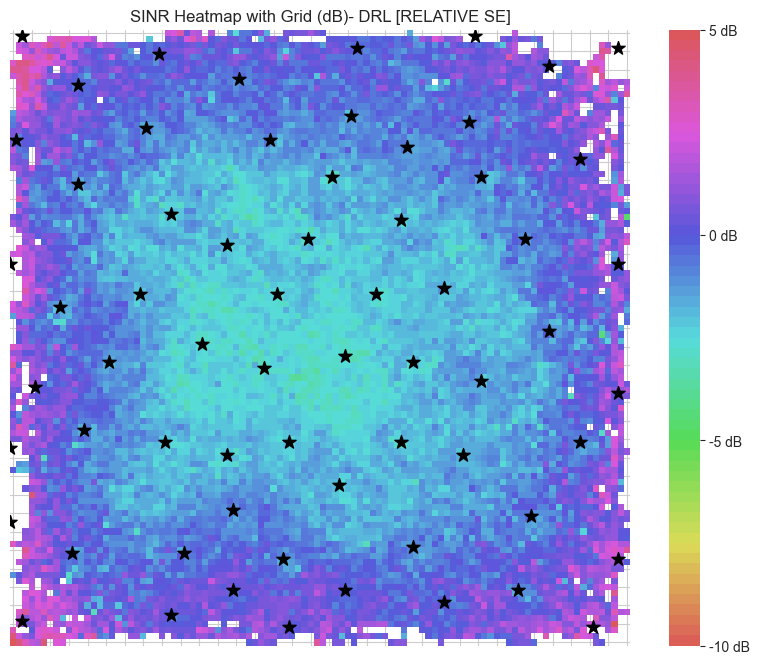

In [119]:
plot_sinr_heatmap(title='DRL [RELATIVE SE]', sinr_df=MODEL_RELATIVE_SE_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

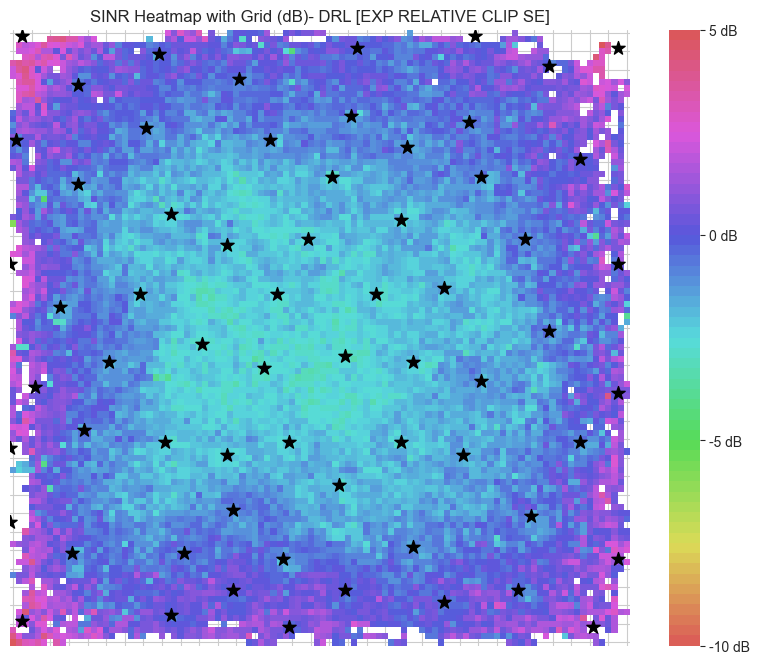

In [120]:
plot_sinr_heatmap(title='DRL [EXP RELATIVE CLIP SE]', sinr_df=MODEL_EXP_RELATIVE_CLIP_SE_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

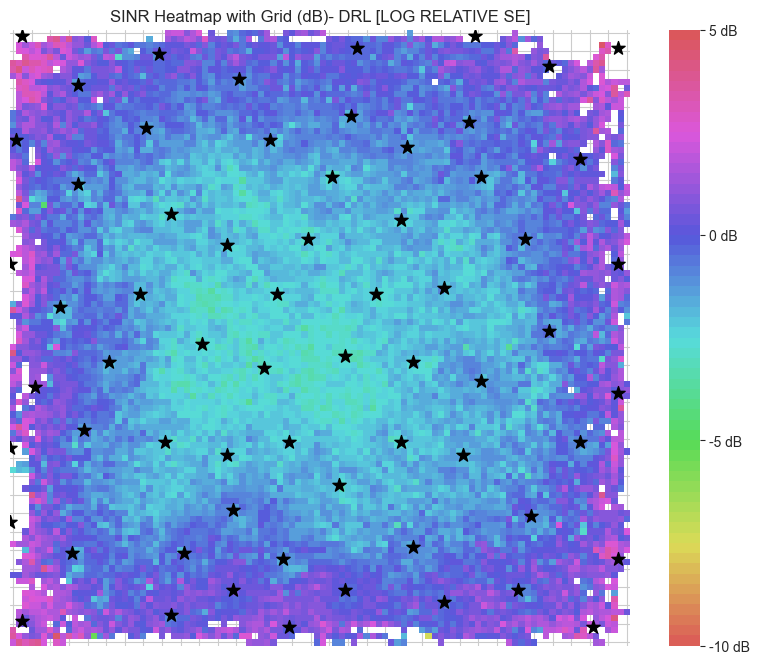

In [121]:
plot_sinr_heatmap(title='DRL [LOG RELATIVE SE]', sinr_df=MODEL_LOG_RELATIVE_SE_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

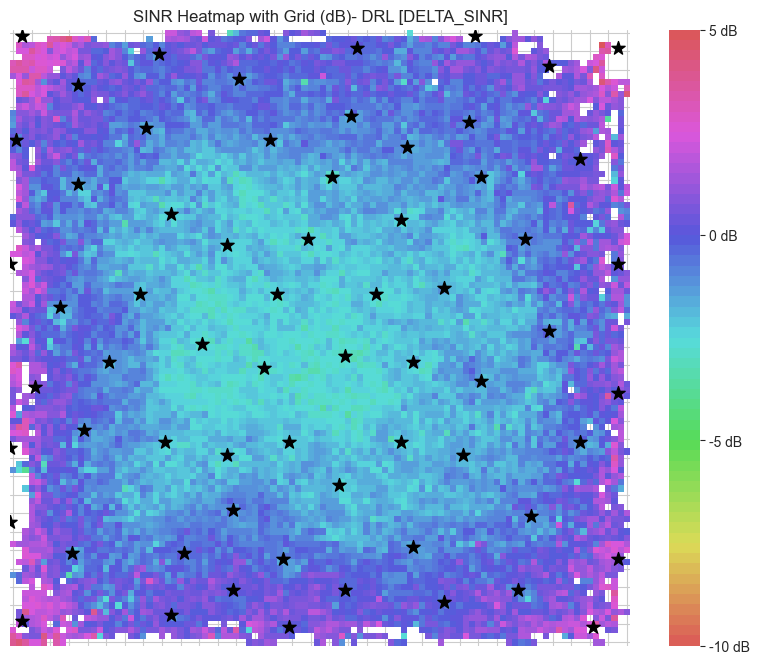

In [122]:
plot_sinr_heatmap(title='DRL [DELTA_SINR]', sinr_df=MODEL_DELTA_SINR_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

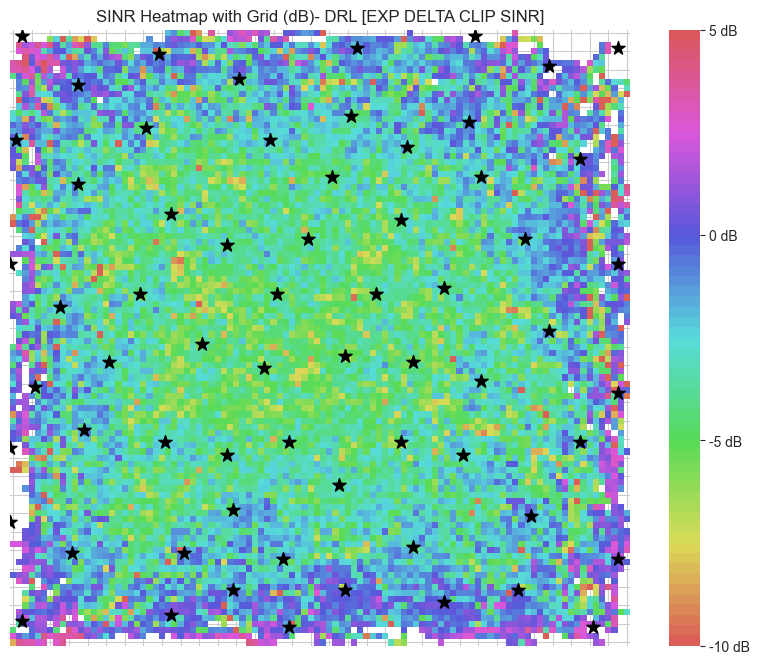

In [123]:
plot_sinr_heatmap(title='DRL [EXP DELTA CLIP SINR]', sinr_df=MODEL_EXP_DELTA_CLIP_SINR_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

In [124]:
# plot_sinr_heatmap(title='DRL [LOG DELTA SINR]', sinr_df=MODEL_LOG_DELTA_SINR_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

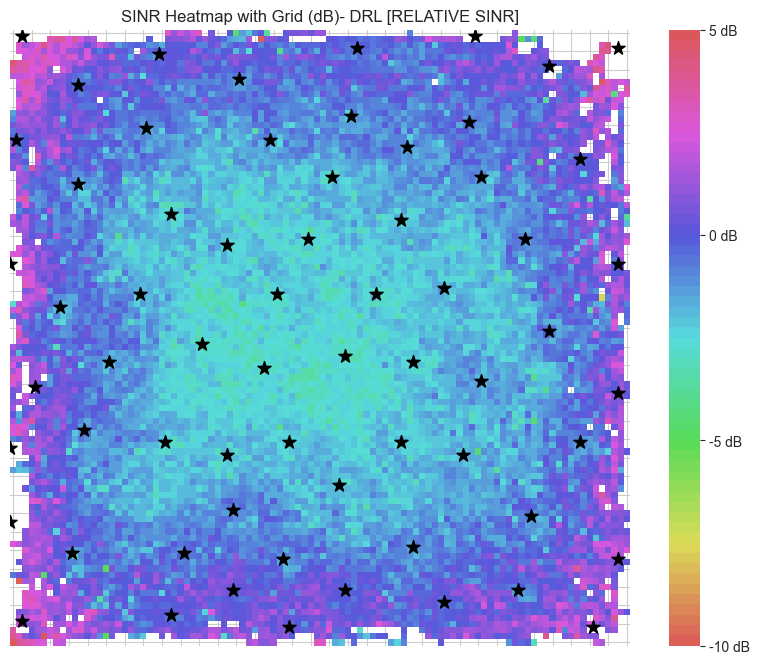

In [125]:
plot_sinr_heatmap(title='DRL [RELATIVE SINR]', sinr_df=MODEL_RELATIVE_SINR_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

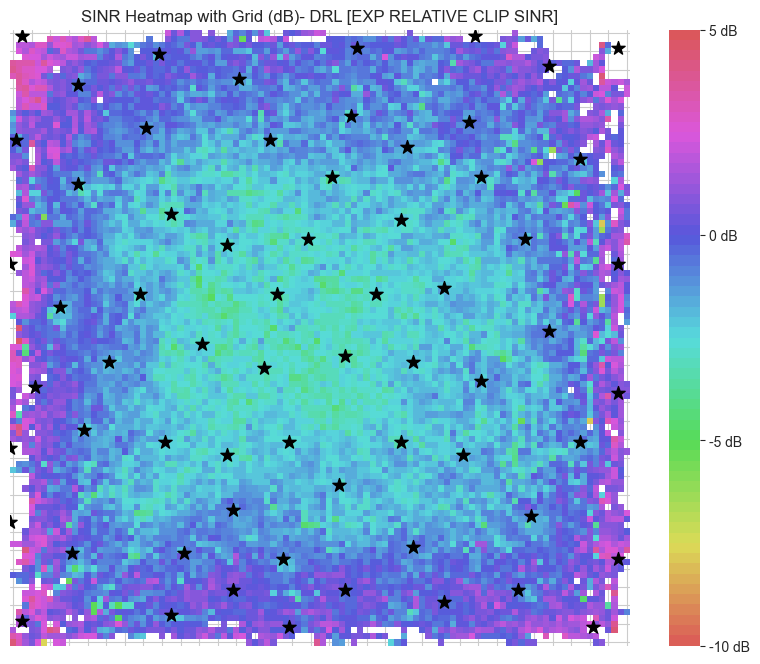

In [126]:
plot_sinr_heatmap(title='DRL [EXP RELATIVE CLIP SINR]', sinr_df=MODEL_EXP_RELATIVE_CLIP_SINR_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

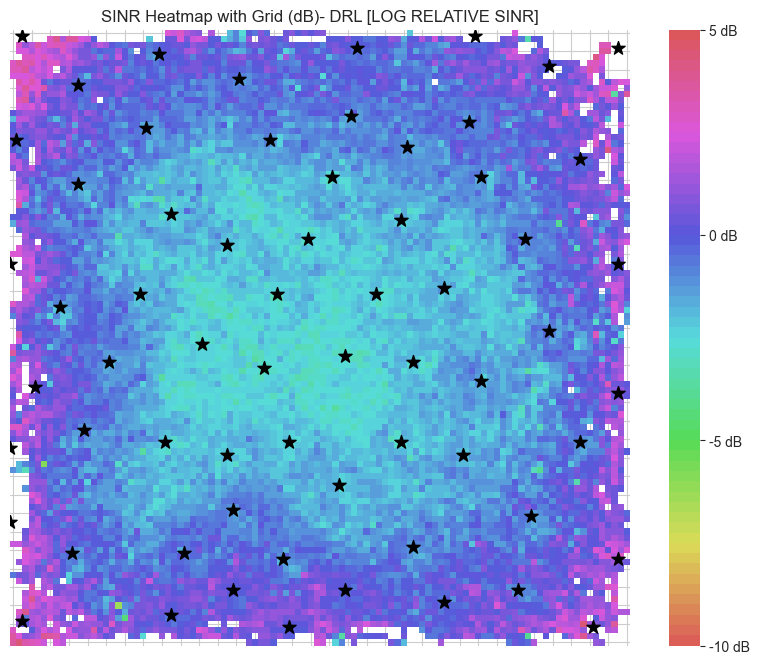

In [127]:
plot_sinr_heatmap(title='DRL [LOG RELATIVE SINR]', sinr_df=MODEL_LOG_RELATIVE_SINR_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

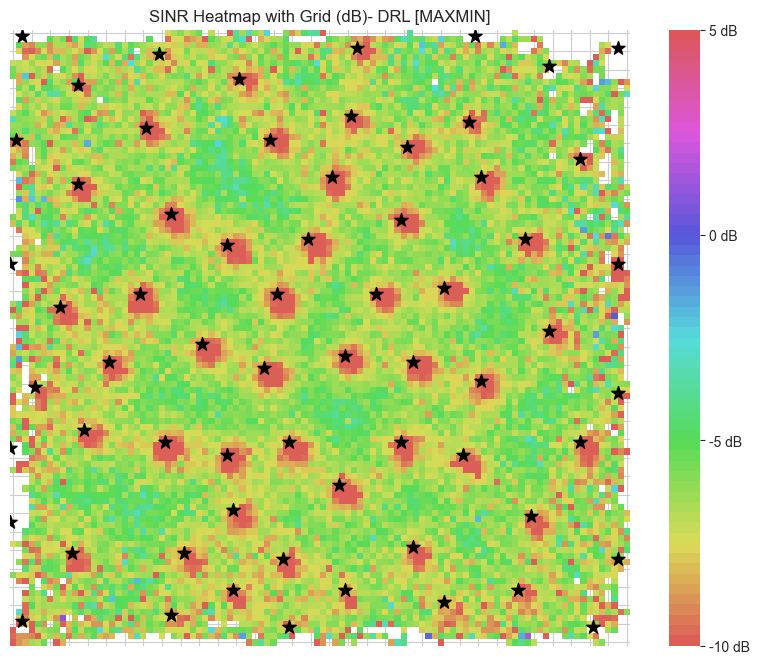

In [128]:
plot_sinr_heatmap(title='DRL [MAXMIN]', sinr_df=MAXMIN_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

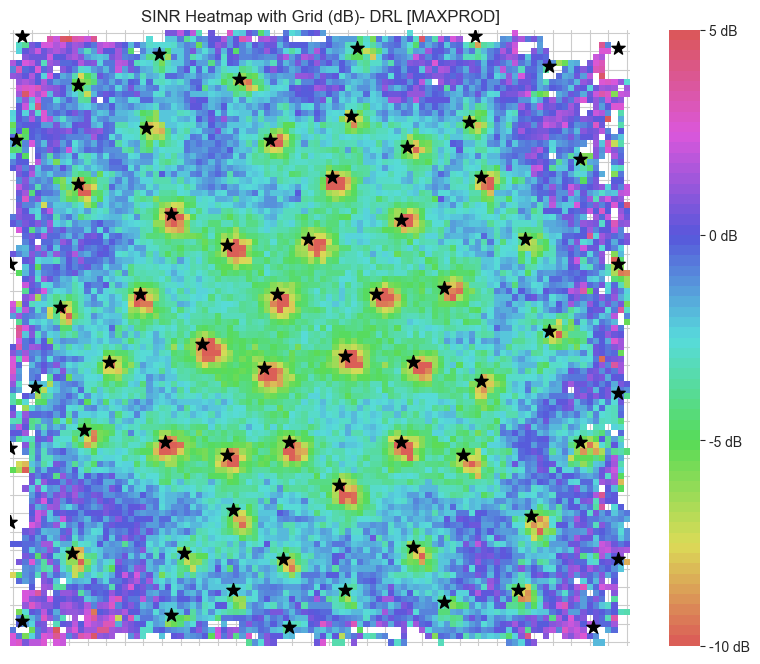

In [129]:
plot_sinr_heatmap(title='DRL [MAXPROD]', sinr_df=MAXPROD_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

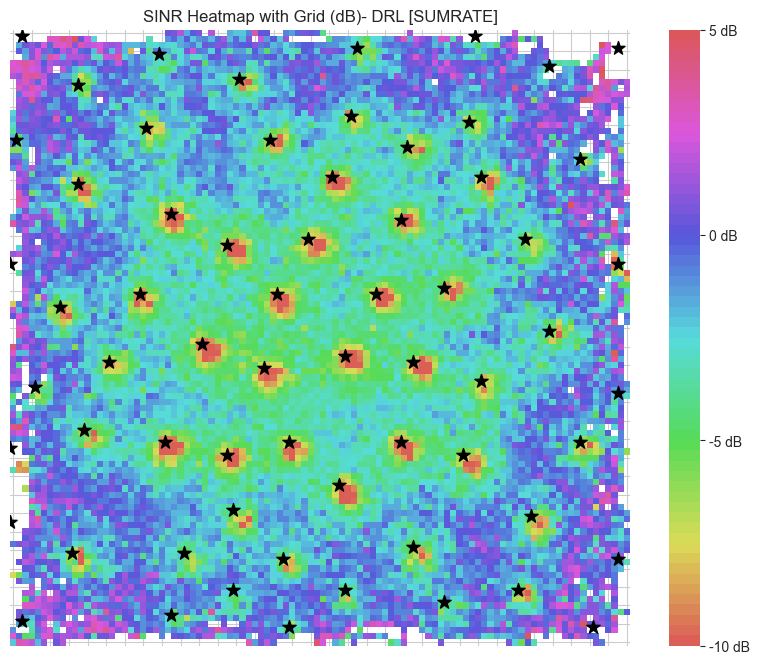

In [130]:
plot_sinr_heatmap(title='DRL [SUMRATE]', sinr_df=SUMRATE_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

## Computational Time

In [131]:
# load data from csv files
MODEL_DELTA_SE_DURATIONs                  = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_DURATIONs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SE_DURATIONs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SEv0_DURATIONs.csv', index_col=0)
# MODEL_LOG_DELTA_SE_DURATIONs              = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SE_DURATIONs.csv', index_col=0)
MODEL_RELATIVE_SE_DURATIONs               = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_DURATIONs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SE_DURATIONs      = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SE_DURATIONs.csv', index_col=0)
MODEL_LOG_RELATIVE_SE_DURATIONs           = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SE_DURATIONs.csv', index_col=0)
MODEL_DELTA_SINR_DURATIONs                = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SINR_DURATIONs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SINR_DURATIONs       = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SINR_DURATIONs.csv', index_col=0)
# MODEL_LOG_DELTA_SINR_DURATIONs            = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SINR_DURATIONs.csv', index_col=0)
MODEL_RELATIVE_SINR_DURATIONs             = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SINR_DURATIONs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SINR_DURATIONs    = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_RELATIVE_CLIP_SINR_DURATIONs.csv', index_col=0)
MODEL_LOG_RELATIVE_SINR_DURATIONs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SINR_DURATIONs.csv', index_col=0)

MAXMIN_DURATIONs  =  pd.read_csv(f'{results_dir}/{results_folder}/MAXMIN_DURATIONs.csv', index_col=0)
MAXPROD_DURATIONs = pd.read_csv(f'{results_dir}/{results_folder}/MAXPROD_DURATIONs.csv', index_col=0)
SUMRATE_DURATIONs = pd.read_csv(f'{results_dir}/{results_folder}/SUMRATE_DURATIONs.csv', index_col=0)

In [132]:
DURATION_DATA = {
    'MODEL_DELTA_SE_DURATIONs':                 {'label': 'DRL [DELTA SE]',             'data': MODEL_DELTA_SE_DURATIONs},
    'MODEL_EXP_DELTA_CLIP_SE_DURATIONs':        {'label': 'DRL [EXP DELTA SE]',         'data': MODEL_EXP_DELTA_CLIP_SE_DURATIONs},
    # 'MODEL_LOG_DELTA_SE_DURATIONs':             {'label': 'DRL [LOG DELTA SE]',         'data': MODEL_LOG_DELTA_SE_DURATIONs},
    'MODEL_RELATIVE_SE_DURATIONs':              {'label': 'DRL [RELATIVE SE]',          'data': MODEL_RELATIVE_SE_DURATIONs},
    'MODEL_EXP_RELATIVE_CLIP_SE_DURATIONs':     {'label': 'DRL [EXP RELATIVE SE]',      'data': MODEL_EXP_RELATIVE_CLIP_SE_DURATIONs},
    'MODEL_LOG_RELATIVE_SE_DURATIONs':          {'label': 'DRL [LOG RELATIVE SE]',      'data': MODEL_LOG_RELATIVE_SE_DURATIONs},
    'MODEL_DELTA_SINR_DURATIONs':               {'label': 'DRL [DELTA SINR]',           'data': MODEL_DELTA_SINR_DURATIONs},
    'MODEL_EXP_DELTA_CLIP_SINR_DURATIONs':      {'label': 'DRL [EXP DELTA SINR]',       'data': MODEL_EXP_DELTA_CLIP_SINR_DURATIONs},
    # 'MODEL_LOG_DELTA_SINR_DURATIONs':           {'label': 'DRL [LOG DELTA SINR]',       'data': MODEL_LOG_DELTA_SINR_DURATIONs},
    'MODEL_RELATIVE_SINR_DURATIONs':            {'label': 'DRL [RELATIVE SINR]',        'data': MODEL_RELATIVE_SINR_DURATIONs},
    'MODEL_EXP_RELATIVE_CLIP_SINR_DURATIONs':   {'label': 'DRL [EXP RELATIVE SINR]',    'data': MODEL_EXP_RELATIVE_CLIP_SINR_DURATIONs},
    'MODEL_LOG_RELATIVE_SINR_DURATIONs':        {'label': 'DRL [LOG RELATIVE SINR]',    'data': MODEL_LOG_RELATIVE_SINR_DURATIONs},
    'MAXMIN_DURATIONs':                         {'label': 'MAX-MIN',                    'data': MAXMIN_DURATIONs},
    'MAXPROD_DURATIONs':                        {'label': 'MAX-PROD',                   'data': MAXPROD_DURATIONs},
    'SUMRATE_DURATIONs':                        {'label': 'MAX-SUM-RATE',               'data': SUMRATE_DURATIONs},
}

In [133]:
duration_benchmarking(DURATION_DATA)

Model  Mean Duration  Median Duration  \
0            DRL [DELTA SE]       0.000351         0.000340   
1        DRL [EXP DELTA SE]       0.000268         0.000262   
2         DRL [RELATIVE SE]       0.000351         0.000340   
3     DRL [EXP RELATIVE SE]       0.000218         0.000212   
4     DRL [LOG RELATIVE SE]       0.000214         0.000207   
5          DRL [DELTA SINR]       0.000189         0.000182   
6      DRL [EXP DELTA SINR]       0.000173         0.000166   
7       DRL [RELATIVE SINR]       0.000167         0.000166   
8   DRL [EXP RELATIVE SINR]       0.000171         0.000165   
9   DRL [LOG RELATIVE SINR]       0.000196         0.000182   
10                  MAX-MIN       0.298456         0.316232   
11                 MAX-PROD       0.058042         0.047822   
12             MAX-SUM-RATE       0.052629         0.047825   

    Standard Deviation  Max Duration  Min Duration  
0             0.000080      0.001133      0.000327  
1             0.000050      0.000485      0.000176  
2             0.000080      0.001133      0.000327  
3             0.000028      0.000390      0.000184  
4             0.000036      0.000458      0.000175  
5             0.000021      0.000299      0.000161  
6             0.000022      0.000294      0.000150  
7             0.000013      0.000211      0.000148  
8             0.000022      0.000306      0.000146  
9             0.000076      0.000921      0.000164  
10            0.043148      0.378259      0.194402  
11            0.030295      0.123767      0.018945  
12            0.025075      0.137412      0.016542

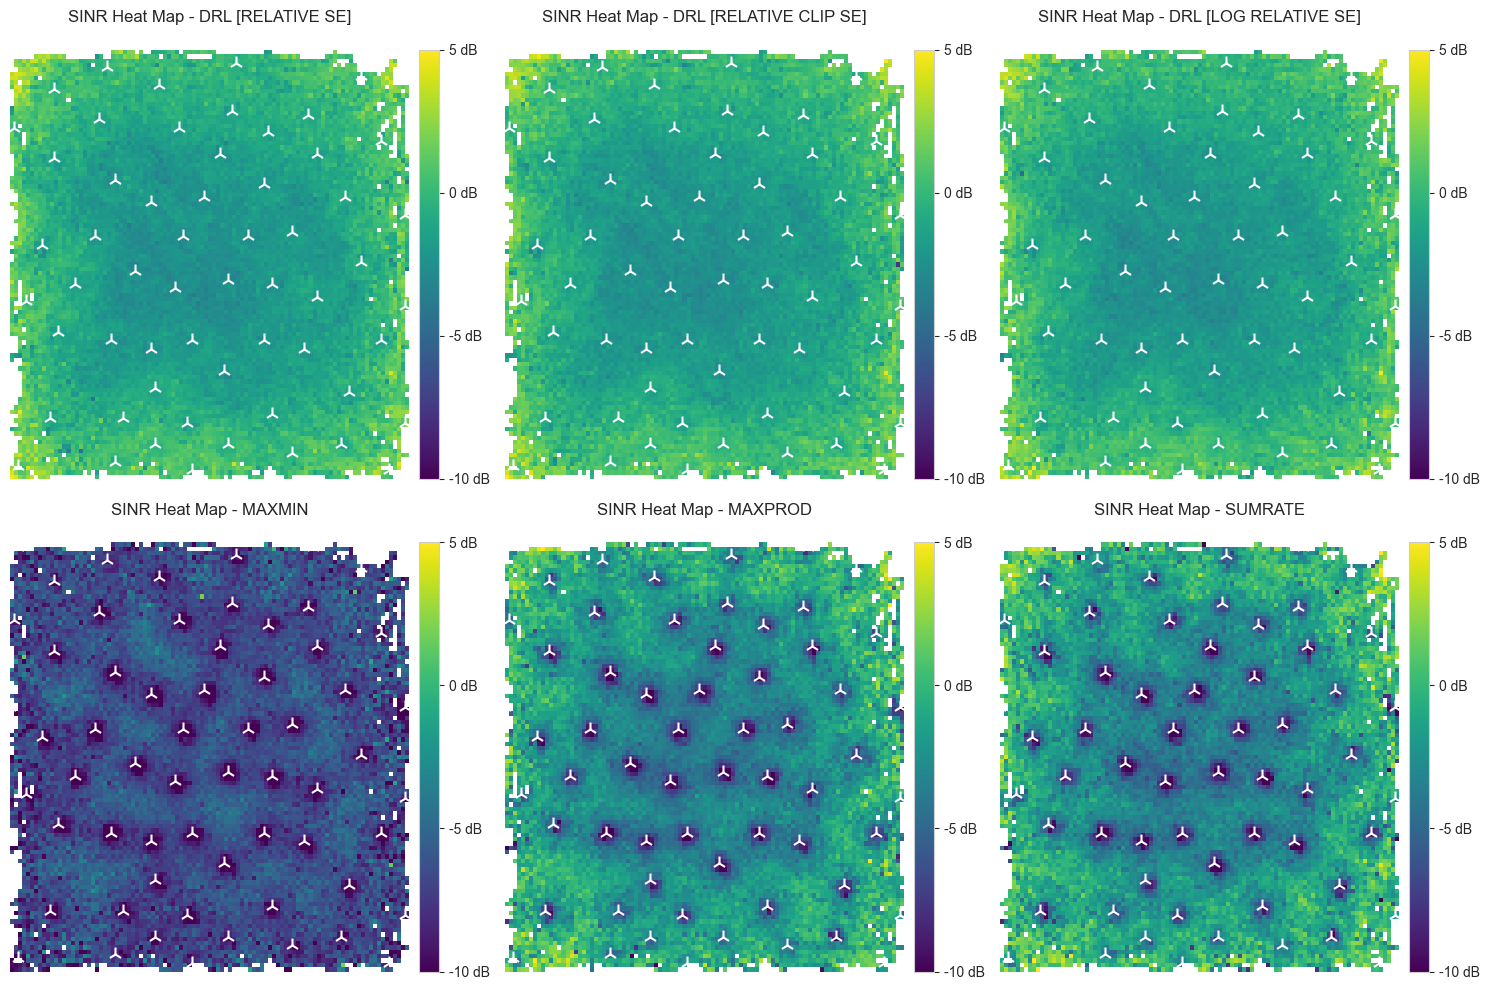

In [137]:
sinr_dataframes = {
    'DRL [RELATIVE SE]': MODEL_RELATIVE_SE_SINRs, 
    'DRL [RELATIVE CLIP SE]':MODEL_EXP_RELATIVE_CLIP_SE_SINRs, 
    'DRL [LOG RELATIVE SE]': MODEL_LOG_RELATIVE_SE_SINRs,
    'MAXMIN': MAXMIN_SINRs,
    'MAXPROD': MAXPROD_SINRs,
    'SUMRATE': SUMRATE_SINRs
}

plot_sinr_heatmaps(sinr_dataframes, UEs_LOCATIONS, APs_LOCATIONS, vmin, vmax, grid_size, 0, colorbar_ticks)

ValueError: SINR DataFrame and location DataFrame must have the same shape.

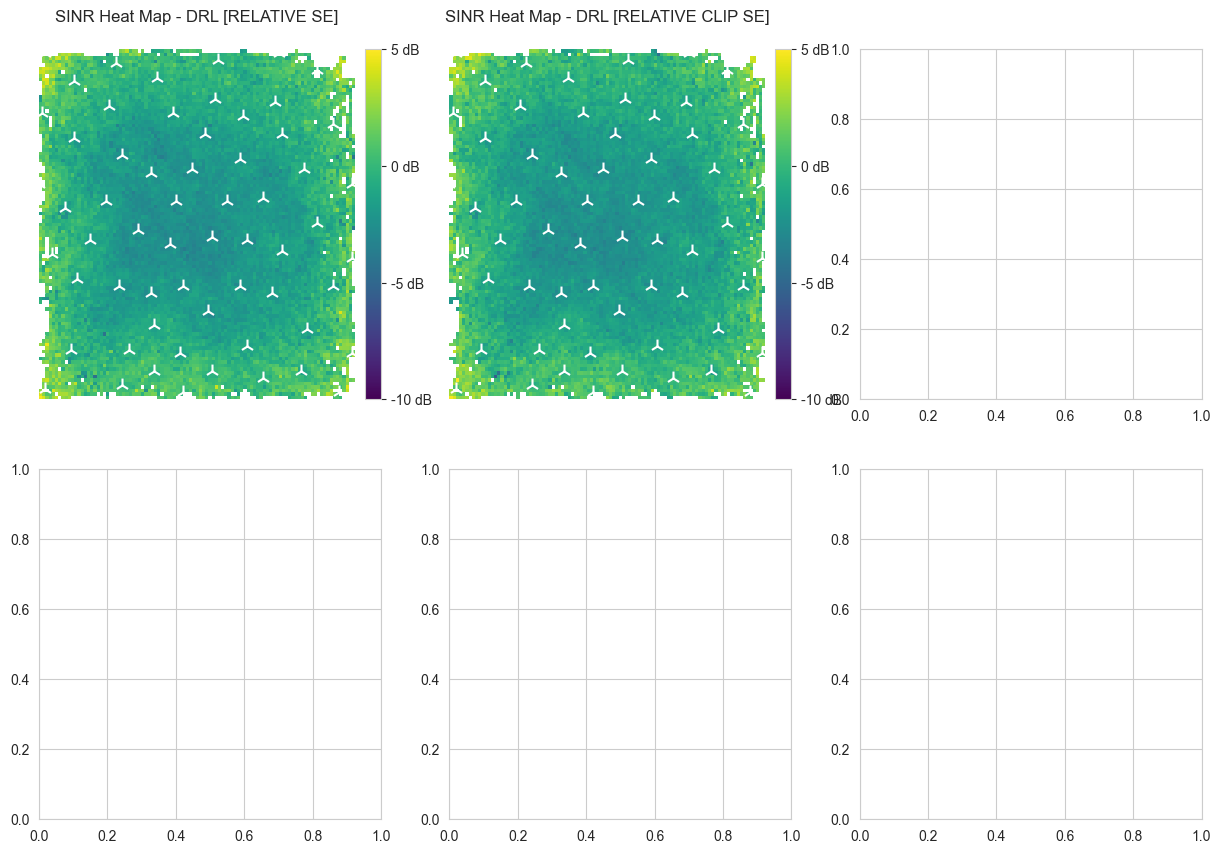

In [138]:
sinr_dataframes = {
    'DRL [RELATIVE SE]': MODEL_DELTA_SE_SINRs, 
    'DRL [RELATIVE CLIP SE]':MODEL_EXP_DELTA_CLIP_SE_SINRs, 
    '': pd.DataFrame(),
    'MAXMIN': MAXMIN_SINRs,
    'MAXPROD': MAXPROD_SINRs,
    'SUMRATE': SUMRATE_SINRs
}

plot_sinr_heatmaps(sinr_dataframes, UEs_LOCATIONS, APs_LOCATIONS, vmin, vmax, grid_size, 0, colorbar_ticks)